# **<font color="#42f5f5"> 0.0 Basics</font>**

## **<font color="#FBBF44">Funzioni</font>**

In [ ]:
# Template per tutti i confusion matrix di classification

yticks = {1,2,3,4,5,6}
xticks = {1,2,3,4,5,6}

def draw_confusion_matrix(cm, model):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm, xticklabels=xticks, yticklabels=yticks, annot=True, fmt="d", center=0, cmap='mako') 
    plt.title( str(model)+" Confusion Matrix", fontsize=15)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.savefig('FigXX-'+str(model)+'ConfusionMatrix.png', dpi=600) 
    plt.show()

def draw_confusion_matrix_tuned(cm, model):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm, xticklabels=xticks, yticklabels=yticks, annot=True, fmt="d", center=0, cmap='mako') 
    plt.title( str(model)+" Confusion Matrix after tuning", fontsize=15)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.savefig('FigXX-'+str(model)+'ConfusionMatrixTuned.png', dpi=600) 
    plt.show()

## **<font color="#FBBF44">Controllo GPU</font>**

In [ ]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [ ]:
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
# import psutil
# import humanize
# import os
# import GPUtil as GPU
# GPUs = GPU.getGPUs()
# gpu = GPUs[0]
# def printm():
#  process = psutil.Process(os.getpid())
#  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
#  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm() 

## **<font color="#FBBF44">1.0 Imports</font>**

In [ ]:
# Basics
import pandas as pd
import numpy as np
import tensorflow as tf
from numpy import quantile, where, random, array
from collections import Counter
from collections import defaultdict
from itertools import cycle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, label_binarize
from sklearn.datasets import make_classification

# Visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Outlier Detection
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor

# Dimensionality Reduction
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2
from sklearn.decomposition import PCA
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn import random_projection

# Imbalanced Learning
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Learners
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neural_network import MLPClassifier
# EnsembleClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import stats

# Hypertuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, KFold
from sklearn import model_selection

# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling1D
from keras.layers import Conv1D, Activation, Conv1D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.layers import LSTM

# TimeSeries Analysis
!pip install tslearn
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.datasets import CachedDatasets

# TS Approximation
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from sklearn.metrics import pairwise_distances
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from tslearn.utils import ts_size

from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import cdist

# Shapelet
from tslearn.shapelets import ShapeletModel, grabocka_params_to_shapelet_size_dict, LearningShapelets
!pip install pyts
from pyts.transformation import ShapeletTransform

# TS Clustering
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

# warning
import warnings 
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 8.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 19.6 MB/s 


## **<font color="#FBBF44">1.1 Data Loading</font>**

In [ ]:
# Monto il Drive per accedere ai file
# Percorso: '/content/drive/MyDrive/UCI HAR Dataset/...'
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!mkdir local_data

!cp -r /content/drive/MyDrive/"UCI HAR Dataset"/train /content/local_data
!cp -r /content/drive/MyDrive/"UCI HAR Dataset"/test /content/local_data

data=pd.read_csv('/content/local_data/train/X_train.txt', header=None, delim_whitespace=True) 
subject=pd.read_csv('/content/local_data/train/subject_train.txt', header=None) 
y_label=pd.read_csv('/content/local_data/train/y_train.txt', header=None) 

data_test = pd.read_csv('/content/local_data/test/X_test.txt', header=None, delim_whitespace=True) 
subject_test=pd.read_csv('/content/local_data/test/subject_test.txt', header=None) 
y_label_test = pd.read_csv('/content/local_data/test/y_test.txt', header=None)

feature=open("/content/drive/MyDrive/UCI HAR Dataset/features.txt","r")
feature_list=list(feature)

data.columns=feature_list
data_test.columns=feature_list 
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 1 tBodyAcc-mean()-X
 to 561 angle(Z,gravityMean)

dtypes: float64(561)
memory usage: 31.5 MB
None


## **<font color="#FBBF44">1.3 Data Preparation</font>**

In [ ]:
# Creamo degli array per X e y
X_train = data.values
y_train = np.array(y_label)
y_train = y_train.ravel()

X_test = data_test.values
y_test = np.array(y_label_test)
y_test = y_test.ravel()

y_train_bin = label_binarize(y_train, classes=[1, 2, 3, 4, 5, 6])
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6])
n_classes = y_train_bin.shape[1]

print(X_train.shape)
print(y_train.shape)
print(y_train_bin)
print(y_train_bin.shape)

(7352, 561)
(7352,)
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 ...
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]
(7352, 6)


# **<font color="#42f5f5"> 1.0 DATA UNDERSTANDING</font>**








## **<font color="#FBBF44">1.2 Data Understanding</font>**

In [ ]:
full_data = pd.concat((data, data_test), axis=0)
full_label = pd.concat((y_label, y_label_test), axis=0)

full_data.info()
full_data.describe().T

In [ ]:
# Controllo se ci sono null
full_data.isnull().values.any()

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
# import random
# randomlist = []
# random.seed()

# for i in range(0,5):
#   n = random.randint(0,560)
#   randomlist.append(n)

# print(randomlist)

# for i in randomlist:
#   sns.displot(data=data, x=data.iloc[:,i], kind='hist', bins=200, aspect=1.5)

In [ ]:
X1 = data.iloc[:,2].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('tBodyAcc-mean()-Z Distribution')
pylab.savefig('FigXX-DataDistribution1.png', dpi=600)

In [ ]:
X1 = data.iloc[:,530].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('fBodyBodyGyroMag-mad() Distribution')
pylab.savefig('FigXX-DataDistribution2.png', dpi=600)

In [ ]:
X1 = data.iloc[:,53].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('tGravityAcc-min()-Y Distribution')
pylab.savefig('FigXX-DataDistribution3.png', dpi=600)

In [ ]:
X1 = data.iloc[:,191].values
f = Fitter(X1, distributions=get_common_distributions())
f.fit()

f.hist()
f.plot_pdf()
pylab.grid(False)
pylab.title('tBodyGyroJerk-arCoeff()-Y,4 Distribution')
pylab.savefig('FigXX-DataDistribution4.png', dpi=600)

# **<font color="#42f5f5">2.0 CLASSIFICATION TASK</font>**

### **<font color="#34eb89">Decision Tree</font>**


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8595181540549711
F1-score [0.86071085 0.80837004 0.85090909 0.79446219 0.82565492 1.        ]
              precision    recall  f1-score   support

           1     0.8220    0.9032    0.8607       496
           2     0.8398    0.7792    0.8084       471
           3     0.8667    0.8357    0.8509       420
           4     0.8326    0.7597    0.7945       491
           5     0.7948    0.8590    0.8257       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8595      2947
   macro avg     0.8593    0.8561    0.8567      2947
weighted avg     0.8605    0.8595    0.8590      2947



In [ ]:
clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_leaf=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8808958262639973
F1-score [0.89687796 0.8372093  0.85995086 0.81838074 0.85335689 1.        ]
              precision    recall  f1-score   support

           1     0.8449    0.9556    0.8969       496
           2     0.8750    0.8025    0.8372       471
           3     0.8883    0.8333    0.8600       420
           4     0.8842    0.7617    0.8184       491
           5     0.8050    0.9079    0.8534       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8809      2947
   macro avg     0.8829    0.8769    0.8776      2947
weighted avg     0.8835    0.8809    0.8799      2947



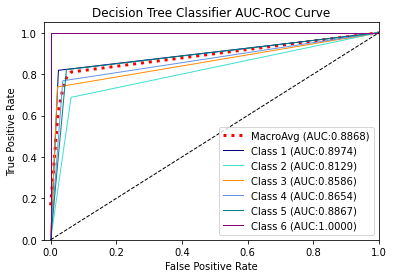

In [ ]:
# Inizializziamo il classifier
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))
y_score = clf.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.4f})".format(roc_auc["macro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.4f})".format((i+1), roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier AUC-ROC Curve")
plt.legend(loc="lower right")
plt.savefig('FigXX-DTROC.png', dpi=600)
plt.show() 

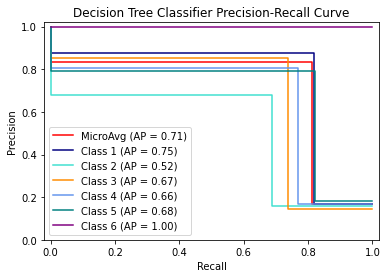

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(6, 4))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Class {(i+1)}", color=color)
    
handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Decision Tree Classifier Precision-Recall Curve")
plt.savefig('FigXX-DTPR.png', dpi=600)
plt.show()

### **<font color="#34eb89">KNN</font>**

In [ ]:
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     acc = []
#     for i in range(1,20):
#         neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
#         yhat = neigh.predict(X_test)
#         acc.append(metrics.accuracy_score(y_test, yhat))
        
#     plt.figure(figsize=(10,6))
#     plt.plot(range(1,20),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
#     plt.title('Optimal K')
#     plt.xlabel('K')
#     plt.ylabel('Accuracy')
#     plt.savefig('FigXX-OptimalKNN.png', dpi=600)
#     print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 4))

Accuracy 0.9015948422124194
F1-score [0.90994371 0.8973545  0.8616188  0.84657236 0.87843833 0.99719888]
              precision    recall  f1-score   support

           1     0.8509    0.9778    0.9099       496
           2     0.8945    0.9002    0.8974       471
           3     0.9538    0.7857    0.8616       420
           4     0.9089    0.7923    0.8466       491
           5     0.8319    0.9305    0.8784       532
           6     1.0000    0.9944    0.9972       537

    accuracy                         0.9016      2947
   macro avg     0.9067    0.8968    0.8985      2947
weighted avg     0.9059    0.9016    0.9007      2947



In [ ]:
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 4))

Accuracy 0.9043094672548354
F1-score [0.90857681 0.89787234 0.86486486 0.85466377 0.88512912 0.99719888]
              precision    recall  f1-score   support

           1     0.8531    0.9718    0.9086       496
           2     0.8998    0.8960    0.8979       471
           3     0.9412    0.8000    0.8649       420
           4     0.9142    0.8024    0.8547       491
           5     0.8409    0.9342    0.8851       532
           6     1.0000    0.9944    0.9972       537

    accuracy                         0.9043      2947
   macro avg     0.9082    0.8998    0.9014      2947
weighted avg     0.9079    0.9043    0.9036      2947



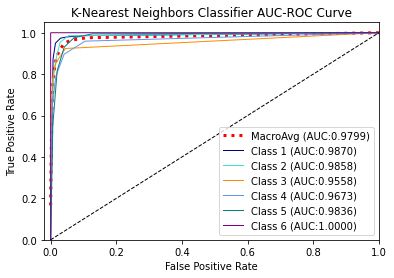

In [ ]:
# Inizializziamo il classifier
clf = OneVsRestClassifier(KNeighborsClassifier())
y_score = clf.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.4f})".format(roc_auc["macro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.4f})".format((i+1), roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-Nearest Neighbors Classifier AUC-ROC Curve")
plt.legend(loc="lower right")
plt.savefig('FigXX-KNNROC.png', dpi=600)
plt.show() 

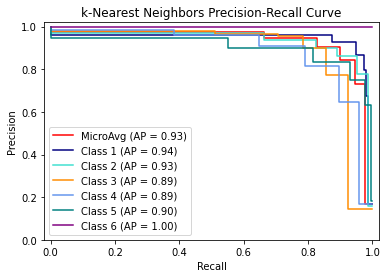

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(6, 4))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Class {i+1}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("k-Nearest Neighbors Precision-Recall Curve")
plt.savefig('FigXX-KNNPR.png', dpi=600)
plt.show()

# **<font color="#42f5f5">3.0 OUTLIER DETECTION 1%</font>**

## **<font color="#FBBF44">3.1 DBSCAN</font>**

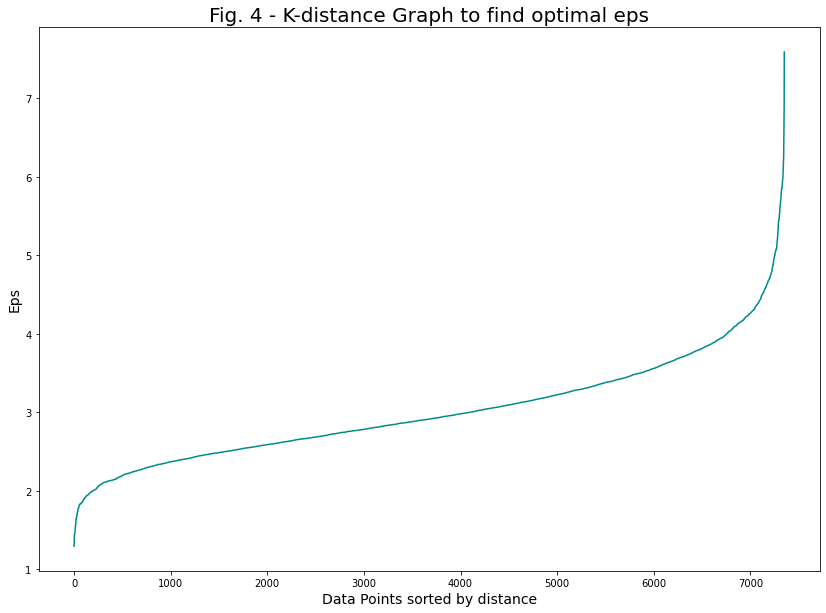

In [ ]:
# Calcoliamo i valori di distanza tra ogni record e il suo nearest neighbor
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

# Plottiamo la distanza dentro i valori del df e cerchiamo il "gomito" per vedere il punto di massima curvatura e quindi il valore ottimo di Eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,10))
plt.plot(distances, color = 'darkcyan')
plt.title('Fig. 4 - K-distance Graph to find optimal eps',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Eps',fontsize=14)
plt.savefig('FigXX-ElbowMethodDBSCAN.png', dpi=600)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=4.7, 
                min_samples=2,
                n_jobs=-1
                )
dbscan.fit(X_train)

anomalies_db = where(dbscan.labels_==-1)
anomalies_db = X_train[anomalies_db]

# Vediamo i "cluster" che DBSCAN ha trovato e li contiamo, -1 e noise, quindi, outlier
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22]),
 array([ 155, 7149,    2,    2,    2,    2,    3,    2,    2,    4,    2,
           2,    2,    2,    3,    2,    2,    2,    2,    2,    2,    2,
           2,    2]))

## **<font color="#FBBF44">3.2 Isolation Forest</font>**

In [ ]:
isol = IsolationForest(bootstrap=True,  
                       contamination=0.02, 
                       max_samples=600, 
                       n_estimators=1000, 
                       n_jobs=-1
                       )
isol.fit(X_train)
outliers_isol = isol.predict(X_train)

anomalies_isol = where(outliers_isol==-1)
anomalies_isol = X_train[anomalies_isol]

np.unique(outliers_isol, return_counts=True)

(array([-1,  1]), array([ 148, 7204]))

## **<font color="#FBBF44">3.3 ABOD</font>**

In [ ]:
! pip install pyod
from pyod.models.abod import ABOD

     |████████████████████████████████| 118 kB 5.4 MB/s eta 0:00:01
  Created wheel for pyod: filename=pyod-1.0.0-py3-none-any.whl size=144471 sha256=cb1bf6e142afb7e838a31f9916906445539083f849dd62caad0b0d8d3e40c786
  Stored in directory: /root/.cache/pip/wheels/37/e6/25/8098880dadf78bf063ee9b37477b1a9317e8bb0fc06e623187
Successfully built pyod


In [ ]:
abd = ABOD(n_neighbors=7,
           contamination=.02
           )
abd.fit(X_train)
outliers_abd = abd.predict(X_train)

anomalies_abd = where(outliers_abd==1)
anomalies_abd = X_train[anomalies_abd]

np.unique(outliers_abd, return_counts=True)

(array([0, 1]), array([7191,  161]))

In [ ]:
max_val = np.max(abd.decision_scores_[np.where(outliers_abd==1)])
min_val = np.min(abd.decision_scores_[np.where(outliers_abd==1)])

print(max_val)
print(min_val)

-1.0535847871116882e-06
-6.238984794247816e-05


## **<font color="#FBBF44">3.5 LOF</font>**

In [ ]:
lof = LocalOutlierFactor(n_neighbors=7,
                         contamination=.02,
                         algorithm='kd_tree',
                         )
outliers_lof = lof.fit_predict(X_train)

anomalies_lof = where(outliers_lof==-1)
anomalies_lof = X_train[anomalies_lof]

np.unique(outliers_lof, return_counts=True)

(array([-1,  1]), array([ 148, 7204]))

-1.2264836639285608
-1.8011148204462752


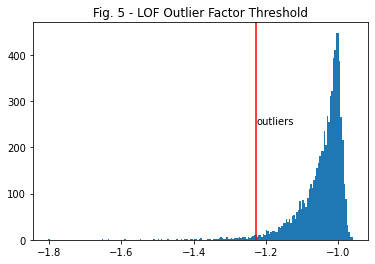

In [ ]:
max_val = np.max(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])
min_val = np.min(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])

print(max_val)
print(min_val)

plt.hist(lof.negative_outlier_factor_, bins=200)
plt.axvline(max_val, c='red')
plt.text(max_val, 250, 'outliers')
plt.title("Fig. 5 - LOF Outlier Factor Threshold")
plt.savefig('FigXX-LOFOutFactor.png', dpi=600)
plt.show()

## **<font color="#FBBF44">3.6 Dealing with Outliers</font>**

In [ ]:
outliers_final_dbscan = where(dbscan.labels_ == -1)
outliers_final_isol = where(outliers_isol == -1)
outliers_final_abd = where(outliers_abd == 1)
outliers_final_lof = where(outliers_lof == -1)

tot = []
for x in outliers_final_dbscan:
    tot.extend(x)
for x in outliers_final_isol:
    tot.extend(x)
for x in outliers_final_abd:
    tot.extend(x)
for x in outliers_final_lof:
    tot.extend(x)
print(tot)

[64, 69, 70, 71, 72, 134, 136, 137, 237, 238, 481, 487, 564, 565, 594, 1020, 1062, 1118, 1119, 1209, 1266, 1267, 1270, 1271, 1274, 1275, 1278, 1279, 1282, 1283, 1284, 1285, 1286, 1288, 1289, 1308, 1343, 1355, 1369, 1383, 1449, 1513, 1523, 1582, 1645, 1680, 1723, 1724, 1725, 1731, 1773, 1813, 1826, 1866, 1867, 1868, 1870, 1871, 1877, 1903, 1904, 1965, 2031, 2099, 2276, 2348, 2352, 2353, 2412, 2440, 2451, 2498, 2508, 2509, 2510, 2511, 2515, 2745, 2937, 3074, 3296, 3493, 3646, 3750, 3758, 3759, 3760, 3763, 3764, 3781, 3784, 3785, 3792, 3915, 3928, 3929, 3930, 3931, 3934, 3935, 3936, 3937, 3938, 3939, 3953, 3954, 3955, 3956, 3957, 3958, 3961, 4033, 4076, 4597, 4599, 4765, 4827, 4828, 4833, 4835, 4836, 4863, 4867, 4869, 4871, 5017, 5018, 5019, 5020, 5024, 5029, 5030, 5031, 5056, 5066, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5147, 5148, 5149, 5150, 5154, 5308, 5360, 5365, 5368, 5369, 5370, 6424, 6535, 71, 238, 487, 1062, 1110, 1111, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 127

In [ ]:
#cerco tutti i valori che appaiono nella lista degli outliers più di una volta e li inserisco in una lista per poi trasformarla in array
listadoppi = []
import collections
for item, count in collections.Counter(tot).items(): 
    if count > 2:
        listadoppi.append(item)
print(listadoppi)
finale_out = np.array(listadoppi)

anomalies_final = X_train[finale_out]
print(len(anomalies_final))

[71, 238, 564, 565, 1020, 1062, 1267, 1271, 1274, 1278, 1283, 1286, 1289, 1308, 1523, 1723, 1724, 1813, 1868, 1870, 1904, 1965, 2352, 2440, 2451, 2498, 2511, 2937, 3296, 3750, 3763, 3764, 3784, 3785, 3915, 3928, 3930, 3931, 3934, 3935, 3936, 3938, 3939, 3954, 3955, 3956, 3957, 3958, 4827, 4828, 4836, 4863, 4869, 5018, 5019, 5020, 5029, 5030, 5031, 5066, 5137, 5143, 1111, 2532, 2535]
65


### **<font color="#34eb89">4.6.1 Removing Outliers</font>**

In [ ]:
df_wo_outliers = data.copy()
df_wo_outliers.drop(finale_out, inplace=True)
df_wo_outliers.shape

(7287, 561)

In [ ]:
X_train2 = df_wo_outliers.values
y_train2 = y_train
y_train2 = np.delete(y_train2, finale_out)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8557855446216491
F1-score [0.85604607 0.80841639 0.82026538 0.79786096 0.83093525 0.99906803]
              precision    recall  f1-score   support

           1     0.8168    0.8992    0.8560       496
           2     0.8449    0.7749    0.8084       471
           3     0.8313    0.8095    0.8203       420
           4     0.8401    0.7597    0.7979       491
           5     0.7966    0.8684    0.8309       532
           6     1.0000    0.9981    0.9991       537

    accuracy                         0.8558      2947
   macro avg     0.8549    0.8516    0.8521      2947
weighted avg     0.8570    0.8558    0.8552      2947



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train2, y_train2)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9032914828639295
F1-score [0.90262172 0.9        0.86233766 0.85466377 0.88512912 0.99719888]
              precision    recall  f1-score   support

           1     0.8427    0.9718    0.9026       496
           2     0.9019    0.8981    0.9000       471
           3     0.9486    0.7905    0.8623       420
           4     0.9142    0.8024    0.8547       491
           5     0.8409    0.9342    0.8851       532
           6     1.0000    0.9944    0.9972       537

    accuracy                         0.9033      2947
   macro avg     0.9080    0.8986    0.9003      2947
weighted avg     0.9075    0.9033    0.9025      2947



### **<font color="#34eb89">4.6.2 Transforming Outliers</font>**

In [ ]:
df_outliers_mean = data.copy()
df_outliers_mean.drop(finale_out, inplace=True)

means=[] #contiene le medie di tutte le 561 features del dataset SENZA outliers
for col in df_outliers_mean.columns:
    means.append(df_outliers_mean[col].mean())
len(df_outliers_mean)

7287

In [ ]:
for i in finale_out: # crea una riga in più per ogni outliers e ci inserisco means in tutte le featuers
    df_outliers_mean.loc[i] = means

df_outliers_mean.info()  # a questo punto sono stati reinseriti gli outliers con le medie "pulite" del train
# infatti nella cella prima sono 81 in meno, ora di nuovo 7352

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 2535
Columns: 561 entries, 1 tBodyAcc-mean()-X
 to 561 angle(Z,gravityMean)

dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
df_outliers_mean = df_outliers_mean.sort_index()
df_outliers_mean.describe().T

count      mean       std  \
1 tBodyAcc-mean()-X\n                       7352.0  0.275096  0.063495   
2 tBodyAcc-mean()-Y\n                       7352.0 -0.017605  0.038685   
3 tBodyAcc-mean()-Z\n                       7352.0 -0.109181  0.054238   
4 tBodyAcc-std()-X\n                        7352.0 -0.611551  0.440812   
5 tBodyAcc-std()-Y\n                        7352.0 -0.517399  0.495833   
...                                            ...       ...       ...   
557 angle(tBodyGyroMean,gravityMean)\n      7352.0  0.007982  0.604318   
558 angle(tBodyGyroJerkMean,gravityMean)\n  7352.0 -0.005611  0.475824   
559 angle(X,gravityMean)\n                  7352.0 -0.489011  0.510061   
560 angle(Y,gravityMean)\n                  7352.0  0.058183  0.296354   
561 angle(Z,gravityMean)\n                  7352.0 -0.057376  0.277897   

                                                 min       25%       50%  \
1 tBodyAcc-mean()-X\n                      -0.853848  0.263751  0.277120   
2 tBodyAcc-mean()-Y\n                      -1.000000 -0.024545 -0.017281   
3 tBodyAcc-mean()-Z\n                      -1.000000 -0.120738 -0.108767   
4 tBodyAcc-std()-X\n                       -1.000000 -0.992754 -0.945875   
5 tBodyAcc-std()-Y\n                       -0.999873 -0.978129 -0.849962   
...                                              ...       ...       ...   
557 angle(tBodyGyroMean,gravityMean)\n     -1.000000 -0.477649  0.007982   
558 angle(tBodyGyroJerkMean,gravityMean)\n -1.000000 -0.373533 -0.004739   
559 angle(X,gravityMean)\n                 -1.000000 -0.811201 -0.706670   
560 angle(Y,gravityMean)\n                 -1.000000 -0.016451  0.179952   
561 angle(Z,gravityMean)\n                 -1.000000 -0.142514 -0.000730   

                                                 75%       max  
1 tBodyAcc-mean()-X\n                       0.287867  0.692761  
2 tBodyAcc-mean()-Y\n                      -0.010955  1.000000  
3 tBodyAcc-mean()-Z\n                      -0.098078  1.000000  
4 tBodyAcc-std()-X\n                       -0.250335  0.780536  
5 tBodyAcc-std()-Y\n                       -0.042264  0.832094  
...                                              ...       ...  
557 angle(tBodyGyroMean,gravityMean)\n      0.496180  0.998702  
558 angle(tBodyGyroJerkMean,gravityMean)\n  0.356955  0.996078  
559 angle(X,gravityMean)\n                 -0.489563  1.000000  
560 angle(Y,gravityMean)\n                  0.248001  0.478157  
561 angle(Z,gravityMean)\n                  0.104519  1.000000  

[561 rows x 8 columns]

In [ ]:
X_train3 = df_outliers_mean.values
y_train3 = y_train

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train3, y_train3)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8585001696640652
F1-score [0.87006737 0.80133185 0.82973621 0.79786096 0.83093525 0.99906803]
              precision    recall  f1-score   support

           1     0.8324    0.9113    0.8701       496
           2     0.8395    0.7665    0.8013       471
           3     0.8357    0.8238    0.8297       420
           4     0.8401    0.7597    0.7979       491
           5     0.7966    0.8684    0.8309       532
           6     1.0000    0.9981    0.9991       537

    accuracy                         0.8585      2947
   macro avg     0.8574    0.8546    0.8548      2947
weighted avg     0.8594    0.8585    0.8577      2947



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train3, y_train3)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9026128266033254
F1-score [0.90262172 0.9        0.86010363 0.85466377 0.88314005 0.99719888]
              precision    recall  f1-score   support

           1     0.8427    0.9718    0.9026       496
           2     0.9019    0.8981    0.9000       471
           3     0.9432    0.7905    0.8601       420
           4     0.9142    0.8024    0.8547       491
           5     0.8404    0.9305    0.8831       532
           6     1.0000    0.9944    0.9972       537

    accuracy                         0.9026      2947
   macro avg     0.9071    0.8979    0.8996      2947
weighted avg     0.9066    0.9026    0.9019      2947



## **<font color="#FBBF44">3.7 Rechecking Outliers</font>**

### **<font color="#34eb89">4.7.1 Preprocessing</font>**

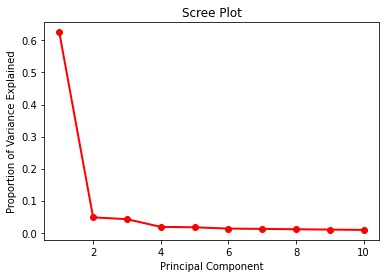

In [ ]:
# Cerchiamo valore ottimo di componenti
pca = PCA(n_components=10)
Principal_components=pca.fit_transform(X_train3)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_train3_pca = pca.fit_transform(X_train3)
X_train3_pca.shape

(7352, 2)

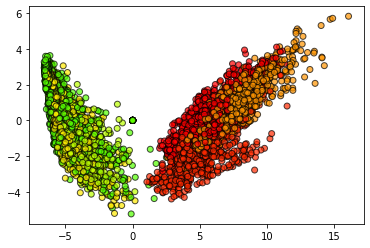

In [ ]:
plt.scatter(X_train3_pca[:, 0], X_train3_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train3_pca, y_train3)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.5239226331862912
F1-score [0.66143106 0.71962617 0.48186528 0.3714565  0.45362718 0.46428571]
              precision    recall  f1-score   support

           1     0.5831    0.7641    0.6614       496
           2     0.8000    0.6539    0.7196       471
           3     0.5284    0.4429    0.4819       420
           4     0.3571    0.3870    0.3715       491
           5     0.4434    0.4643    0.4536       532
           6     0.4968    0.4358    0.4643       537

    accuracy                         0.5239      2947
   macro avg     0.5348    0.5247    0.5254      2947
weighted avg     0.5314    0.5239    0.5234      2947



### **<font color="#34eb89">4.7.2 DBSCAN</font>**

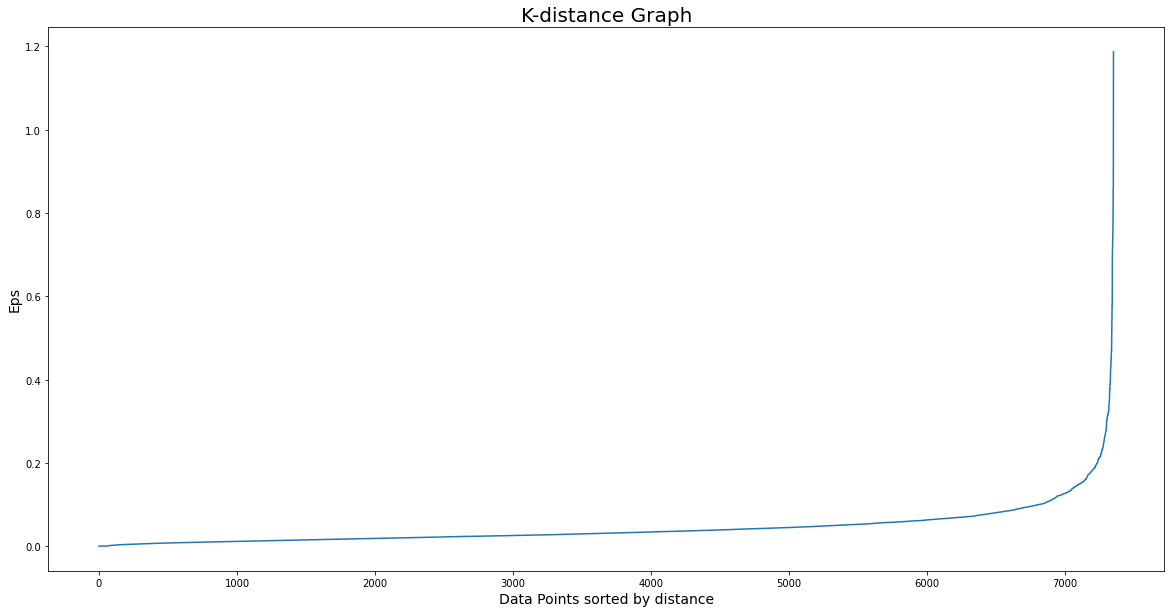

In [ ]:
# Calcoliamo i valori di distanza tra ogni record e il suo nearest neighbor
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(X_train3_pca)
distances, indices = nbrs.kneighbors(X_train3_pca)

# Plottiamo la distanza dentro i valori del df e cerchiamo il "gomito" per vedere il punto di massima curvatura e quindi il valore ottimo di Eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Eps',fontsize=14)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=.3, 
                min_samples=2,
                n_jobs=-1
                )
dbscan.fit(X_train3_pca)

# Vediamo i "cluster" che DBSCAN ha trovato e li contiamo, -1 e noise, quindi, outlier
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 array([  49, 4007, 3141,   65,    2,    3,    4,    3,    3,    2,    8,
           2,    4,    9,    3,    2,    2,    4,   15,    4,    2,    2,
           2,    2,    2,    2,    2,    3,    3]))

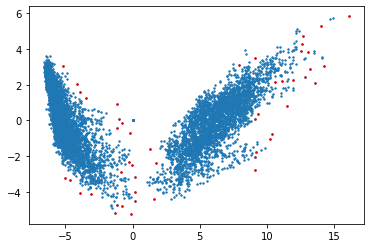

In [ ]:
anomalies_db = where(dbscan.labels_==-1)
anomalies_db = X_train3_pca[anomalies_db]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_db[:,0], anomalies_db[:,1], color='red', s=2)
plt.show()

### **<font color="#34eb89">4.7.3 Isolation Forest</font>**

In [ ]:
# model = IsolationForest(random_state=47)

#  param_grid = {'n_estimators': [1000, 1500], 
#                'max_samples': [10], 
#                'contamination': ['auto', 0.0001, 0.0002], 
#                'bootstrap': [True], 
#                'n_jobs': [-1]}

#  grid_search = model_selection.GridSearchCV(model, 
#                                             param_grid,
#                                             scoring="neg_mean_squared_error", 
#                                             refit=True,
#                                             cv=10, 
#                                             return_train_score=True)
# grid_search.fit(X_train_pca, y_train)

# best_model = grid_search.fit(X_train_pca, y_train)
# print('Optimum parameters', best_model.best_params_)

In [ ]:
isol = IsolationForest(bootstrap=True,  
                       contamination=0.02, 
                       max_samples=600, 
                       n_estimators=1000, 
                       n_jobs=-1
                       )
isol.fit(X_train3_pca)
outliers_isol = isol.predict(X_train3_pca)
np.unique(outliers_isol, return_counts=True)

(array([-1,  1]), array([ 148, 7204]))

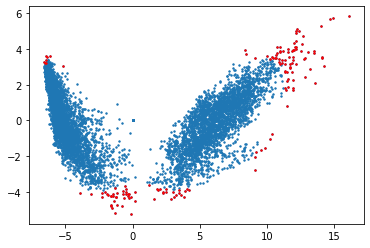

In [ ]:
anomalies_isol = where(outliers_isol==-1)
anomalies_isol = X_train3_pca[anomalies_isol]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_isol[:,0], anomalies_isol[:,1], color='red', s=2)
plt.show()

### **<font color="#34eb89">4.3 ABOD</font>**

In [ ]:
! pip install pyod
from pyod.models.abod import ABOD

In [ ]:
param_grid = {'contamination': [0.1, 0.2,0.3,0.4,0.5],
              'n_neighbors': [5,6,7,8,9,10],
              'method': ["fast", "default"], }

In [ ]:
abd = ABOD(n_neighbors=7,
           contamination=.02 
           )
abd.fit(X_train3_pca)
outliers_abd = abd.predict(X_train3_pca)
np.unique(outliers_abd, return_counts=True)

(array([0]), array([7352]))

In [ ]:
# param_grid = {'contamination': [0.1, 0.2,0.3,0.4,0.5],
#               'n_neighbors': [5,6,7,8,9,10],
#               'method': ["fast", "default"], }

# abd_gridsearch=GridSearchCV(estimator=abd, param_grid=param_grid, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print(abd_gridsearch.best_params_)

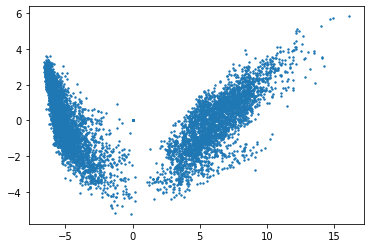

In [ ]:
anomalies_abd = where(outliers_abd==1)
anomalies_abd = X_train3_pca[anomalies_abd]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_abd[:,0], anomalies_abd[:,1], color='red', s=2) 
plt.show()

### **<font color="#34eb89">4.7.4 LOF</font>**

In [ ]:
lof = LocalOutlierFactor(n_neighbors=98,
                         contamination=.02,
                         algorithm='kd_tree',
                         )
outliers_lof = lof.fit_predict(X_train3_pca)
np.unique(outliers_lof, return_counts=True)

(array([-1,  1]), array([ 148, 7204]))

In [ ]:
max_val = np.max(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])
min_val = np.min(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])

print(max_val)
print(min_val)

-1.5052929857333197
-3.513454188409515


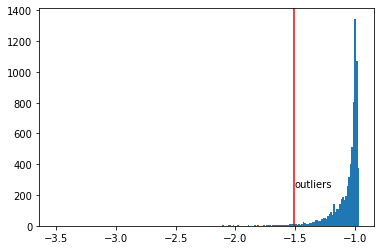

In [ ]:
plt.hist(lof.negative_outlier_factor_, bins=200)
plt.axvline(max_val, c='red')
plt.text(max_val, 250, 'outliers')
plt.show()

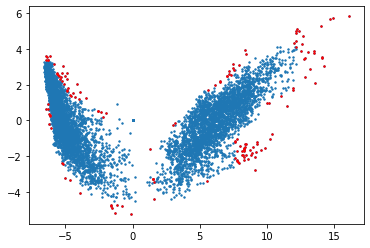

In [ ]:
anomalies_lof = where(outliers_lof==-1)
anomalies_lof = X_train3_pca[anomalies_lof]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_lof[:,0], anomalies_lof[:,1], color='red', s=2)
plt.show()

# **<font color="#42f5f5">4.0 IMBALANCED LEARNING</font>**

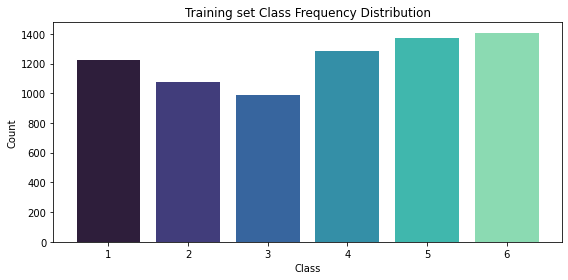

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64


In [ ]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('mako')

classe, count = np.unique(y_train, return_counts=True)

plt.bar(classe, count, color=colors[0:6])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Training set Class Frequency Distribution')
plt.savefig('FigXX-TrainsetFrequency.png', dpi=600)
plt.show()

print(y_label.value_counts())

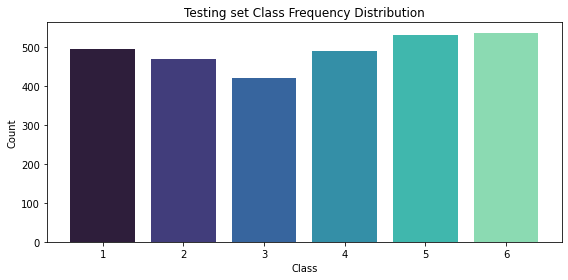

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64


In [ ]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('mako')

classe, count = np.unique(y_test, return_counts=True)

plt.bar(classe, count, color=colors[0:6])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Testing set Class Frequency Distribution')
plt.savefig('FigXX-TestsetFrequency.png', dpi=600)
plt.show()

print(y_label.value_counts())

## **<font color="#FBBF44">4.0.0 Preprocess</font>**

In [ ]:
# Droppiamo le classi nel test per poi evaluare bene la performance del dataset ribilanciato
data_test_imb = data_test.copy()
data_test_imb['activity'] = y_label_test[0].values

classe1 = np.array(y_label_test[y_label_test[0]==1].index)
classe4 = np.array(y_label_test[y_label_test[0]==4].index)
classe5 = np.array(y_label_test[y_label_test[0]==5].index)
classe6 = np.array(y_label_test[ y_label_test[0]==6].index)
classes2remove = np.concatenate((classe1,classe4,classe5,classe6))

data_test_imb.drop(data_test_imb.index[classes2remove], inplace=True)
print("Test records: ", len(data_test_imb))
print(data_test_imb['activity'].value_counts())

X_test_imb = data_test_imb.iloc[:, 0:561].values
y_test_imb = data_test_imb['activity'].values

Test records:  891
2    471
3    420
Name: activity, dtype: int64


### **<font color="#34eb89">4.0.1 Imbalancing for Oversampling</font>**

In [ ]:
data_imb_over = data.copy()
data_imb_over['activity'] = y_label[0].values

# Seleziono le classi che voglio droppare. Lasciamo solo 2 e 3, 6 era troppo facile da predictare-->
classe1 = np.array(y_label[y_label[0]==1].index)
classe4 = np.array(y_label[y_label[0]==4].index)
classe5 = np.array(y_label[y_label[0]==5].index)
classe6 = np.array(y_label[ y_label[0]==6].index)
classes2remove = np.concatenate((classe1,classe4,classe5,classe6))

data_imb_over.drop(data_imb_over.index[classes2remove], inplace=True)
print("Records before imbalancing class 3: ", len(data_imb_over))
print(data_imb_over['activity'].value_counts())

# Records a droppare per sbilanciare la classe 3
rows2remove = np.random.choice((data_imb_over[data_imb_over['activity']==3].index), 942, replace=False)
print("\nRecords to remove from class 3: ", len(rows2remove))
data_imb_over.drop(rows2remove, inplace=True)

print("\nRecords after imbalancing class 3: ", len(data_imb_over))
print(data_imb_over['activity'].value_counts(), "\n")

X_train_imb_over = data_imb_over.iloc[:, 0:561].values
y_train_imb_over = data_imb_over['activity'].values

# X_train_imb, X_val_imb, y_train_imb, y_val_imb = train_test_split(data_imb1, y_label_imb, test_size=0.30, random_state= 8)

print(X_train_imb_over.shape)
print(X_train_imb_over.shape)

Records before imbalancing class 3:  2059
2    1073
3     986
Name: activity, dtype: int64

Records to remove from class 3:  942

Records after imbalancing class 3:  1117
2    1073
3      44
Name: activity, dtype: int64 

(1117, 561)
(1117, 561)


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_imb_over, y_train_imb_over) 
y_pred_imb = clf.predict(X_test_imb)

print('Accuracy %s' % accuracy_score(y_test_imb, y_pred_imb))
print('F1-score %s' % f1_score(y_test_imb, y_pred_imb, average=None))
print(classification_report(y_test_imb, y_pred_imb))

Accuracy 0.7934904601571269
F1-score [0.8305709  0.73563218]
              precision    recall  f1-score   support

           2       0.73      0.96      0.83       471
           3       0.93      0.61      0.74       420

    accuracy                           0.79       891
   macro avg       0.83      0.78      0.78       891
weighted avg       0.82      0.79      0.79       891



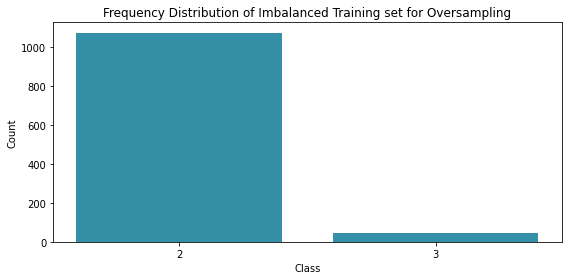

In [ ]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('mako')

classe, count = np.unique(y_train_imb_over, return_counts=True)

plt.bar(classe, count, color=colors[3:4])
plt.xlabel('Class')
plt.xticks([2, 3])
plt.ylabel('Count')
plt.title('Frequency Distribution of Imbalanced Training set for Oversampling')
plt.savefig('FigXX-ImbalancedOverDistribution.png', dpi=600)
plt.show()

### **<font color="#34eb89">4.0.2 Imbalancing for Undersampling</font>**

In [ ]:
data_imb_under = data.copy()
data_imb_under['activity'] = y_label[0].values

# Seleziono le classi che voglio droppare. Lasciamo solo 2 e 3, 6 era troppo facile da predictare-->
classe1 = np.array(y_label[y_label[0]==1].index)
classe4 = np.array(y_label[y_label[0]==4].index)
classe5 = np.array(y_label[y_label[0]==5].index)
classe6 = np.array(y_label[ y_label[0]==6].index)
classes2remove = np.concatenate((classe1,classe4,classe5,classe6))

data_imb_under.drop(data_imb_under.index[classes2remove], inplace=True)
print("Records before imbalancing class 3: ", len(data_imb_under))
print(data_imb_under['activity'].value_counts())

# Copiamo e incolliamo la classe 2 per sbilanciarla
data_imb_under2 = data_imb_under[data_imb_under['activity']==2]
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)
data_imb_under = data_imb_under.append(data_imb_under2, ignore_index = True)

print("\nRecords after imbalancing class 3: ", len(data_imb_under))
print(data_imb_under['activity'].value_counts(), "\n")

X_train_imb_under = data_imb_under.iloc[:, 0:561].values
y_train_imb_under = data_imb_under['activity'].values

# X_train_imb, X_val_imb, y_train_imb, y_val_imb = train_test_split(data_imb1, y_label_imb, test_size=0.30, random_state= 8)

print(X_train_imb_under.shape)
print(y_train_imb_under.shape)

Records before imbalancing class 3:  2059
2    1073
3     986
Name: activity, dtype: int64

Records after imbalancing class 3:  9570
2    8584
3     986
Name: activity, dtype: int64 

(9570, 561)
(9570,)


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_imb_under, y_train_imb_under) 
y_pred_imb = clf.predict(X_test_imb)

print('Accuracy %s' % accuracy_score(y_test_imb, y_pred_imb))
print('F1-score %s' % f1_score(y_test_imb, y_pred_imb, average=None))
print(classification_report(y_test_imb, y_pred_imb))

Accuracy 0.8372615039281706
F1-score [0.84491979 0.82880756]
              precision    recall  f1-score   support

           2       0.85      0.84      0.84       471
           3       0.82      0.84      0.83       420

    accuracy                           0.84       891
   macro avg       0.84      0.84      0.84       891
weighted avg       0.84      0.84      0.84       891



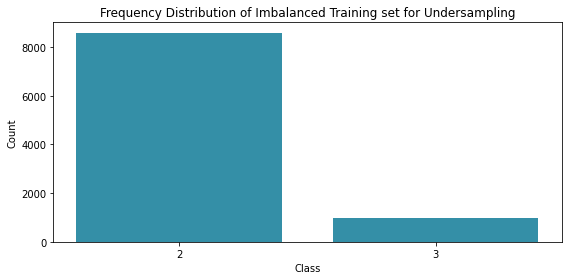

In [ ]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('mako')

classe, count = np.unique(y_train_imb_under, return_counts=True)

plt.bar(classe, count, color=colors[3:4])
plt.xlabel('Class')
plt.xticks([2, 3])
plt.ylabel('Count')
plt.title('Frequency Distribution of Imbalanced Training set for Undersampling')
plt.savefig('FigXX-ImbalancedUnderDistribution.png', dpi=600)
plt.show()

## **<font color="#FBBF44">4.1 Oversampling</font>**

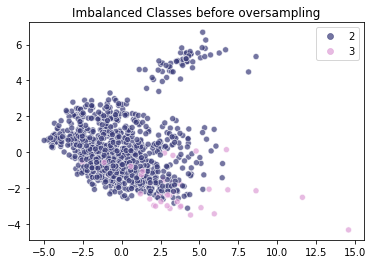

In [ ]:
# Prima  dell'oversampling
pca = PCA(n_components=2)
X_train_imbover_pca = pca.fit_transform(X_train_imb_over)

classes = ['2', '3']
scatter = plt.scatter(X_train_imbover_pca[:, 0], X_train_imbover_pca[:, 1], c=y_train_imb_over, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Imbalanced Classes before oversampling")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-ImbalancedOversampling.png', dpi=600)

### **<font color="#34eb89">4.1.1 Random Over Sampler</font>**

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_imb_over, y_train_imb_over)

print('Oversampled y_train %s' % Counter(y_train_ros))

Oversampled y_train Counter({2: 1073, 3: 1073})


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_ros, y_train_ros)

y_pred = clf.predict(X_test_imb)

print('Accuracy %s' % accuracy_score(y_test_imb, y_pred))
print('F1-score %s' % f1_score(y_test_imb, y_pred, average=None))
print(classification_report(y_test_imb, y_pred))

Accuracy 0.7598204264870931
F1-score [0.80685921 0.68249258]
              precision    recall  f1-score   support

           2       0.70      0.95      0.81       471
           3       0.91      0.55      0.68       420

    accuracy                           0.76       891
   macro avg       0.80      0.75      0.74       891
weighted avg       0.80      0.76      0.75       891



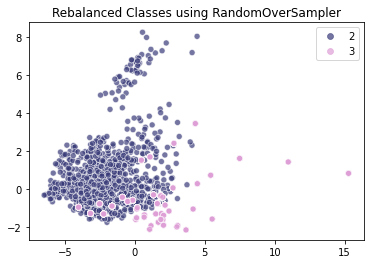

In [ ]:
# Dopo l'oversampling
pca = PCA(n_components=2)
X_train_ros_pca = pca.fit_transform(X_train_ros)

classes = ['2', '3']
scatter = plt.scatter(X_train_ros_pca[:, 0], X_train_ros_pca[:, 1], c=y_train_ros, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Rebalanced Classes using RandomOverSampler")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-ImbalancedOversamplingROS.png', dpi=600)

### **<font color="#34eb89">4.1.2 SMOTE</font>**

In [ ]:
sm = SMOTE(random_state=42, k_neighbors = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train_imb_over, y_train_imb_over)

print('Oversampled y_train %s' % Counter(y_train_sm))

Oversampled y_train Counter({3: 1073, 2: 1073})


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_sm, y_train_sm)

y_pred = clf.predict(X_test_imb)

print('Accuracy %s' % accuracy_score(y_test_imb, y_pred))
print('F1-score %s' % f1_score(y_test_imb, y_pred, average=None))
print(classification_report(y_test_imb, y_pred))

Accuracy 0.7261503928170595
F1-score [0.78330373 0.62804878]
              precision    recall  f1-score   support

           2       0.67      0.94      0.78       471
           3       0.87      0.49      0.63       420

    accuracy                           0.73       891
   macro avg       0.77      0.71      0.71       891
weighted avg       0.77      0.73      0.71       891



(2146, 2)


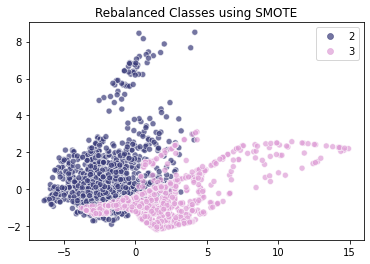

In [ ]:
# Dopo l'oversampling
pca = PCA(n_components=2)
X_train_sm_pca = pca.fit_transform(X_train_sm)
print(X_train_sm_pca.shape)

classes = ['2', '3']
scatter = plt.scatter(X_train_sm_pca[:, 0], X_train_sm_pca[:, 1], c=y_train_sm, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Rebalanced Classes using SMOTE")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-ImbalancedOversamplingSMOTE.png', dpi=600)

## **<font color="#FBBF44">4.2 Undersampling</font>**

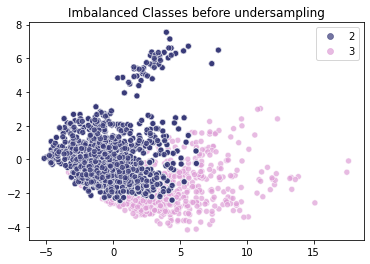

In [ ]:
# Prima  dell'undersampling
pca = PCA(n_components=2)
X_train_imbunder_pca = pca.fit_transform(X_train_imb_under)

classes = ['2', '3']
scatter = plt.scatter(X_train_imbunder_pca[:, 0], X_train_imbunder_pca[:, 1], c=y_train_imb_under, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Imbalanced Classes before undersampling")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-ImbalancedUndersampling.png', dpi=600)

### **<font color="#34eb89">4.2.1 Random Under Sampler</font>**

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_imb_under, y_train_imb_under)

print('Undersampled y_train %s' % Counter(y_train_rus))

Undersampled y_train Counter({2: 986, 3: 986})


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_rus, y_train_rus)

y_pred = clf.predict(X_test_imb)

print('Accuracy %s' % accuracy_score(y_test_imb, y_pred))
print('F1-score %s' % f1_score(y_test_imb, y_pred, average=None))
print(classification_report(y_test_imb, y_pred))

Accuracy 0.7968574635241302
F1-score [0.81320949 0.77736777]
              precision    recall  f1-score   support

           2       0.79      0.84      0.81       471
           3       0.80      0.75      0.78       420

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.80       891
weighted avg       0.80      0.80      0.80       891



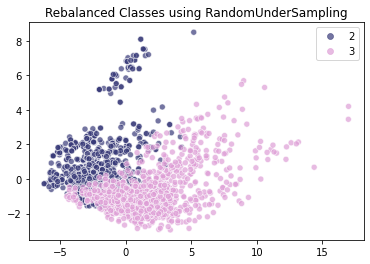

In [ ]:
# Dopo l'undersampling
pca = PCA(n_components=2)
X_train_rus_pca = pca.fit_transform(X_train_rus)

classes = ['2', '3']
scatter = plt.scatter(X_train_rus_pca[:, 0], X_train_rus_pca[:, 1], c=y_train_rus, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Rebalanced Classes using RandomUnderSampling")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-ImbalancedUndersamplingRUS.png', dpi=600)

### **<font color="#34eb89">4.2.2 Condensed Nearest Neighbor</font>**

In [ ]:
# cnn = CondensedNearestNeighbour(n_neighbors=98, sampling_strategy='all')
# X_train_cnn, y_train_cnn = cnn.fit_resample(X_train_imb_under, y_train_imb_under)

# print('Undersampled y_train %s' % Counter(y_train_cnn))

In [ ]:
# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(X_train_cnn, y_train_cnn)

# y_pred = clf.predict(X_test_cnn)

# print('Accuracy %s' % accuracy_score(y_test_cnn, y_pred))
# print('F1-score %s' % f1_score(y_test_cnn, y_pred, average=None))
# print(classification_report(y_test_cnn, y_pred))

In [ ]:
# pca = PCA(n_components=2)
# X_train_cnn_pca = pca.fit_transform(X_train_cnn)
# print(X_train_cnn_pca.shape)

# plt.scatter(X_train_cnn_pca[:, 0], X_train_cnn_pca[:, 1], c=y_train_cnn, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
# plt.show()

# **<font color="#42f5f5">5.0 EXPLOIT DIMENSIONALITY REDUCTION</font>**


## **<font color="#ff9ed0">-------------- Feature Selection --------------</font>**


## **<font color="#FBBF44">5.1 Variance Threshold</font>**

In [ ]:
#Rimaniamo solo con le colonne con high variance, togliamo le colonne che sono almeno 75% similari, <.25
sel_var = VarianceThreshold(threshold=.10)
X_train_sel_var = sel_var.fit_transform(X_train)

selected = sel_var.get_support()
features = array(feature_list)

# print("Selected features:")
# print(features[selected])

X_train_sel_var.shape

(7352, 189)

In [ ]:
X_test_sel_var = sel_var.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_sel_var, y_train)

y_pred = clf.predict(X_test_sel_var)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.827960637936885
F1-score [0.82574257 0.74418605 0.79741935 0.77754678 0.80258303 1.        ]
              precision    recall  f1-score   support

           1     0.8113    0.8407    0.8257       496
           2     0.7104    0.7813    0.7442       471
           3     0.8704    0.7357    0.7974       420
           4     0.7941    0.7617    0.7775       491
           5     0.7880    0.8177    0.8026       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8280      2947
   macro avg     0.8290    0.8229    0.8246      2947
weighted avg     0.8309    0.8280    0.8282      2947



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_sel_var, y_train)
y_pred = knn.predict(X_test_sel_var)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits = 4))

Accuracy 0.8853070919579233
F1-score [0.87773723 0.86218302 0.8538163  0.83530678 0.86457399 1.        ]
              precision    recall  f1-score   support

           1     0.8017    0.9698    0.8777       496
           2     0.8968    0.8301    0.8622       471
           3     0.9348    0.7857    0.8538       420
           4     0.8858    0.7902    0.8353       491
           5     0.8268    0.9060    0.8646       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8853      2947
   macro avg     0.8910    0.8803    0.8823      2947
weighted avg     0.8905    0.8853    0.8847      2947



## **<font color="#FBBF44">5.2 Univariate Feature Selection</font>**

In [ ]:
normalized_df = (data-data.min())/(data.max()-data.min())
normalized_df_test = (data_test-data_test.min())/(data_test.max()-data_test.min())

X = normalized_df.iloc[:,0:561]
y = y_label

Xtest = normalized_df_test.iloc[:,0:561]
ytest = y_label_test

In [ ]:
sel_uni = SelectKBest(score_func=chi2, k=131)
X_train_sel_uni = sel_uni.fit(X,y)

dfscores = pd.DataFrame(X_train_sel_uni.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

# print(featureScores.nlargest(35,'Score')) 

X_test_sel_uni = sel_uni.fit_transform(Xtest,ytest)

In [ ]:
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     acc = []
#     for i in range(1,200):
#         sel_uni = SelectKBest(score_func=chi2, k=i)
#         X_train_sel_uni = sel_uni.fit_transform(X,y)
#         X_test_sel_uni = sel_uni.transform(Xtest)
        
#         clf = DecisionTreeClassifier(random_state=0).fit(X_train_sel_uni,y_train)
#         y_pred = clf.predict(X_test_sel_uni)
#         acc.append(metrics.accuracy_score(y_test, y_pred))
        
#     print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
    plt.figure(figsize=(10,6))
    plt.plot(range(1,200),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.title('Fig. 9 - Optimal K for Univariate Feature Selection')
    plt.savefig('FigXX-KUNIVA.png', dpi=600)
    plt.ylabel('Accuracy')

In [ ]:
X_test_sel_uni = sel_uni.transform(Xtest)
X_train_sel_uni = sel_uni.transform(X)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_sel_uni, y_train)

y_pred = clf.predict(X_test_sel_uni)

print('Accuracy %s' % accuracy_score(ytest, y_pred))
print('F1-score %s' % f1_score(ytest, y_pred, average=None))
print(classification_report(ytest, y_pred, digits=4))

## **<font color="#FBBF44">5.3 Select from Model</font>**

In [ ]:
sel_mod = SelectFromModel(LogisticRegression())
X_train_sel_mod = sel_mod.fit_transform(X_train, y_train)

selected = sel_mod.get_support()
features = array(feature_list)

print("Selected features:")
print(features[selected])

X_train_sel_mod.shape

Selected features:
['4 tBodyAcc-std()-X\n' '5 tBodyAcc-std()-Y\n' '7 tBodyAcc-mad()-X\n'
 '8 tBodyAcc-mad()-Y\n' '10 tBodyAcc-max()-X\n'
 '23 tBodyAcc-entropy()-X\n' '24 tBodyAcc-entropy()-Y\n'
 '25 tBodyAcc-entropy()-Z\n' '26 tBodyAcc-arCoeff()-X,1\n'
 '28 tBodyAcc-arCoeff()-X,3\n' '29 tBodyAcc-arCoeff()-X,4\n'
 '33 tBodyAcc-arCoeff()-Y,4\n' '37 tBodyAcc-arCoeff()-Z,4\n'
 '38 tBodyAcc-correlation()-X,Y\n' '39 tBodyAcc-correlation()-X,Z\n'
 '40 tBodyAcc-correlation()-Y,Z\n' '41 tGravityAcc-mean()-X\n'
 '42 tGravityAcc-mean()-Y\n' '43 tGravityAcc-mean()-Z\n'
 '50 tGravityAcc-max()-X\n' '51 tGravityAcc-max()-Y\n'
 '52 tGravityAcc-max()-Z\n' '53 tGravityAcc-min()-X\n'
 '54 tGravityAcc-min()-Y\n' '55 tGravityAcc-min()-Z\n'
 '56 tGravityAcc-sma()\n' '57 tGravityAcc-energy()-X\n'
 '58 tGravityAcc-energy()-Y\n' '59 tGravityAcc-energy()-Z\n'
 '63 tGravityAcc-entropy()-X\n' '64 tGravityAcc-entropy()-Y\n'
 '65 tGravityAcc-entropy()-Z\n' '66 tGravityAcc-arCoeff()-X,1\n'
 '67 tGravityAcc-arCoeff()

(7352, 187)

In [ ]:
X_test_sel_mod = sel_mod.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_sel_mod, y_train)

y_pred = clf.predict(X_test_sel_mod)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.841873091279267
F1-score [0.83524904 0.74058127 0.79400749 0.81920327 0.83411434 1.        ]
              precision    recall  f1-score   support

           1     0.7956    0.8790    0.8352       496
           2     0.7511    0.7304    0.7406       471
           3     0.8346    0.7571    0.7940       420
           4     0.8217    0.8167    0.8192       491
           5     0.8318    0.8365    0.8341       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8419      2947
   macro avg     0.8391    0.8366    0.8372      2947
weighted avg     0.8422    0.8419    0.8414      2947



## **<font color="#ff9ed0">-------------- Feature Projection --------------</font>**


## **<font color="#FBBF44">5.4 Principal Component Analysis (PCA)</font>**

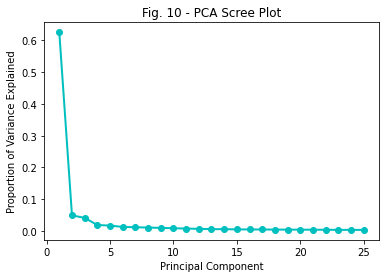

In [ ]:
# Cerchiamo valore ottimo di componenti
pca = PCA(n_components=25)
Principal_components=pca.fit_transform(X_train)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2, c='c')
plt.title('Fig. 10 - PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.savefig('FigXX-PCAScreePlot.png', dpi=600) 
plt.show()

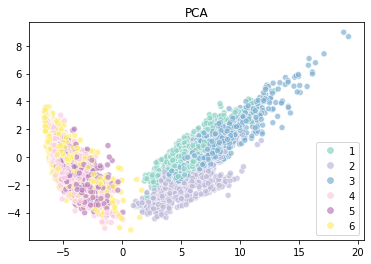

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

classes = ['1', '2', '3', '4', '5', '6']
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("PCA")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-PCA.png', dpi=600) 

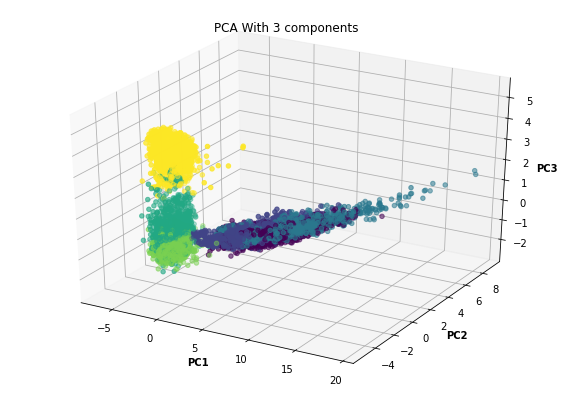

In [ ]:
pca = PCA(n_components=3)
X_train_pca3 = pca.fit_transform(X_train)
X_train_pca3.shape

x = X_train_pca3[:, 0]
y = X_train_pca3[:, 1]
z = X_train_pca3[:, 2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c=y_train)
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')
plt.title("PCA With 3 components")
plt.savefig('FigXXPCA3D.png', dpi=600) 
plt.show()

Maximum accuracy:- 0.8143875127248049 at Component = 28


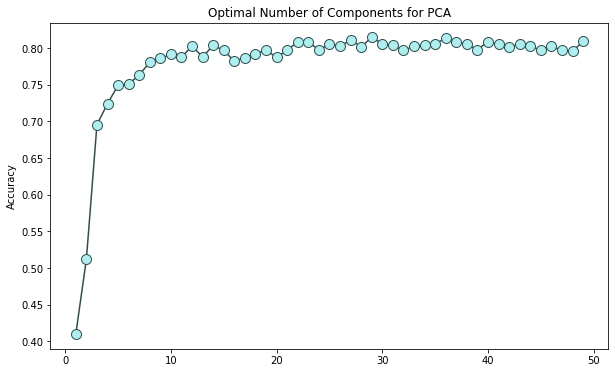

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    acc = []
    for i in range(1,50):
        pca = PCA(n_components=i)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        clf = DecisionTreeClassifier(random_state=0).fit(X_train_pca,y_train)
        y_pred = clf.predict(X_test_pca)
        acc.append(metrics.accuracy_score(y_test, y_pred))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.title('Optimal Number of Components for PCA')
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
pca = PCA(n_components=22)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8052256532066508
F1-score [0.82706767 0.78101402 0.74263764 0.72375127 0.76607642 0.96441948]
              precision    recall  f1-score   support

           1     0.7746    0.8871    0.8271       496
           2     0.7939    0.7686    0.7810       471
           3     0.8033    0.6905    0.7426       420
           4     0.7245    0.7230    0.7238       491
           5     0.7597    0.7726    0.7661       532
           6     0.9699    0.9590    0.9644       537

    accuracy                         0.8052      2947
   macro avg     0.8043    0.8001    0.8008      2947
weighted avg     0.8063    0.8052    0.8045      2947



## **<font color="#FBBF44">5.4 Principal Component Analysis (PCA) USANDO DATASET DA SELECTION MODEL</font>**

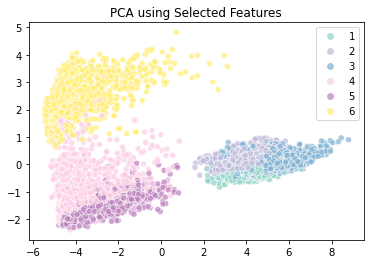

In [ ]:
pca = PCA(n_components=2)
X_train_pca_mod2 = pca.fit_transform(X_train_sel_mod)

classes = ['1', '2', '3', '4', '5', '6']
scatter = plt.scatter(X_train_pca_mod2[:, 0], X_train_pca_mod2[:, 1], c=y_train, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("PCA using Selected Features")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-PCAModelSelect.png', dpi=600) 

Maximum accuracy:- 0.8517136070580251 at Component = 17


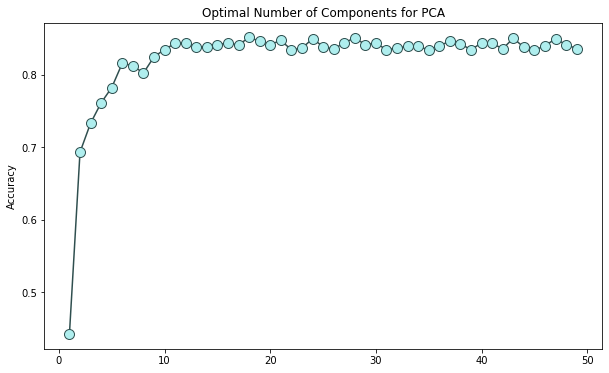

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    acc = []
    for i in range(1,50):
        pca = PCA(n_components=i)
        X_train_pca = pca.fit_transform(X_train_sel_mod)
        X_test_pca = pca.transform(X_test_sel_mod)
        
        clf = DecisionTreeClassifier(random_state=0).fit(X_train_pca,y_train)
        y_pred = clf.predict(X_test_pca)
        acc.append(metrics.accuracy_score(y_test, y_pred))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.title('Optimal Number of Components for PCA')
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
pca = PCA(n_components=17)
X_train_pca_mod2 = pca.fit_transform(X_train_sel_mod)
X_train_pca_mod2.shape

(7352, 17)

In [ ]:
X_test_pca_mod2 = pca.transform(X_test_sel_mod)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_pca_mod2, y_train)

y_pred = clf.predict(X_test_pca_mod2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8456057007125891
F1-score [0.8833652  0.8315565  0.78787879 0.76374745 0.7943662  0.98972923]
              precision    recall  f1-score   support

           1     0.8400    0.9315    0.8834       496
           2     0.8351    0.8280    0.8316       471
           3     0.8387    0.7429    0.7879       420
           4     0.7637    0.7637    0.7637       491
           5     0.7936    0.7951    0.7944       532
           6     0.9925    0.9870    0.9897       537

    accuracy                         0.8456      2947
   macro avg     0.8440    0.8414    0.8418      2947
weighted avg     0.8457    0.8456    0.8449      2947



## **<font color="#FBBF44">5.5 Gaussian Random Projection</font>**

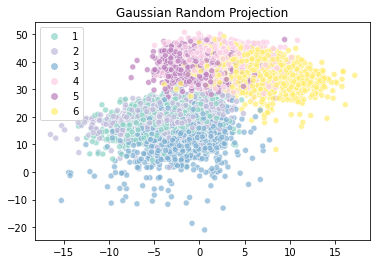

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=2)
X_train_rsp = rsp.fit_transform(X_train)

classes = ['1', '2', '3', '4', '5', '6']
scatter = plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Gaussian Random Projection")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-GRP.png', dpi=600) 

Maximum accuracy:- 0.7723108245673567 at Component = 44


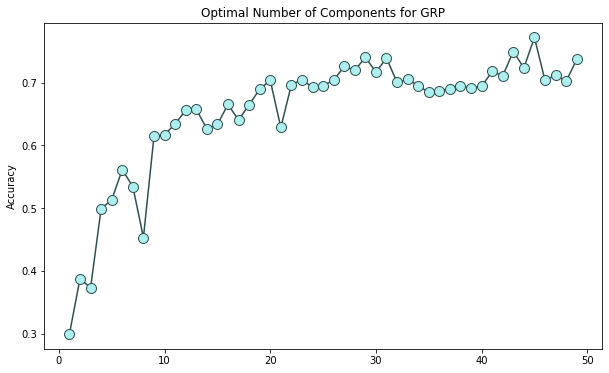

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    acc = []
    for i in range(1,50):
        rsp = random_projection.GaussianRandomProjection(n_components=i)
        X_train_rsp = rsp.fit_transform(X_train)
        X_test_rsp = rsp.transform(X_test)
        
        clf = DecisionTreeClassifier(random_state=0).fit(X_train_rsp,y_train)
        y_pred = clf.predict(X_test_rsp)
        acc.append(metrics.accuracy_score(y_test, y_pred))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
    plt.title('Optimal Number of Components for GRP')
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
rsp = random_projection.GaussianRandomProjection(n_components=27)
X_train_rsp = rsp.fit_transform(X_train)
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.7176789955887343
F1-score [0.67701261 0.65033408 0.62647754 0.67817259 0.71652816 0.92673644]
              precision    recall  f1-score   support

           1     0.6523    0.7036    0.6770       496
           2     0.6838    0.6200    0.6503       471
           3     0.6221    0.6310    0.6265       420
           4     0.6761    0.6802    0.6782       491
           5     0.7042    0.7293    0.7165       532
           6     0.9475    0.9069    0.9267       537

    accuracy                         0.7177      2947
   macro avg     0.7143    0.7118    0.7125      2947
weighted avg     0.7202    0.7177    0.7184      2947



## **<font color="#FBBF44">5.6 Multi Dimensional Scaling (MDS)</font>**

### **<font color="#34eb89">3.6.1 Classic MDS</font>**

In [ ]:
#mds = MDS(n_components=2)
#X_train_mds = mds.fit_transform(X_train)
#X_train_mds.shape

In [ ]:
#plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
#plt.show()

In [ ]:
#clf = DecisionTreeClassifier(random_state=0)
#clf.fit(X_train_mds, y_train)

#y_pred = clf.predict(X_train_mds)

#print('Accuracy %s' % accuracy_score(y_train, y_pred))
#print('F1-score %s' % f1_score(y_train, y_pred, average=None))
#print(classification_report(y_train, y_pred))

### **<font color="#34eb89">3.6.2 ISOmap</font>**


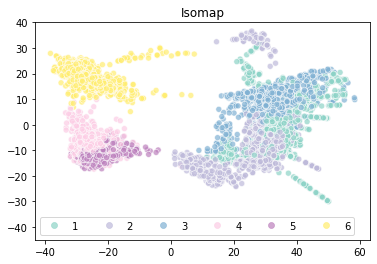

In [ ]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)

classes = ['1', '2', '3', '4', '5', '6']
scatter = plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("Isomap")
plt.ylim([-45, 40])
plt.legend(handles=scatter.legend_elements()[0], labels=classes, ncol=6, loc='lower left')
plt.savefig('FigXX-Isomap.png', dpi=600) 

In [ ]:
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     acc = []
#     for i in range(1,50):
#         iso = Isomap(n_components=i)
#         X_train_iso = iso.fit_transform(X_train)
#         X_test_iso = iso.transform(X_test)
        
#         clf = DecisionTreeClassifier(random_state=0).fit(X_train_iso,y_train)
#         y_pred = clf.predict(X_test_iso)
#         acc.append(metrics.accuracy_score(y_test, y_pred))
#         print(i, "accuracy = ", acc)
        
#     plt.figure(figsize=(10,6))
#     plt.plot(range(1,50),acc,color = 'darkslategray', marker='o',markerfacecolor='paleturquoise', markersize=10)
#     plt.title('Optimal Number of Components for ISOmap')
#     plt.ylabel('Accuracy')
#     print("Maximum accuracy:-",max(acc),"at Component =",acc.index(max(acc)))

In [ ]:
iso = Isomap(n_components=75)
X_train_iso = iso.fit_transform(X_train)
X_test_iso = iso.fit_transform(X_test)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_test_iso)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.5636240244316254
F1-score [0.42128603 0.56300813 0.42039801 0.58513189 0.44572748 0.8574057 ]
              precision    recall  f1-score   support

           1     0.4680    0.3831    0.4213       496
           2     0.5400    0.5881    0.5630       471
           3     0.4401    0.4024    0.4204       420
           4     0.4816    0.7454    0.5851       491
           5     0.5778    0.3628    0.4457       532
           6     0.8473    0.8678    0.8574       537

    accuracy                         0.5636      2947
   macro avg     0.5591    0.5583    0.5488      2947
weighted avg     0.5667    0.5636    0.5550      2947



### **<font color="#34eb89">3.6.3 t-SNE</font>**

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)

classes = ['1', '2', '3', '4', '5', '6']
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("t-SNE")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-tSNE.png', dpi=600) 

(7352, 2)

In [ ]:
X_test_tsne = tsne.fit_transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_test_tsne) 

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

## **<font color="#ff9ed0">-------------- Outlier Detection con Dimensionality Reduction --------------</font>**


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## **<font color="#FBBF44">5.8 DBSCAN</font>**

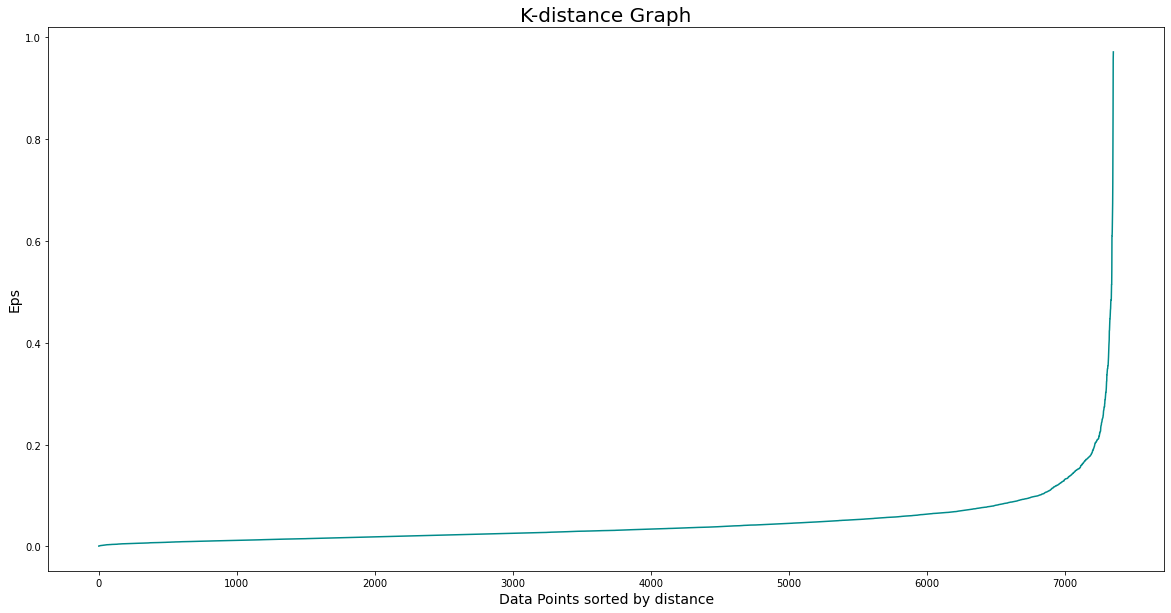

In [ ]:
# Calcoliamo i valori di distanza tra ogni record e il suo nearest neighbor
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(X_train_pca)
distances, indices = nbrs.kneighbors(X_train_pca)

# Plottiamo la distanza dentro i valori del df e cerchiamo il "gomito" per vedere il punto di massima curvatura e quindi il valore ottimo di Eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances, color = 'darkcyan')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Eps',fontsize=14)
plt.savefig('FigXX-ElbowMethodDBSCAN.png', dpi=600)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=.18, 
                min_samples=2,
                n_jobs=-1
                )
dbscan.fit(X_train_pca)

# Vediamo i "cluster" che DBSCAN ha trovato e li contiamo, -1 e noise, quindi, outlier
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 array([ 163, 3859,    7,    2,   12,    2,   10, 2960,    2,    5,    2,
           2,    7,    3,    3,   23,    3,    5,    3,    3,    4,    2,
           2,    3,    3,    5,    2,    2,    2,    6,    5,    3,    3,
           3,    3,    3,    2,    9,    6,    3,    5,    2,   10,    4,
           2,    2,    2,    4,    2,    5,    2,    2,    3,    2,    3,
           2,    3,    3,    6,    4,    2, 

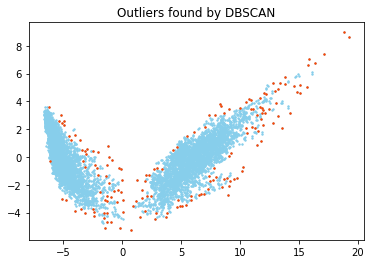

In [ ]:
anomalies_db = where(dbscan.labels_==-1)
anomalies_db = X_train_pca[anomalies_db]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_db[:,0], anomalies_db[:,1], color='orangered', s=2)
plt.title("Outliers found by DBSCAN")
plt.savefig('FigXX-OutlierDBSCAN.png', dpi=600)
plt.show()

## **<font color="#FBBF44">5.9 Isolation Forest</font>**

In [ ]:
# model = IsolationForest(random_state=47)

#  param_grid = {'n_estimators': [1000, 1500], 
#                'max_samples': [10], 
#                'contamination': ['auto', 0.0001, 0.0002], 
#                'bootstrap': [True], 
#                'n_jobs': [-1]}

#  grid_search = model_selection.GridSearchCV(model, 
#                                             param_grid,
#                                             scoring="neg_mean_squared_error", 
#                                             refit=True,
#                                             cv=10, 
#                                             return_train_score=True)
# grid_search.fit(X_train_pca, y_train)

# best_model = grid_search.fit(X_train_pca, y_train)
# print('Optimum parameters', best_model.best_params_)

In [ ]:
isol = IsolationForest(bootstrap=True,  
                       contamination=0.02, 
                       max_samples=600, 
                       n_estimators=1000, 
                       n_jobs=-1
                       )
isol.fit(X_train_pca)
outliers_isol = isol.predict(X_train_pca)
np.unique(outliers_isol, return_counts=True)


(array([-1,  1]), array([ 148, 7204]))

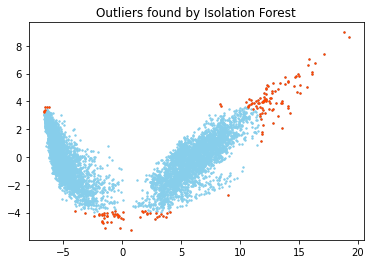

In [ ]:
anomalies_isol = where(outliers_isol==-1)
anomalies_isol = X_train_pca[anomalies_isol]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_isol[:,0], anomalies_isol[:,1], color='orangered', s=2)
plt.title("Outliers found by Isolation Forest")
plt.savefig('FigXX-OutlierIsol.png', dpi=600)
plt.show()

## **<font color="#FBBF44">5.10 ABOD</font>**

In [ ]:
! pip install pyod
from pyod.models.abod import ABOD

In [ ]:
param_grid = {'contamination': [0.1, 0.2,0.3,0.4,0.5],
              'n_neighbors': [5,6,7,8,9,10],
              'method': ["fast", "default"], }

In [ ]:
abd = ABOD(n_neighbors=7,
           contamination=.02
           )
abd.fit(X_train_pca)
outliers_abd = abd.predict(X_train_pca)
np.unique(outliers_abd, return_counts=True)

(array([0, 1]), array([7213,  139]))

In [ ]:
# param_grid = {'contamination': [0.1, 0.2,0.3,0.4,0.5],
#               'n_neighbors': [5,6,7,8,9,10],
#               'method': ["fast", "default"], }

# abd_gridsearch=GridSearchCV(estimator=abd, param_grid=param_grid, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print(abd_gridsearch.best_params_)

In [ ]:
max_val = np.max(abd.decision_scores_[np.where(outliers_abd==1)])
min_val = np.min(abd.decision_scores_[np.where(outliers_abd==1)])

print(max_val)
print(min_val)

-0.0038183526100801493
-66.41729970051921


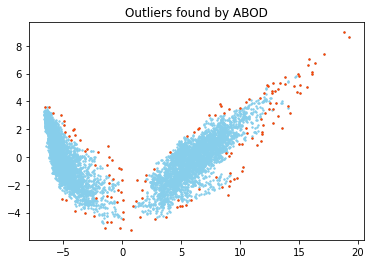

In [ ]:
anomalies_abd = where(outliers_abd==1)
anomalies_abd = X_train_pca[anomalies_abd]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_abd[:,0], anomalies_abd[:,1], color='orangered', s=2)
plt.title("Outliers found by ABOD")
plt.savefig('FigXX-OutlierABOD.png', dpi=600) 
plt.show()

## **<font color="#FBBF44">5.11 GRUBB'S</font>**

In [ ]:
# ! pip install outlier_utils
# from outliers import smirnov_grubbs as grubbs

In [ ]:
# #flat_list = [item for sublist in t for item in sublist]
# flat_list = []
# for sublist in X_train:
#     for item in sublist:
#         flat_list.append(item)
# len(flat_list)

In [ ]:
# dataG=flat_list
# grubbs.test(dataG, alpha=.05)

In [ ]:
# var=500

# for i in range(var):
#   out1=grubbs.max_test_indices(X_train[:,i], alpha=.05)

# len(out1)

In [ ]:
# anomalies_gb = X_train_pca[out1]

# plt.scatter(X_train_pca[:,0], X_train_pca[:,1], s=2)
# plt.scatter(anomalies_gb[:,0], anomalies_gb[:,1], color='red', s=2)
# plt.show()

## **<font color="#FBBF44">5.12 LOF</font>**

In [ ]:
lof = LocalOutlierFactor(n_neighbors=98,
                         contamination=.02,
                         algorithm='kd_tree',
                         )
outliers_lof = lof.fit_predict(X_train_pca)
np.unique(outliers_lof, return_counts=True)

(array([-1,  1]), array([ 148, 7204]))

In [ ]:
max_val = np.max(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])
min_val = np.min(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])

print(max_val)
print(min_val)

-1.515313873142995
-4.087181836975123


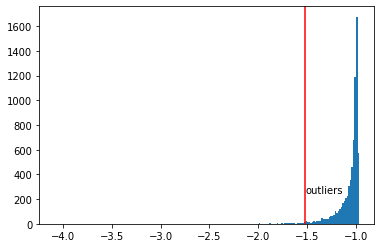

In [ ]:
plt.hist(lof.negative_outlier_factor_, bins=200)
plt.axvline(max_val, c='red')
plt.text(max_val, 250, 'outliers')
plt.show()

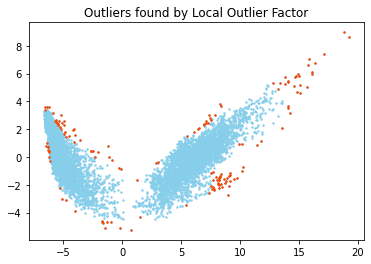

In [ ]:
anomalies_lof = where(outliers_lof==-1)
anomalies_lof = X_train_pca[anomalies_lof]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_lof[:,0], anomalies_lof[:,1], color='orangered', s=2)
plt.title("Outliers found by Local Outlier Factor")
plt.savefig('FigXX-OutlierLOF.png', dpi=600)
plt.show()

## **<font color="#FBBF44">5.13 Dealing with Outliers</font>**

In [ ]:
outliers_final_dbscan = where(dbscan.labels_ == -1)
outliers_final_isol = where(outliers_isol == -1)
outliers_final_abd = where(outliers_abd == 1)
outliers_final_lof = where(outliers_lof == -1)

In [ ]:
tot = []
for x in outliers_final_dbscan:
    tot.extend(x)
for x in outliers_final_isol:
    tot.extend(x)
for x in outliers_final_abd:
    tot.extend(x)
for x in outliers_final_lof:
    tot.extend(x)
print(tot)

[67, 238, 246, 263, 289, 384, 434, 552, 751, 766, 773, 871, 886, 1035, 1062, 1075, 1111, 1163, 1183, 1210, 1214, 1227, 1242, 1243, 1263, 1265, 1266, 1271, 1277, 1278, 1286, 1369, 1396, 1477, 1513, 1514, 1523, 1623, 1723, 1724, 1727, 1773, 1816, 1817, 1826, 1871, 1877, 1881, 1899, 2111, 2112, 2223, 2351, 2353, 2355, 2362, 2366, 2367, 2374, 2375, 2376, 2377, 2502, 2505, 2506, 2507, 2508, 2511, 2512, 2513, 2514, 2518, 2519, 2520, 2526, 2529, 2531, 2532, 2534, 2541, 2597, 2705, 2891, 2911, 2985, 2986, 3040, 3504, 3758, 3759, 3761, 3764, 3781, 3785, 3822, 3900, 3915, 3926, 3930, 3931, 3934, 3935, 3936, 3939, 3954, 3955, 3957, 3958, 3965, 4538, 4539, 4567, 4581, 4597, 4617, 4729, 4730, 4828, 4847, 4863, 4870, 4872, 4940, 5016, 5030, 5035, 5137, 5142, 5187, 5250, 5251, 5255, 5270, 5370, 5385, 5499, 5709, 6001, 6168, 6169, 6175, 6282, 6283, 6303, 6304, 6341, 6778, 6779, 6950, 7000, 7001, 7125, 7126, 7132, 7158, 7189, 7190, 7322, 7323, 7335, 7339, 7349, 7350, 31, 67, 384, 385, 536, 690, 703, 75

In [ ]:
# cerco tutti i valori che appaiono nella lista degli outliers più di una volta e li inserisco in una lista per poi trasformarla in array
listadoppi = []
import collections
for item, count in collections.Counter(tot).items(): 
    if count > 2:
        listadoppi.append(item)
print(listadoppi)
finale_out = np.array(listadoppi)


[67, 238, 246, 384, 751, 1210, 1227, 1242, 1243, 1263, 1265, 1271, 1278, 1286, 1369, 1514, 1723, 1724, 1773, 1817, 2111, 2112, 2366, 2367, 2375, 2376, 2505, 2506, 2511, 2512, 2513, 2514, 2518, 2519, 2526, 2529, 2531, 2532, 2534, 2911, 3759, 3764, 3781, 3900, 3915, 3926, 3930, 3931, 3934, 3935, 3936, 3939, 3954, 3955, 3957, 3958, 3965, 4729, 4730, 4828, 4863, 4940, 5016, 5030, 5137, 5142, 5499, 5709, 6168, 6169, 7000, 7125, 7158, 7189, 7190, 7350, 2504, 3928, 3929, 3937, 3938, 6692]


82


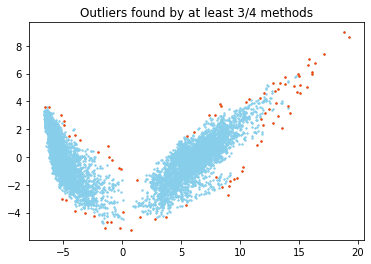

In [ ]:
anomalies_final = X_train_pca[finale_out]
print(len(anomalies_final))

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='skyblue', s=2)
plt.scatter(anomalies_final[:,0], anomalies_final[:,1], color='orangered', s=2)
plt.title("Outliers found by at least 3/4 methods")
plt.savefig('FigXX-OutlierFinal.png', dpi=600)
plt.show()

### **<font color="#34eb89">4.6.1 Removing Outliers</font>**

In [ ]:
df_wo_outliers = data.copy()
df_wo_outliers.drop(finale_out, inplace=True)
df_wo_outliers.describe().T

count      mean       std  \
1 tBodyAcc-mean()-X\n                       7270.0  0.274705  0.068028   
2 tBodyAcc-mean()-Y\n                       7270.0 -0.017907  0.038232   
3 tBodyAcc-mean()-Z\n                       7270.0 -0.108979  0.055420   
4 tBodyAcc-std()-X\n                        7270.0 -0.610372  0.444111   
5 tBodyAcc-std()-Y\n                        7270.0 -0.517379  0.497670   
...                                            ...       ...       ...   
557 angle(tBodyGyroMean,gravityMean)\n      7270.0  0.007623  0.607590   
558 angle(tBodyGyroJerkMean,gravityMean)\n  7270.0 -0.005836  0.478227   
559 angle(X,gravityMean)\n                  7270.0 -0.489967  0.512017   
560 angle(Y,gravityMean)\n                  7270.0  0.058268  0.297069   
561 angle(Z,gravityMean)\n                  7270.0 -0.057944  0.278713   

                                                 min       25%       50%  \
1 tBodyAcc-mean()-X\n                      -1.000000  0.263308  0.277186   
2 tBodyAcc-mean()-Y\n                      -1.000000 -0.024814 -0.017230   
3 tBodyAcc-mean()-Z\n                      -1.000000 -0.120879 -0.108656   
4 tBodyAcc-std()-X\n                       -1.000000 -0.992835 -0.948746   
5 tBodyAcc-std()-Y\n                       -0.999873 -0.978431 -0.861316   
...                                              ...       ...       ...   
557 angle(tBodyGyroMean,gravityMean)\n     -1.000000 -0.482344  0.008434   
558 angle(tBodyGyroJerkMean,gravityMean)\n -1.000000 -0.376649 -0.000583   
559 angle(X,gravityMean)\n                 -1.000000 -0.812853 -0.709465   
560 angle(Y,gravityMean)\n                 -1.000000 -0.019196  0.180934   
561 angle(Z,gravityMean)\n                 -1.000000 -0.144763  0.002253   

                                                 75%       max  
1 tBodyAcc-mean()-X\n                       0.288126  1.000000  
2 tBodyAcc-mean()-Y\n                      -0.010910  0.646747  
3 tBodyAcc-mean()-Z\n                      -0.097906  1.000000  
4 tBodyAcc-std()-X\n                       -0.246026  0.899922  
5 tBodyAcc-std()-Y\n                       -0.039799  0.832094  
...                                              ...       ...  
557 angle(tBodyGyroMean,gravityMean)\n      0.501478  0.998702  
558 angle(tBodyGyroJerkMean,gravityMean)\n  0.359699  0.996078  
559 angle(X,gravityMean)\n                 -0.511607  1.000000  
560 angle(Y,gravityMean)\n                  0.248248  0.478157  
561 angle(Z,gravityMean)\n                  0.105606  1.000000  

[561 rows x 8 columns]

In [ ]:
X_train2 = df_wo_outliers.values
y_train2 = y_train
y_train2 = np.delete(y_train2, finale_out)

In [ ]:
pca = PCA(n_components=2)
X_train_pca2 = pca.fit_transform(X_train2)
X_train_pca2.shape

(7270, 2)

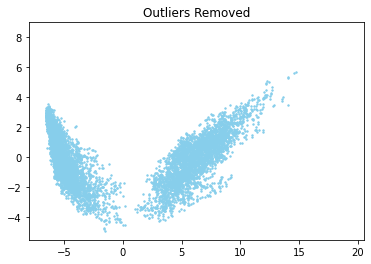

In [ ]:
plt.scatter(X_train_pca2[:,0], X_train_pca2[:,1], color='skyblue', s=2)
plt.title("Outliers Removed")
plt.ylim(-5.5,9)
plt.xlim(-8,20.5)
plt.savefig('FigXX-OutlierRemoved.png', dpi=600)
plt.show()  

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8591788259246692
F1-score [0.87189293 0.78982301 0.84223301 0.80042463 0.82971014 1.        ]
              precision    recall  f1-score   support

           1     0.8291    0.9194    0.8719       496
           2     0.8245    0.7580    0.7898       471
           3     0.8589    0.8262    0.8422       420
           4     0.8359    0.7678    0.8004       491
           5     0.8007    0.8609    0.8297       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8592      2947
   macro avg     0.8582    0.8554    0.8557      2947
weighted avg     0.8598    0.8592    0.8584      2947



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train2, y_train2)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9032914828639295
F1-score [0.90262172 0.89904357 0.86345904 0.85466377 0.88512912 0.99719888]
              precision    recall  f1-score   support

           1     0.8427    0.9718    0.9026       496
           2     0.9000    0.8981    0.8990       471
           3     0.9513    0.7905    0.8635       420
           4     0.9142    0.8024    0.8547       491
           5     0.8409    0.9342    0.8851       532
           6     1.0000    0.9944    0.9972       537

    accuracy                         0.9033      2947
   macro avg     0.9082    0.8986    0.9004      2947
weighted avg     0.9076    0.9033    0.9026      2947



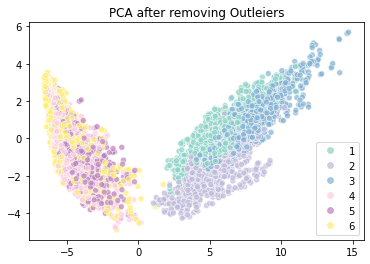

In [ ]:
classes = ['1', '2', '3', '4', '5', '6']
scatter = plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=y_train2, cmap=plt.cm.Set3, edgecolor='white', linewidth = .7, alpha = .7)
plt.title("PCA after removing Outleiers")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-PCAOutliersRemoved.png', dpi=600) 

### **<font color="#34eb89">4.6.2 Transforming Outliers</font>**

In [ ]:
df_outliers_mean = data.copy()
df_outliers_mean.drop(finale_out, inplace=True)

means=[] #contiene le medie di tutte le 561 features del dataset SENZA outliers
for col in df_outliers_mean.columns:
    means.append(df_outliers_mean[col].mean())
len(df_outliers_mean)

7270

In [ ]:
for i in finale_out: # crea una riga in più per ogni outliers e ci inserisco means in tutte le featuers
    df_outliers_mean.loc[i] = means

df_outliers_mean.info()  # a questo punto sono stati reinseriti gli outliers con le medie "pulite" del train
# infatti nella cella prima sono 81 in meno, ora di nuovo 7352

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 6692
Columns: 561 entries, 1 tBodyAcc-mean()-X
 to 561 angle(Z,gravityMean)

dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
df_outliers_mean = df_outliers_mean.sort_index()
df_outliers_mean.describe().T

count      mean       std  \
1 tBodyAcc-mean()-X\n                       7352.0  0.274705  0.067647   
2 tBodyAcc-mean()-Y\n                       7352.0 -0.017907  0.038019   
3 tBodyAcc-mean()-Z\n                       7352.0 -0.108979  0.055110   
4 tBodyAcc-std()-X\n                        7352.0 -0.610372  0.441627   
5 tBodyAcc-std()-Y\n                        7352.0 -0.517379  0.494886   
...                                            ...       ...       ...   
557 angle(tBodyGyroMean,gravityMean)\n      7352.0  0.007623  0.604191   
558 angle(tBodyGyroJerkMean,gravityMean)\n  7352.0 -0.005836  0.475553   
559 angle(X,gravityMean)\n                  7352.0 -0.489967  0.509153   
560 angle(Y,gravityMean)\n                  7352.0  0.058268  0.295407   
561 angle(Z,gravityMean)\n                  7352.0 -0.057944  0.277154   

                                                 min       25%       50%  \
1 tBodyAcc-mean()-X\n                      -1.000000  0.263816  0.277091   
2 tBodyAcc-mean()-Y\n                      -1.000000 -0.024572 -0.017310   
3 tBodyAcc-mean()-Z\n                      -1.000000 -0.120672 -0.108790   
4 tBodyAcc-std()-X\n                       -1.000000 -0.992743 -0.944821   
5 tBodyAcc-std()-Y\n                       -0.999873 -0.978082 -0.846175   
...                                              ...       ...       ...   
557 angle(tBodyGyroMean,gravityMean)\n     -1.000000 -0.477649  0.007623   
558 angle(tBodyGyroJerkMean,gravityMean)\n -1.000000 -0.373221 -0.005836   
559 angle(X,gravityMean)\n                 -1.000000 -0.811243 -0.706503   
560 angle(Y,gravityMean)\n                 -1.000000 -0.015664  0.179379   
561 angle(Z,gravityMean)\n                 -1.000000 -0.142207 -0.001551   

                                                 75%       max  
1 tBodyAcc-mean()-X\n                       0.287767  1.000000  
2 tBodyAcc-mean()-Y\n                      -0.011078  0.646747  
3 tBodyAcc-mean()-Z\n                      -0.098127  1.000000  
4 tBodyAcc-std()-X\n                       -0.250087  0.899922  
5 tBodyAcc-std()-Y\n                       -0.043048  0.832094  
...                                              ...       ...  
557 angle(tBodyGyroMean,gravityMean)\n      0.493329  0.998702  
558 angle(tBodyGyroJerkMean,gravityMean)\n  0.356266  0.996078  
559 angle(X,gravityMean)\n                 -0.489967  1.000000  
560 angle(Y,gravityMean)\n                  0.247800  0.478157  
561 angle(Z,gravityMean)\n                  0.103381  1.000000  

[561 rows x 8 columns]

In [ ]:
X_train3 = df_outliers_mean.values
y_train3 = y_train

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train3, y_train3)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.843909060061079
F1-score [0.85685885 0.79284963 0.75152999 0.80042463 0.82971014 1.        ]
              precision    recall  f1-score   support

           1     0.8451    0.8690    0.8569       496
           2     0.7854    0.8004    0.7928       471
           3     0.7733    0.7310    0.7515       420
           4     0.8359    0.7678    0.8004       491
           5     0.8007    0.8609    0.8297       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8439      2947
   macro avg     0.8401    0.8382    0.8386      2947
weighted avg     0.8440    0.8439    0.8434      2947



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train3, y_train3)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9029521547336274
F1-score [0.90262172 0.89904357 0.86233766 0.85466377 0.88413547 0.99719888]
              precision    recall  f1-score   support

           1     0.8427    0.9718    0.9026       496
           2     0.9000    0.8981    0.8990       471
           3     0.9486    0.7905    0.8623       420
           4     0.9142    0.8024    0.8547       491
           5     0.8407    0.9323    0.8841       532
           6     1.0000    0.9944    0.9972       537

    accuracy                         0.9030      2947
   macro avg     0.9077    0.8983    0.9000      2947
weighted avg     0.9071    0.9030    0.9022      2947



## **<font color="#FBBF44">5.14 Rechecking Outliers</font>**

### **<font color="#34eb89">4.7.1 Preprocessing</font>**

In [ ]:
# Cerchiamo valore ottimo di componenti
pca = PCA(n_components=10)
Principal_components=pca.fit_transform(X_train3)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_train3_pca = pca.fit_transform(X_train3)
X_train3_pca.shape

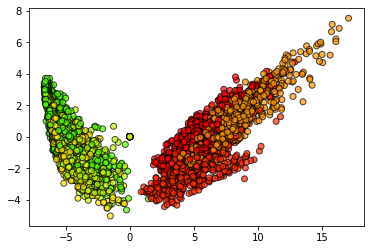

In [ ]:
plt.scatter(X_train3_pca[:, 0], X_train3_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train3_pca, y_train3)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

### **<font color="#34eb89">4.7.2 DBSCAN</font>**

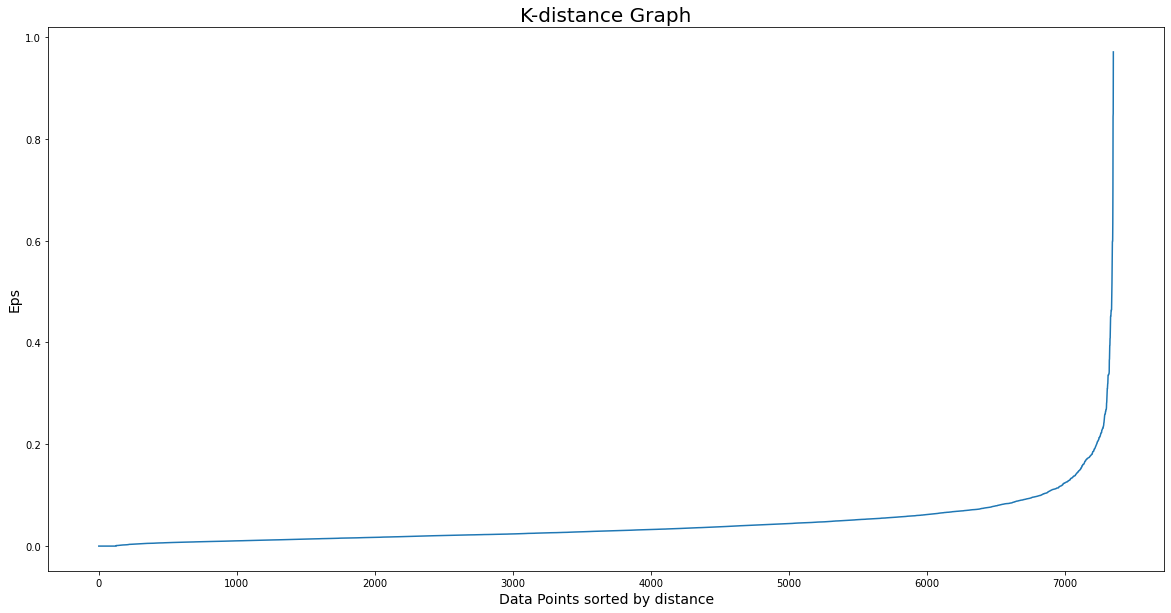

In [ ]:
# Calcoliamo i valori di distanza tra ogni record e il suo nearest neighbor
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(X_train3_pca)
distances, indices = nbrs.kneighbors(X_train3_pca)

# Plottiamo la distanza dentro i valori del df e cerchiamo il "gomito" per vedere il punto di massima curvatura e quindi il valore ottimo di Eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Eps',fontsize=14)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=.3, 
                min_samples=2,
                n_jobs=-1
                )
dbscan.fit(X_train3_pca)

# Vediamo i "cluster" che DBSCAN ha trovato e li contiamo, -1 e noise, quindi, outlier
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([  46,  126, 3900, 3168,    2,    3,    6,    8,    2,    3,    2,
          20,    4,    3,    7,    7,   15,    7,    2,    2,    2,    2,
           3,    2,    2,    3,    2,    3]))

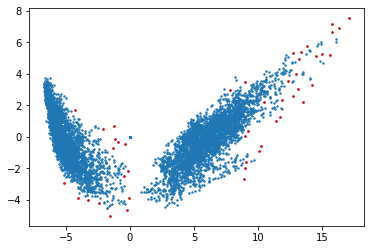

In [ ]:
anomalies_db = where(dbscan.labels_==-1)
anomalies_db = X_train3_pca[anomalies_db]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_db[:,0], anomalies_db[:,1], color='red', s=2)
plt.show()

### **<font color="#34eb89">4.7.3 Isolation Forest</font>**

In [ ]:
# model = IsolationForest(random_state=47)

#  param_grid = {'n_estimators': [1000, 1500], 
#                'max_samples': [10], 
#                'contamination': ['auto', 0.0001, 0.0002], 
#                'bootstrap': [True], 
#                'n_jobs': [-1]}

#  grid_search = model_selection.GridSearchCV(model, 
#                                             param_grid,
#                                             scoring="neg_mean_squared_error", 
#                                             refit=True,
#                                             cv=10, 
#                                             return_train_score=True)
# grid_search.fit(X_train_pca, y_train)

# best_model = grid_search.fit(X_train_pca, y_train)
# print('Optimum parameters', best_model.best_params_)

In [ ]:
isol = IsolationForest(bootstrap=True,  
                       contamination=0.02, 
                       max_samples=600, 
                       n_estimators=1000, 
                       n_jobs=-1
                       )
isol.fit(X_train3_pca)
outliers_isol = isol.predict(X_train3_pca)
np.unique(outliers_isol, return_counts=True)

(array([-1,  1]), array([ 148, 7204]))

In [ ]:
anomalies_isol = where(outliers_isol==-1)
anomalies_isol = X_train3_pca[anomalies_isol]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_isol[:,0], anomalies_isol[:,1], color='red', s=2)
plt.show()

### **<font color="#34eb89">4.3 ABOD</font>**

In [ ]:
! pip install pyod
from pyod.models.abod import ABOD

In [ ]:
param_grid = {'contamination': [0.1, 0.2,0.3,0.4,0.5],
              'n_neighbors': [5,6,7,8,9,10],
              'method': ["fast", "default"], }

In [ ]:
abd = ABOD(n_neighbors=7,
           contamination=.02 #Tentativo di GridSearch per ABOD 
           )
abd.fit(X_train3_pca)
outliers_abd = abd.predict(X_train3_pca)
np.unique(outliers_abd, return_counts=True)

In [ ]:
# param_grid = {'contamination': [0.1, 0.2,0.3,0.4,0.5],
#               'n_neighbors': [5,6,7,8,9,10],
#               'method': ["fast", "default"], }

# abd_gridsearch=GridSearchCV(estimator=abd, param_grid=param_grid, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print(abd_gridsearch.best_params_)

In [ ]:
anomalies_abd = where(outliers_abd==1)
anomalies_abd = X_train3_pca[anomalies_abd]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_abd[:,0], anomalies_abd[:,1], color='red', s=2) 
plt.show()

### **<font color="#34eb89">4.7.4 LOF</font>**

In [ ]:
lof = LocalOutlierFactor(n_neighbors=98,
                         contamination=.02,
                         algorithm='kd_tree',
                         )
outliers_lof = lof.fit_predict(X_train3_pca)
np.unique(outliers_lof, return_counts=True)

In [ ]:
max_val = np.max(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])
min_val = np.min(lof.negative_outlier_factor_[np.where(outliers_lof==-1)])

print(max_val)
print(min_val)

-1.546432671109742
-13497122133.128384


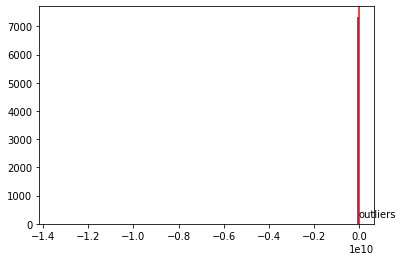

In [ ]:
plt.hist(lof.negative_outlier_factor_, bins=200)
plt.axvline(max_val, c='red')
plt.text(max_val, 250, 'outliers')
plt.show()

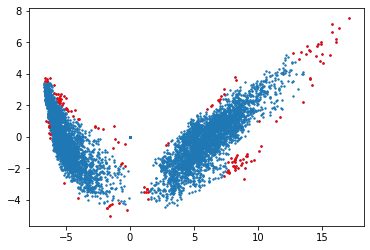

In [ ]:
anomalies_lof = where(outliers_lof==-1)
anomalies_lof = X_train3_pca[anomalies_lof]

plt.scatter(X_train3_pca[:,0], X_train3_pca[:,1], s=2)
plt.scatter(anomalies_lof[:,0], anomalies_lof[:,1], color='red', s=2)
plt.show()

# **<font color="#42f5f5">6.0 ADVANCED CLASSIFICATION</font>**

## **<font color="#FBBF44">6.0.0 Super Model</font>**

### **<font color="#34eb89">Crossvalidation</font>**

In [ ]:
# Lista dei modeli a utilizzare 
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier()
model_gaussnb = GaussianNB()
model_bernb = BernoulliNB()
model_logreg = LogisticRegression()
model_linsvc = LinearSVC()
model_svc = SVC()
model_mlp = MLPClassifier()
model_rfc = RandomForestClassifier()
model_etc = ExtraTreesClassifier()
model_bag = BaggingClassifier()
model_gbc = GradientBoostingClassifier()
model_xgb = XGBClassifier()

# Dizionario a percorrere per chiamare ogni modello
models = {
    'Decision Tree': model_dt,
    'K Neighbors': model_knn,
    'Gaussian Naive Bayes': model_gaussnb,
    'Bernoulli Naive Bayes': model_bernb,
    'Logistic Regression': model_logreg,
    'Linear SVM': model_linsvc,
    'SVM': model_svc,
    'MLP': model_mlp,
    'Random Forest': model_rfc,
    'ExtraTrees': model_etc,
    'Bagging': model_bag,
    'GradientBoost': model_gbc,
    'XGBoost': model_xgb
    }

# Lista vuota dove mettere i valori accuracy di ogni metodo con cross-validation
validation_scores = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Prima "vista" del performance di ogni modello, inizializzandoli senza alcun parametri, 
for name, model in models.items():
    print(f"{name}'s KFold starting")
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1, verbose=0).mean()
    print(f"{name}'s cross validation score: {score:.6f}\n")
    validation_scores[name] = score

Decision Tree's KFold starting
Decision Tree's cross validation score: 0.938655

K Neighbors's KFold starting
K Neighbors's cross validation score: 0.965044

Gaussian Naive Bayes's KFold starting
Gaussian Naive Bayes's cross validation score: 0.728652

Bernoulli Naive Bayes's KFold starting
Bernoulli Naive Bayes's cross validation score: 0.858814

Logistic Regression's KFold starting
Logistic Regression's cross validation score: 0.982047

Linear SVM's KFold starting
Linear SVM's cross validation score: 0.986263

SVM's KFold starting
SVM's cross validation score: 0.970757

MLP's KFold starting
MLP's cross validation score: 0.982048

Random Forest's KFold starting
Random Forest's cross validation score: 0.980686

ExtraTrees's KFold starting
ExtraTrees's cross validation score: 0.986126

Bagging's KFold starting
Bagging's cross validation score: 0.966132

GradientBoost's KFold starting
GradientBoost's cross validation score: 0.988575

XGBoost's KFold starting
XGBoost's cross validation sc

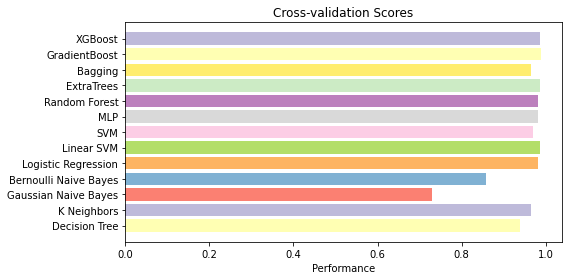

In [ ]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('Set3')

plt.barh(list(validation_scores.keys()), list(validation_scores.values()), color=colors[1:16])
plt.title("Cross-validation Scores")
plt.xlabel('Performance')
plt.savefig('FigXXCrossValidationScore.png', dpi=600) 
plt.show()

In [ ]:
# Lista dei modeli a utilizzare con hypertuning
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       min_samples_leaf=2, random_state=0)
model_knn = KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance')
model_gaussnb = GaussianNB(var_smoothing=0.0001)
model_bernb = BernoulliNB(alpha=0)
model_logreg = LogisticRegression(penalty='l1',  random_state=0, solver='liblinear')
model_linsvc = LinearSVC(C=1, dual=False, fit_intercept=False, random_state=0)
model_svc = SVC(C=5, random_state=0)
model_mlp = MLPClassifier(alpha=0.05, hidden_layer_sizes=(555,), learning_rate='adaptive',
              max_iter=10000, solver='sgd')
model_rfc = RandomForestClassifier(criterion='entropy', n_estimators=300, oob_score=True, random_state=0)
model_etc = ExtraTreesClassifier(n_estimators=300, random_state=0)
model_bag = BaggingClassifier(max_samples=0.5, n_estimators=300, random_state=0)
model_gbc = GradientBoostingClassifier(n_estimators=300, random_state=0)
model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None, predictor='auto',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=2, min_child_weight=1, monotone_constraints='()', 
              n_estimators=300, n_jobs=8, num_parallel_tree=1, objective='multi:softprob', 
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# Dizionario a percorrere per chiamare ogni modello
models = {
    'Gaussian Naive Bayes': model_gaussnb,
    'Bernoulli Naive Bayes': model_bernb,
    'MLP': model_mlp,
    'Random Forest': model_rfc,
    'ExtraTrees': model_etc,
    'Bagging': model_bag,
    'GradientBoost': model_gbc,
    'XGBoost': model_xgb,
    'SVC': model_svc,
    'Linear SVC': model_linsvc,
    'Logistic Regression': model_logreg,
    'Decision Tree': model_dt,
    'K Neighbors': model_knn
    }

# Lista vuota dove mettere i valori accuracy di ogni metodo con cross-validation
tuned_validation_scores = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Crossvalidation con parametri tunnati
import math
for name, model in models.items():
    print(f"{name}'s KFold starting")
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf, n_jobs=-1, verbose=0).mean()
    prev_score = round(validation_scores[name],6)
    print(f"{name}'s cross validation score before tunning: ", prev_score)
    print(f"{name}'s cross validation score after tunning: {score:.6f}")
    tuned_validation_scores[name] = score
    print("Improvement over base model: ", round(((score-prev_score)/prev_score)*100,4), "%\n")

Gaussian Naive Bayes's KFold starting
Gaussian Naive Bayes's cross validation score before tunning:  0.728652
Gaussian Naive Bayes's cross validation score after tunning: 0.821953
Improvement over base model:  12.8045 %

Bernoulli Naive Bayes's KFold starting
Bernoulli Naive Bayes's cross validation score before tunning:  0.858814
Bernoulli Naive Bayes's cross validation score after tunning: 0.861262
Improvement over base model:  0.285 %

MLP's KFold starting
MLP's cross validation score before tunning:  0.982048
MLP's cross validation score after tunning: 0.980958
Improvement over base model:  -0.1109 %

Random Forest's KFold starting
Random Forest's cross validation score before tunning:  0.980686
Random Forest's cross validation score after tunning: 0.983543
Improvement over base model:  0.2913 %

ExtraTrees's KFold starting
ExtraTrees's cross validation score before tunning:  0.986126
ExtraTrees's cross validation score after tunning: 0.987350
Improvement over base model:  0.1242 %

In [ ]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('Set3')

plt.barh(list(tuned_validation_scores.keys()), list(tuned_validation_scores.values()), color=colors)
plt.title("Cross-validation Scores after tuning")
plt.xlabel('Performance')
plt.savefig('FigXX-TunedCrossValidationScore.png', dpi=600) 
plt.show()

### **<font color="#34eb89">RandomSearch</font>**

In [ ]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [2,4,6,8,10,12], 
    'max_leaf_nodes': [2,4,6,8,10,20,30,40,50], 
    'min_samples_leaf': [2,3,4,5], 
    'random_state': [0], 
    }

knn_param_grid = {
    #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23], #default: 5
    'weights': ['uniform', 'distance'], #default = ‘uniform’
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

gaussnb_param_grid = {
    'priors': [None], 
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
    }

bernb_param_grid = {
    'alpha': [0,.5,1], 
#     'binarize': [], 
#    'class_prior': [False, True], 
#    'fit_prior': []
    }

logreg_param_grid = {             
    #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
    'fit_intercept': [True, False], #default: True
    'penalty': ['l1','l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
    'random_state': [0]
    }

linsvc_param_grid = {
    'C': [.25, .5, .75, 1], 
#     'class_weight': [], 
    'dual': [False], 
    'fit_intercept': [False, True], 
#     'intercept_scaling': [], 
    'loss': ['hinge', 'squared_hinge'], 
#     'max_iter': [], 
#     'multi_class': [], 
#     'penalty': [], 
     'random_state': [0], 
#     'tol': []
    }

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [.1,.5,1], #default=1.0
    'gamma': [.25, .5, 1.0], #edfault: auto
    'decision_function_shape': ['ovo', 'ovr'], #default:ovr
    'random_state': [0]
    }

mlp_param_grid = {
    'hidden_layer_sizes': [(368,), (555,), (100,)],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 1000, 5000, 10000]
    }

rfc_param_grid = {
    #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
    'n_estimators': [10, 50, 100, 300], #default=10
    'criterion': ['gini', 'entropy'], #default=”gini”
    'max_depth': [2, 4, 6, 8, 10, None], #default=None
    'oob_score': [True], #default=False 
    'random_state': [0]
    }

etc_param_grid = {
    #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
    'n_estimators': [10, 50, 100, 300], #default=10
    'criterion': ['gini', 'entropy'], #default=”gini”
    'max_depth': [2, 4, 6, 8, 10, None], #default=None
    'random_state': [0]
    }

bag_param_grid = {
    #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
    'n_estimators': [10, 50, 100, 300], #default=10
    'max_samples': [.5, 1], #default=1.0
    'random_state': [0]
    }

gbc_param_grid = {
    #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
    'loss': ['deviance', 'exponential'], #default=’deviance’
    'learning_rate': [.05], #default=0.1 
    'n_estimators': [300], #default=100 
    'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
    'max_depth': [2, 4, 6, 8, 10, None], #default=3   
    'random_state': [0]
    }

xgb_param_grid = {
    #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
    'learning_rate': [.01, .03, .05, .1, .25], #default: .3
    'max_depth': [2,4,6,8,10], #default 2
    'n_estimators': [10, 50, 100, 300], 
    'seed': [0]  
    }

models_params = {
#     'Decision Tree': [model_dt, dt_param_grid],
#     'K Neighbors': [model_knn, knn_param_grid],
#     'Gaussian Naive Bayes': [model_gaussnb, gaussnb_param_grid],
#     'Bernoulli Naive Bayes': [model_bernb, bernb_param_grid],
#     'Logistic Regression': [model_logreg, logreg_param_grid],
#     'Linear SVM': [model_linsvc, linsvc_param_grid],
#     'SVM': [model_svc, svc_param_grid],
#     'MLP': [model_mlp, mlp_param_grid],
#     'Random Forest': [model_rfc, rfc_param_grid],
#     'ExtraTrees': [model_etc, etc_param_grid],
#     'Bagging': [model_bag, bag_param_grid],
#     'GradientBoost': [model_gbc, gbc_param_grid],
#     'XGBoost': [model_xgb, xgb_param_grid]
    }

In [ ]:
random_models = {}
random_validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Random search starting')
    search = RandomizedSearchCV(estimator = model, 
                                param_distributions = param, 
                                n_iter = 100, 
                                cv = kf, 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1).fit(X_train, y_train)
    random_models[name] = search.best_estimator_
    random_validation_scores[name] = search.best_score_
    print(f'Best score: {search.best_score_}')
    print("Best parameters: ", random_models[name], '\n')

### **<font color="#34eb89">Gridsearch</font>**

In [ ]:
final_models = {}
final_validation_scores = {}

for name, [model, param] in models_params.items():
    print(f'{name} Grid search starting')
    search = GridSearchCV(model, 
                          param, 
                          cv=kf, 
                          n_jobs=-1, 
                          verbose=1,
                          scoring='accuracy').fit(X_train, y_train)
    final_models[name] = search.best_estimator_
    final_validation_scores[name] = search.best_score_
    print(f'Best score: {search.best_score_}')
    print("Best parameters: ", final_models[name], '\n')

### **<font color="#34eb89">ROC e PR Senza Hypertuning</font>**

In [ ]:
# Lista dei modeli a utilizzare 
gauss_nb = OneVsRestClassifier(GaussianNB())
bern_nb = OneVsRestClassifier(BernoulliNB())
mlp = OneVsRestClassifier(MLPClassifier())
rfc = OneVsRestClassifier(RandomForestClassifier())
etc = OneVsRestClassifier(ExtraTreesClassifier())
bag = OneVsRestClassifier(BaggingClassifier())
gbc = OneVsRestClassifier(GradientBoostingClassifier())
xgb = OneVsRestClassifier(XGBClassifier())
svc = OneVsRestClassifier(SVC())
lin_svc = OneVsRestClassifier(LinearSVC())
log_reg = OneVsRestClassifier(LogisticRegression())
dtc = OneVsRestClassifier(DecisionTreeClassifier())
knn = OneVsRestClassifier(KNeighborsClassifier())

# Dizionario a percorrere per chiamare ogni modello
models = {
    'Gaussian Naive Bayes': gauss_nb,
    'Bernoulli Naive Bayes': bern_nb,
    'MLP': mlp,
    'Random Forest': rfc,
    'ExtraTrees': etc,
    'Bagging': bag,
    'GradientBoost': gbc,
    'XGBoost': xgb,
    'SVC': svc,
    'LinearSVC': lin_svc,
    'Logistic Regression': log_reg,
    'Decision Tree': dtc,
    'K Nearest Neighbor': knn
    }

In [ ]:
# FARE ATTENZIONE A NON ESEGUIRLA DUE VOLTE SE NON SI VUOLE PERDERE UN SACCO DI TEMPO
for name, model in models.items():
    model.fit(X_train, y_train_bin)  
    print(f"{name} fitted")

In [ ]:
y_score1 = gauss_nb.predict_proba(X_test)
y_score2 = bern_nb.predict_proba(X_test)
y_score3 = mlp.predict_proba(X_test)
y_score4 = rfc.predict_proba(X_test)
y_score5 = etc.predict_proba(X_test)
y_score6 = bag.predict_proba(X_test)
y_score7 = xgb.predict_proba(X_test)
y_score8 = gbc.predict_proba(X_test)
y_score9 = svc.decision_function(X_test)
y_score10 = lin_svc.decision_function(X_test)
y_score13 = log_reg.predict_proba(X_test)
y_score11 = dtc.predict_proba(X_test)
y_score12 = knn.predict_proba(X_test)

In [ ]:
plt.figure(figsize=(10,7))
lw = 2

#################### GAUSSIAN NAIVE BAYES ####################
fpr1 = {}
tpr1 = {}
roc_auc1 = {}
for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y_test_bin[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test_bin.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

plt.plot(
    fpr1["micro"],
    tpr1["micro"],
    label="Gaussian Naïve Bayes (AUC:{0:0.2f})".format(roc_auc1["micro"]),
    color="navy",
    linestyle=":",
    linewidth=lw,
)

#################### BERNOULLI NAIVE BAYES ####################
fpr2 = {}
tpr2 = {}
roc_auc2 = {}
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_bin[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
    
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test_bin.ravel(), y_score2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

plt.plot(
    fpr2["micro"],
    tpr2["micro"],
    label="Bernoulli Naïve Bayes (AUC:{0:0.2f})".format(roc_auc2["micro"]),
    color="turquoise",
    linestyle=":",
    linewidth=lw,
)

#################### MULTILAYER PERCEPTRON ####################
fpr3 = {}
tpr3 = {}
roc_auc3 = {}
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_bin[:, i], y_score3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])
    
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_test_bin.ravel(), y_score3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

plt.plot(
    fpr3["micro"],
    tpr3["micro"],
    label="MultiLayer Perceptron (AUC:{0:0.2f})".format(roc_auc3["micro"]),
    color="darkorange",
    linestyle=":",
    linewidth=lw,
)

#################### RANDOM FOREST ####################
fpr4 = {}
tpr4 = {}
roc_auc4 = {}
for i in range(n_classes):
    fpr4[i], tpr4[i], _ = roc_curve(y_test_bin[:, i], y_score4[:, i])
    roc_auc4[i] = auc(fpr4[i], tpr4[i])
    
fpr4["micro"], tpr4["micro"], _ = roc_curve(y_test_bin.ravel(), y_score4.ravel())
roc_auc4["micro"] = auc(fpr4["micro"], tpr4["micro"])

plt.plot(
    fpr4["micro"],
    tpr4["micro"],
    label="Random Forest (AUC:{0:0.2f})".format(roc_auc4["micro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=lw,
)

#################### EXTRA TREES ####################
fpr5 = {}
tpr5 = {}
roc_auc5 = {}
for i in range(n_classes):
    fpr5[i], tpr5[i], _ = roc_curve(y_test_bin[:, i], y_score5[:, i])
    roc_auc5[i] = auc(fpr5[i], tpr5[i])
    
fpr5["micro"], tpr5["micro"], _ = roc_curve(y_test_bin.ravel(), y_score5.ravel())
roc_auc5["micro"] = auc(fpr5["micro"], tpr5["micro"])

plt.plot(
    fpr5["micro"],
    tpr5["micro"],
    label="Extra Trees (AUC:{0:0.2f})".format(roc_auc5["micro"]),
    color="darkred",
    linestyle=":",
    linewidth=lw,
)

#################### BAGGING ####################
fpr6 = {}
tpr6 = {}
roc_auc6 = {}
for i in range(n_classes):
    fpr6[i], tpr6[i], _ = roc_curve(y_test_bin[:, i], y_score6[:, i])
    roc_auc6[i] = auc(fpr6[i], tpr6[i])
    
fpr6["micro"], tpr6["micro"], _ = roc_curve(y_test_bin.ravel(), y_score6.ravel())
roc_auc6["micro"] = auc(fpr6["micro"], tpr6["micro"])

plt.plot(
    fpr6["micro"],
    tpr6["micro"],
    label="Bagging (AUC:{0:0.2f})".format(roc_auc6["micro"]),
    color="purple",
    linestyle=":",
    linewidth=lw,
)

#################### XGBOOST ####################
fpr7 = {}
tpr7 = {}
roc_auc7 = {}
for i in range(n_classes):
    fpr7[i], tpr7[i], _ = roc_curve(y_test_bin[:, i], y_score7[:, i])
    roc_auc7[i] = auc(fpr7[i], tpr7[i])
    
fpr7["micro"], tpr7["micro"], _ = roc_curve(y_test_bin.ravel(), y_score7.ravel())
roc_auc7["micro"] = auc(fpr7["micro"], tpr7["micro"])

plt.plot(
    fpr7["micro"],
    tpr7["micro"],
    label="XGBoost (AUC:{0:0.2f})".format(roc_auc7["micro"]),
    color="olivedrab",
    linestyle=":",
    linewidth=lw,
)

#################### GRADIENT BOOSTING CLASSIFIER ####################
fpr8 = {}
tpr8 = {}
roc_auc8 = {}
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_bin[:, i], y_score3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])
    
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_test_bin.ravel(), y_score3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

plt.plot(
    fpr3["micro"],
    tpr3["micro"],
    label="GradientBoosting (AUC:{0:0.2f})".format(roc_auc3["micro"]),
    color="blue",
    linestyle=":",
    linewidth=lw,
)

#################### SVC ####################
fpr9 = {}
tpr9 = {}
roc_auc9 = {}
for i in range(n_classes):
    fpr9[i], tpr9[i], _ = roc_curve(y_test_bin[:, i], y_score9[:, i])
    roc_auc9[i] = auc(fpr9[i], tpr9[i])
    
fpr9["micro"], tpr9["micro"], _ = roc_curve(y_test_bin.ravel(), y_score9.ravel())
roc_auc9["micro"] = auc(fpr9["micro"], tpr9["micro"])

plt.plot(
    fpr9["micro"],
    tpr9["micro"],
    label="SVC (AUC:{0:0.2f})".format(roc_auc9["micro"]),
    color="lime",
    linestyle=":",
    linewidth=lw,
)

#################### LINEAR SVC ####################
fpr10 = {}
tpr10 = {}
roc_auc10 = {}
for i in range(n_classes):
    fpr10[i], tpr10[i], _ = roc_curve(y_test_bin[:, i], y_score10[:, i])
    roc_auc10[i] = auc(fpr10[i], tpr10[i])
    
fpr10["micro"], tpr10["micro"], _ = roc_curve(y_test_bin.ravel(), y_score10.ravel())
roc_auc10["micro"] = auc(fpr10["micro"], tpr10["micro"])

plt.plot(
    fpr10["micro"],
    tpr10["micro"],
    label="Linear SVC (AUC:{0:0.2f})".format(roc_auc10["micro"]),
    color="yellow",
    linestyle=":",
    linewidth=lw,
)

#################### LOGISTIC REGRESSION ####################
fpr13 = {}
tpr13 = {}
roc_auc13 = {}
for i in range(n_classes):
    fpr13[i], tpr13[i], _ = roc_curve(y_test_bin[:, i], y_score13[:, i])
    roc_auc13[i] = auc(fpr13[i], tpr13[i])
    
fpr13["micro"], tpr13["micro"], _ = roc_curve(y_test_bin.ravel(), y_score13.ravel())
roc_auc13["micro"] = auc(fpr13["micro"], tpr13["micro"])

plt.plot(
    fpr13["micro"],
    tpr13["micro"],
    label="Logistic Regression (AUC:{0:0.2f})".format(roc_auc13["micro"]),
    color="darkgray",
    linestyle=":",
    linewidth=lw,
)

#################### DECISION TREE ####################
fpr11 = {}
tpr11 = {}
roc_auc11 = {}
for i in range(n_classes):
    fpr11[i], tpr11[i], _ = roc_curve(y_test_bin[:, i], y_score11[:, i])
    roc_auc11[i] = auc(fpr11[i], tpr11[i])
    
fpr11["micro"], tpr11["micro"], _ = roc_curve(y_test_bin.ravel(), y_score11.ravel())
roc_auc11["micro"] = auc(fpr11["micro"], tpr11["micro"])

plt.plot(
    fpr11["micro"],
    tpr11["micro"],
    label="Decision Tree (AUC:{0:0.2f})".format(roc_auc11["micro"]),
    color="coral",
    linestyle=":",
    linewidth=lw,
)

#################### K NEAREST NEIGHBOR ####################
fpr12 = {}
tpr12 = {}
roc_auc12 = {}
for i in range(n_classes):
    fpr12[i], tpr12[i], _ = roc_curve(y_test_bin[:, i], y_score12[:, i])
    roc_auc12[i] = auc(fpr12[i], tpr12[i])
    
fpr12["micro"], tpr12["micro"], _ = roc_curve(y_test_bin.ravel(), y_score12.ravel())
roc_auc12["micro"] = auc(fpr12["micro"], tpr12["micro"])

plt.plot(
    fpr12["micro"],
    tpr12["micro"],
    label="K Nearest Neighbor (AUC:{0:0.2f})".format(roc_auc12["micro"]),
    color="pink",
    linestyle=":",
    linewidth=lw,
)

###############################################################

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.savefig('FigXX-ROCcomparison.png', dpi=600)
plt.show() 

In [ ]:
_, ax = plt.subplots(figsize=(11, 10))

#################### GAUSSIAN NAIVE BAYES ####################
precision1 = dict()
recall1 = dict()
average_precision1 = dict()
for i in range(n_classes):
    precision1[i], recall1[i], _ = precision_recall_curve(y_test_bin[:, i], y_score1[:, i])
    average_precision1[i] = average_precision_score(y_test_bin[:, i], y_score1[:, i])

precision1["micro"], recall1["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score1.ravel())
average_precision1["micro"] = average_precision_score(y_test_bin, y_score1, average="micro")

display = PrecisionRecallDisplay(
    recall=recall1["micro"],
    precision=precision1["micro"],
    average_precision=average_precision1["micro"],
)
display.plot(ax=ax, name="Gaussian Naïve Bayes", color="navy")

#################### BERNOULLI NAIVE BAYES ####################
precision2 = dict()
recall2 = dict()
average_precision2 = dict()
for i in range(n_classes):
    precision2[i], recall2[i], _ = precision_recall_curve(y_test_bin[:, i], y_score2[:, i])
    average_precision2[i] = average_precision_score(y_test_bin[:, i], y_score2[:, i])

precision2["micro"], recall2["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score2.ravel())
average_precision2["micro"] = average_precision_score(y_test_bin, y_score2, average="micro")

display = PrecisionRecallDisplay(
        recall=recall2["micro"],
        precision=precision2["micro"],
        average_precision=average_precision2["micro"],
    )
display.plot(ax=ax, name=f"Bernoulli Naïve Bayes", color="turquoise")

#################### MULTI LAYER PERCEPTRON ####################
precision3 = dict()
recall3 = dict()
average_precision3 = dict()
for i in range(n_classes):
    precision3[i], recall3[i], _ = precision_recall_curve(y_test_bin[:, i], y_score3[:, i])
    average_precision3[i] = average_precision_score(y_test_bin[:, i], y_score3[:, i])

precision3["micro"], recall3["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score3.ravel())
average_precision3["micro"] = average_precision_score(y_test_bin, y_score3, average="micro")

display = PrecisionRecallDisplay(
        recall=recall3["micro"],
        precision=precision3["micro"],
        average_precision=average_precision3["micro"],
    )
display.plot(ax=ax, name=f"MultiLayer Perceptron", color='darkorange')

#################### RANDOM FOREST ####################
precision4 = dict()
recall4 = dict()
average_precision4 = dict()
for i in range(n_classes):
    precision4[i], recall4[i], _ = precision_recall_curve(y_test_bin[:, i], y_score4[:, i])
    average_precision4[i] = average_precision_score(y_test_bin[:, i], y_score4[:, i])

precision4["micro"], recall4["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score4.ravel())
average_precision4["micro"] = average_precision_score(y_test_bin, y_score4, average="micro")

display = PrecisionRecallDisplay(
        recall=recall4["micro"],
        precision=precision4["micro"],
        average_precision=average_precision4["micro"],
    )
display.plot(ax=ax, name=f"Random Forest", color='cornflowerblue')

#################### EXTRA TREES ####################
precision5 = dict()
recall5 = dict()
average_precision5 = dict()
for i in range(n_classes):
    precision5[i], recall5[i], _ = precision_recall_curve(y_test_bin[:, i], y_score5[:, i])
    average_precision5[i] = average_precision_score(y_test_bin[:, i], y_score5[:, i])

precision5["micro"], recall5["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score5.ravel())
average_precision5["micro"] = average_precision_score(y_test_bin, y_score5, average="micro")

display = PrecisionRecallDisplay(
        recall=recall5["micro"],
        precision=precision5["micro"],
        average_precision=average_precision5["micro"],
    )
display.plot(ax=ax, name=f"Extra Trees", color='darkred')

#################### BAGGING ####################

precision6 = dict()
recall6 = dict()
average_precision6 = dict()
for i in range(n_classes):
    precision6[i], recall6[i], _ = precision_recall_curve(y_test_bin[:, i], y_score6[:, i])
    average_precision6[i] = average_precision_score(y_test_bin[:, i], y_score6[:, i])

precision6["micro"], recall6["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score6.ravel())
average_precision6["micro"] = average_precision_score(y_test_bin, y_score6, average="micro")

display = PrecisionRecallDisplay(
        recall=recall6["micro"],
        precision=precision6["micro"],
        average_precision=average_precision6["micro"],
    )
display.plot(ax=ax, name=f"Bagging", color='purple')

#################### XGBOOST ####################
precision7 = dict()
recall7 = dict()
average_precision7 = dict()
for i in range(n_classes):
    precision7[i], recall7[i], _ = precision_recall_curve(y_test_bin[:, i], y_score7[:, i])
    average_precision7[i] = average_precision_score(y_test_bin[:, i], y_score7[:, i])

precision7["micro"], recall7["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score7.ravel())
average_precision7["micro"] = average_precision_score(y_test_bin, y_score7, average="micro")

display = PrecisionRecallDisplay(
        recall=recall7["micro"],
        precision=precision7["micro"],
        average_precision=average_precision7["micro"],
    )
display.plot(ax=ax, name=f"XGBoost", color='olivedrab')

#################### GRADIENT BOOSTING ####################
precision8 = dict()
recall8 = dict()
average_precision8 = dict()
for i in range(n_classes):
    precision8[i], recall8[i], _ = precision_recall_curve(y_test_bin[:, i], y_score8[:, i])
    average_precision8[i] = average_precision_score(y_test_bin[:, i], y_score8[:, i])

precision8["micro"], recall8["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score8.ravel())
average_precision8["micro"] = average_precision_score(y_test_bin, y_score8, average="micro")

display = PrecisionRecallDisplay(
        recall=recall8["micro"],
        precision=precision8["micro"],
        average_precision=average_precision8["micro"],
    )
display.plot(ax=ax, name=f"Gradient Boosting", color='blue')

#################### SVC ####################
precision9 = dict()
recall9 = dict()
average_precision9 = dict()
for i in range(n_classes):
    precision9[i], recall9[i], _ = precision_recall_curve(y_test_bin[:, i], y_score9[:, i])
    average_precision9[i] = average_precision_score(y_test_bin[:, i], y_score9[:, i])

precision9["micro"], recall9["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score9.ravel())
average_precision9["micro"] = average_precision_score(y_test_bin, y_score9, average="micro")

display = PrecisionRecallDisplay(
        recall=recall9["micro"],
        precision=precision9["micro"],
        average_precision=average_precision9["micro"],
    )
display.plot(ax=ax, name=f"SVC", color='lime')

#################### LINEAR SVC ####################
precision10 = dict()
recall10 = dict()
average_precision10 = dict()
for i in range(n_classes):
    precision10[i], recall10[i], _ = precision_recall_curve(y_test_bin[:, i], y_score10[:, i])
    average_precision10[i] = average_precision_score(y_test_bin[:, i], y_score10[:, i])

precision10["micro"], recall10["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score10.ravel())
average_precision10["micro"] = average_precision_score(y_test_bin, y_score10, average="micro")

display = PrecisionRecallDisplay(
        recall=recall10["micro"],
        precision=precision10["micro"],
        average_precision=average_precision10["micro"],
    )
display.plot(ax=ax, name=f"Linear SVC", color='yellow')

#################### LOGISTIC REGRESSION ####################
precision13 = dict()
recall13= dict()
average_precision13 = dict()
for i in range(n_classes):
    precision13[i], recall13[i], _ = precision_recall_curve(y_test_bin[:, i], y_score13[:, i])
    average_precision13[i] = average_precision_score(y_test_bin[:, i], y_score13[:, i])

precision13["micro"], recall13["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score13.ravel())
average_precision13["micro"] = average_precision_score(y_test_bin, y_score13, average="micro")

display = PrecisionRecallDisplay(
        recall=recall13["micro"],
        precision=precision13["micro"],
        average_precision=average_precision13["micro"],
    )
display.plot(ax=ax, name=f"Logistic Regression", color='darkgray')

#################### DECISION TREE ####################
precision11 = dict()
recall11 = dict()
average_precision11 = dict()
for i in range(n_classes):
    precision11[i], recall11[i], _ = precision_recall_curve(y_test_bin[:, i], y_score11[:, i])
    average_precision11[i] = average_precision_score(y_test_bin[:, i], y_score11[:, i])

precision11["micro"], recall11["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score11.ravel())
average_precision11["micro"] = average_precision_score(y_test_bin, y_score11, average="micro")

display = PrecisionRecallDisplay(
        recall=recall11["micro"],
        precision=precision11["micro"],
        average_precision=average_precision11["micro"],
    )
display.plot(ax=ax, name=f"Decision Tree", color='coral')

#################### K NEAREST NEIGHBOR ####################
precision12 = dict()
recall12 = dict()
average_precision12 = dict()
for i in range(n_classes):
    precision12[i], recall12[i], _ = precision_recall_curve(y_test_bin[:, i], y_score12[:, i])
    average_precision12[i] = average_precision_score(y_test_bin[:, i], y_score12[:, i])

precision12["micro"], recall12["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score12.ravel())
average_precision12["micro"] = average_precision_score(y_test_bin, y_score12, average="micro")

display = PrecisionRecallDisplay(
        recall=recall12["micro"],
        precision=precision12["micro"],
        average_precision=average_precision12["micro"],
    )
display.plot(ax=ax, name=f"K Nearest Neighbor", color='pink')

###############################################################
handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([0.0, 1.01])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision-Recall Curve Comparison")
plt.savefig('FigXX-PRcomparison.png', dpi=600)
plt.show()

### **<font color="#34eb89">ROC e PR Con Hypertuning</font>**

In [ ]:
# Lista dei modeli a utilizzare 
gauss_nb = OneVsRestClassifier(GaussianNB(var_smoothing=0.0001))
bern_nb = OneVsRestClassifier(BernoulliNB(alpha=0))
mlp = OneVsRestClassifier(MLPClassifier(alpha=0.05, hidden_layer_sizes=(555,), learning_rate='adaptive',
              max_iter=10000, solver='sgd'))
rfc = OneVsRestClassifier(RandomForestClassifier(criterion='entropy', n_estimators=300, oob_score=True, random_state=0))
etc = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=300, random_state=0))
bag = OneVsRestClassifier(BaggingClassifier(max_samples=0.5, n_estimators=300, random_state=0))
gbc = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=300, random_state=0))
xgb = OneVsRestClassifier(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None, predictor='auto',
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=2, min_child_weight=1, monotone_constraints='()', 
              n_estimators=300, n_jobs=8, num_parallel_tree=1, objective='multi:softprob', 
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None))
svc = OneVsRestClassifier(SVC(C=5, random_state=0))
lin_svc = OneVsRestClassifier(LinearSVC(C=1, dual=False, fit_intercept=False, random_state=0))
log_reg = OneVsRestClassifier(LogisticRegression(penalty='l1',  random_state=0, solver='liblinear'))
dtc = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       min_samples_leaf=2, random_state=0))
knn = OneVsRestClassifier(KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance'))

# Dizionario a percorrere per chiamare ogni modello
models = {
    'Gaussian Naive Bayes': gauss_nb,
    'Bernoulli Naive Bayes': bern_nb,
    'MLP': mlp,
    'Random Forest': rfc,
    'ExtraTrees': etc,
    'Bagging': bag,
    'GradientBoost': gbc,
    'XGBoost': xgb,
    'SVC': svc,
    'LinearSVC': lin_svc,
    'Logistic Regression': log_reg,
    'Decision Tree': dtc,
    'K Nearest Neighbor': knn
    }

In [ ]:
# FARE ATTENZIONE A NON ESEGUIRLA DUE VOLTE SE NON SI VUOLE PERDERE UN SACCO DI TEMPO
for name, model in models.items():
    model.fit(X_train, y_train_bin)  
    print(f"{name} fitted")

In [ ]:
y_score1 = gauss_nb.predict_proba(X_test)
y_score2 = bern_nb.predict_proba(X_test)
y_score3 = mlp.predict_proba(X_test)
y_score4 = rfc.predict_proba(X_test)
y_score5 = etc.predict_proba(X_test)
y_score6 = bag.predict_proba(X_test)
y_score7 = xgb.predict_proba(X_test)
y_score8 = gbc.predict_proba(X_test)
y_score9 = svc.decision_function(X_test)
y_score10 = lin_svc.decision_function(X_test)
y_score13 = log_reg.predict_proba(X_test)
y_score11 = dtc.predict_proba(X_test)
y_score12 = knn.predict_proba(X_test)

In [ ]:
plt.figure(figsize=(10,7))
lw = 2

#################### GAUSSIAN NAIVE BAYES ####################
fpr1 = {}
tpr1 = {}
roc_auc1 = {}
for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y_test_bin[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test_bin.ravel(), y_score1.ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

plt.plot(
    fpr1["micro"],
    tpr1["micro"],
    label="Gaussian Naïve Bayes (AUC:{0:0.2f})".format(roc_auc1["micro"]),
    color="navy",
    linestyle=":",
    linewidth=lw,
)

#################### BERNOULLI NAIVE BAYES ####################
fpr2 = {}
tpr2 = {}
roc_auc2 = {}
for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_bin[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
    
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test_bin.ravel(), y_score2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

plt.plot(
    fpr2["micro"],
    tpr2["micro"],
    label="Bernoulli Naïve Bayes (AUC:{0:0.2f})".format(roc_auc2["micro"]),
    color="turquoise",
    linestyle=":",
    linewidth=lw,
)

#################### MULTILAYER PERCEPTRON ####################
fpr3 = {}
tpr3 = {}
roc_auc3 = {}
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_bin[:, i], y_score3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])
    
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_test_bin.ravel(), y_score3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

plt.plot(
    fpr3["micro"],
    tpr3["micro"],
    label="MultiLayer Perceptron (AUC:{0:0.2f})".format(roc_auc3["micro"]),
    color="darkorange",
    linestyle=":",
    linewidth=lw,
)

#################### RANDOM FOREST ####################
fpr4 = {}
tpr4 = {}
roc_auc4 = {}
for i in range(n_classes):
    fpr4[i], tpr4[i], _ = roc_curve(y_test_bin[:, i], y_score4[:, i])
    roc_auc4[i] = auc(fpr4[i], tpr4[i])
    
fpr4["micro"], tpr4["micro"], _ = roc_curve(y_test_bin.ravel(), y_score4.ravel())
roc_auc4["micro"] = auc(fpr4["micro"], tpr4["micro"])

plt.plot(
    fpr4["micro"],
    tpr4["micro"],
    label="Random Forest (AUC:{0:0.2f})".format(roc_auc4["micro"]),
    color="cornflowerblue",
    linestyle=":",
    linewidth=lw,
)

#################### EXTRA TREES ####################
fpr5 = {}
tpr5 = {}
roc_auc5 = {}
for i in range(n_classes):
    fpr5[i], tpr5[i], _ = roc_curve(y_test_bin[:, i], y_score5[:, i])
    roc_auc5[i] = auc(fpr5[i], tpr5[i])
    
fpr5["micro"], tpr5["micro"], _ = roc_curve(y_test_bin.ravel(), y_score5.ravel())
roc_auc5["micro"] = auc(fpr5["micro"], tpr5["micro"])

plt.plot(
    fpr5["micro"],
    tpr5["micro"],
    label="Extra Trees (AUC:{0:0.2f})".format(roc_auc5["micro"]),
    color="darkred",
    linestyle=":",
    linewidth=lw,
)

#################### BAGGING ####################
fpr6 = {}
tpr6 = {}
roc_auc6 = {}
for i in range(n_classes):
    fpr6[i], tpr6[i], _ = roc_curve(y_test_bin[:, i], y_score6[:, i])
    roc_auc6[i] = auc(fpr6[i], tpr6[i])
    
fpr6["micro"], tpr6["micro"], _ = roc_curve(y_test_bin.ravel(), y_score6.ravel())
roc_auc6["micro"] = auc(fpr6["micro"], tpr6["micro"])

plt.plot(
    fpr6["micro"],
    tpr6["micro"],
    label="Bagging (AUC:{0:0.2f})".format(roc_auc6["micro"]),
    color="purple",
    linestyle=":",
    linewidth=lw,
)

#################### XGBOOST ####################
fpr7 = {}
tpr7 = {}
roc_auc7 = {}
for i in range(n_classes):
    fpr7[i], tpr7[i], _ = roc_curve(y_test_bin[:, i], y_score7[:, i])
    roc_auc7[i] = auc(fpr7[i], tpr7[i])
    
fpr7["micro"], tpr7["micro"], _ = roc_curve(y_test_bin.ravel(), y_score7.ravel())
roc_auc7["micro"] = auc(fpr7["micro"], tpr7["micro"])

plt.plot(
    fpr7["micro"],
    tpr7["micro"],
    label="XGBoost (AUC:{0:0.2f})".format(roc_auc7["micro"]),
    color="olivedrab",
    linestyle=":",
    linewidth=lw,
)

#################### GRADIENT BOOSTING CLASSIFIER ####################
fpr8 = {}
tpr8 = {}
roc_auc8 = {}
for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_bin[:, i], y_score3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])
    
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_test_bin.ravel(), y_score3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

plt.plot(
    fpr3["micro"],
    tpr3["micro"],
    label="GradientBoosting (AUC:{0:0.2f})".format(roc_auc3["micro"]),
    color="blue",
    linestyle=":",
    linewidth=lw,
)

#################### SVC ####################
fpr9 = {}
tpr9 = {}
roc_auc9 = {}
for i in range(n_classes):
    fpr9[i], tpr9[i], _ = roc_curve(y_test_bin[:, i], y_score9[:, i])
    roc_auc9[i] = auc(fpr9[i], tpr9[i])
    
fpr9["micro"], tpr9["micro"], _ = roc_curve(y_test_bin.ravel(), y_score9.ravel())
roc_auc9["micro"] = auc(fpr9["micro"], tpr9["micro"])

plt.plot(
    fpr9["micro"],
    tpr9["micro"],
    label="SVC (AUC:{0:0.2f})".format(roc_auc9["micro"]),
    color="lime",
    linestyle=":",
    linewidth=lw,
)

#################### LINEAR SVC ####################
fpr10 = {}
tpr10 = {}
roc_auc10 = {}
for i in range(n_classes):
    fpr10[i], tpr10[i], _ = roc_curve(y_test_bin[:, i], y_score10[:, i])
    roc_auc10[i] = auc(fpr10[i], tpr10[i])
    
fpr10["micro"], tpr10["micro"], _ = roc_curve(y_test_bin.ravel(), y_score10.ravel())
roc_auc10["micro"] = auc(fpr10["micro"], tpr10["micro"])

plt.plot(
    fpr10["micro"],
    tpr10["micro"],
    label="Linear SVC (AUC:{0:0.2f})".format(roc_auc10["micro"]),
    color="yellow",
    linestyle=":",
    linewidth=lw,
)

#################### LOGISTIC REGRESSION ####################
fpr13 = {}
tpr13 = {}
roc_auc13 = {}
for i in range(n_classes):
    fpr13[i], tpr13[i], _ = roc_curve(y_test_bin[:, i], y_score13[:, i])
    roc_auc13[i] = auc(fpr13[i], tpr13[i])
    
fpr13["micro"], tpr13["micro"], _ = roc_curve(y_test_bin.ravel(), y_score13.ravel())
roc_auc13["micro"] = auc(fpr13["micro"], tpr13["micro"])

plt.plot(
    fpr13["micro"],
    tpr13["micro"],
    label="Logistic Regression (AUC:{0:0.2f})".format(roc_auc13["micro"]),
    color="darkgray",
    linestyle=":",
    linewidth=lw,
)

#################### DECISION TREE ####################
fpr11 = {}
tpr11 = {}
roc_auc11 = {}
for i in range(n_classes):
    fpr11[i], tpr11[i], _ = roc_curve(y_test_bin[:, i], y_score11[:, i])
    roc_auc11[i] = auc(fpr11[i], tpr11[i])
    
fpr11["micro"], tpr11["micro"], _ = roc_curve(y_test_bin.ravel(), y_score11.ravel())
roc_auc11["micro"] = auc(fpr11["micro"], tpr11["micro"])

plt.plot(
    fpr11["micro"],
    tpr11["micro"],
    label="Decision Tree (AUC:{0:0.2f})".format(roc_auc11["micro"]),
    color="coral",
    linestyle=":",
    linewidth=lw,
)

#################### K NEAREST NEIGHBOR ####################
fpr12 = {}
tpr12 = {}
roc_auc12 = {}
for i in range(n_classes):
    fpr12[i], tpr12[i], _ = roc_curve(y_test_bin[:, i], y_score12[:, i])
    roc_auc12[i] = auc(fpr12[i], tpr12[i])
    
fpr12["micro"], tpr12["micro"], _ = roc_curve(y_test_bin.ravel(), y_score12.ravel())
roc_auc12["micro"] = auc(fpr12["micro"], tpr12["micro"])

plt.plot(
    fpr12["micro"],
    tpr12["micro"],
    label="K Nearest Neighbor (AUC:{0:0.2f})".format(roc_auc12["micro"]),
    color="pink",
    linestyle=":",
    linewidth=lw,
)

###############################################################

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.savefig('FigXX-ROCcomparison.png', dpi=600)
plt.show() 

In [ ]:
_, ax = plt.subplots(figsize=(11, 10))

#################### GAUSSIAN NAIVE BAYES ####################
precision1 = dict()
recall1 = dict()
average_precision1 = dict()
for i in range(n_classes):
    precision1[i], recall1[i], _ = precision_recall_curve(y_test_bin[:, i], y_score1[:, i])
    average_precision1[i] = average_precision_score(y_test_bin[:, i], y_score1[:, i])

precision1["micro"], recall1["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score1.ravel())
average_precision1["micro"] = average_precision_score(y_test_bin, y_score1, average="micro")

display = PrecisionRecallDisplay(
    recall=recall1["micro"],
    precision=precision1["micro"],
    average_precision=average_precision1["micro"],
)
display.plot(ax=ax, name="Gaussian Naïve Bayes", color="navy")

#################### BERNOULLI NAIVE BAYES ####################
precision2 = dict()
recall2 = dict()
average_precision2 = dict()
for i in range(n_classes):
    precision2[i], recall2[i], _ = precision_recall_curve(y_test_bin[:, i], y_score2[:, i])
    average_precision2[i] = average_precision_score(y_test_bin[:, i], y_score2[:, i])

precision2["micro"], recall2["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score2.ravel())
average_precision2["micro"] = average_precision_score(y_test_bin, y_score2, average="micro")

display = PrecisionRecallDisplay(
        recall=recall2["micro"],
        precision=precision2["micro"],
        average_precision=average_precision2["micro"],
    )
display.plot(ax=ax, name=f"Bernoulli Naïve Bayes", color="turquoise")

#################### MULTI LAYER PERCEPTRON ####################
precision3 = dict()
recall3 = dict()
average_precision3 = dict()
for i in range(n_classes):
    precision3[i], recall3[i], _ = precision_recall_curve(y_test_bin[:, i], y_score3[:, i])
    average_precision3[i] = average_precision_score(y_test_bin[:, i], y_score3[:, i])

precision3["micro"], recall3["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score3.ravel())
average_precision3["micro"] = average_precision_score(y_test_bin, y_score3, average="micro")

display = PrecisionRecallDisplay(
        recall=recall3["micro"],
        precision=precision3["micro"],
        average_precision=average_precision3["micro"],
    )
display.plot(ax=ax, name=f"MultiLayer Perceptron", color='darkorange')

#################### RANDOM FOREST ####################
precision4 = dict()
recall4 = dict()
average_precision4 = dict()
for i in range(n_classes):
    precision4[i], recall4[i], _ = precision_recall_curve(y_test_bin[:, i], y_score4[:, i])
    average_precision4[i] = average_precision_score(y_test_bin[:, i], y_score4[:, i])

precision4["micro"], recall4["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score4.ravel())
average_precision4["micro"] = average_precision_score(y_test_bin, y_score4, average="micro")

display = PrecisionRecallDisplay(
        recall=recall4["micro"],
        precision=precision4["micro"],
        average_precision=average_precision4["micro"],
    )
display.plot(ax=ax, name=f"Random Forest", color='cornflowerblue')

#################### EXTRA TREES ####################
precision5 = dict()
recall5 = dict()
average_precision5 = dict()
for i in range(n_classes):
    precision5[i], recall5[i], _ = precision_recall_curve(y_test_bin[:, i], y_score5[:, i])
    average_precision5[i] = average_precision_score(y_test_bin[:, i], y_score5[:, i])

precision5["micro"], recall5["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score5.ravel())
average_precision5["micro"] = average_precision_score(y_test_bin, y_score5, average="micro")

display = PrecisionRecallDisplay(
        recall=recall5["micro"],
        precision=precision5["micro"],
        average_precision=average_precision5["micro"],
    )
display.plot(ax=ax, name=f"Extra Trees", color='darkred')

#################### BAGGING ####################

precision6 = dict()
recall6 = dict()
average_precision6 = dict()
for i in range(n_classes):
    precision6[i], recall6[i], _ = precision_recall_curve(y_test_bin[:, i], y_score6[:, i])
    average_precision6[i] = average_precision_score(y_test_bin[:, i], y_score6[:, i])

precision6["micro"], recall6["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score6.ravel())
average_precision6["micro"] = average_precision_score(y_test_bin, y_score6, average="micro")

display = PrecisionRecallDisplay(
        recall=recall6["micro"],
        precision=precision6["micro"],
        average_precision=average_precision6["micro"],
    )
display.plot(ax=ax, name=f"Bagging", color='purple')

#################### XGBOOST ####################
precision7 = dict()
recall7 = dict()
average_precision7 = dict()
for i in range(n_classes):
    precision7[i], recall7[i], _ = precision_recall_curve(y_test_bin[:, i], y_score7[:, i])
    average_precision7[i] = average_precision_score(y_test_bin[:, i], y_score7[:, i])

precision7["micro"], recall7["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score7.ravel())
average_precision7["micro"] = average_precision_score(y_test_bin, y_score7, average="micro")

display = PrecisionRecallDisplay(
        recall=recall7["micro"],
        precision=precision7["micro"],
        average_precision=average_precision7["micro"],
    )
display.plot(ax=ax, name=f"XGBoost", color='olivedrab')

#################### GRADIENT BOOSTING ####################
precision8 = dict()
recall8 = dict()
average_precision8 = dict()
for i in range(n_classes):
    precision8[i], recall8[i], _ = precision_recall_curve(y_test_bin[:, i], y_score8[:, i])
    average_precision8[i] = average_precision_score(y_test_bin[:, i], y_score8[:, i])

precision8["micro"], recall8["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score8.ravel())
average_precision8["micro"] = average_precision_score(y_test_bin, y_score8, average="micro")

display = PrecisionRecallDisplay(
        recall=recall8["micro"],
        precision=precision8["micro"],
        average_precision=average_precision8["micro"],
    )
display.plot(ax=ax, name=f"Gradient Boosting", color='blue')

#################### SVC ####################
precision9 = dict()
recall9 = dict()
average_precision9 = dict()
for i in range(n_classes):
    precision9[i], recall9[i], _ = precision_recall_curve(y_test_bin[:, i], y_score9[:, i])
    average_precision9[i] = average_precision_score(y_test_bin[:, i], y_score9[:, i])

precision9["micro"], recall9["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score9.ravel())
average_precision9["micro"] = average_precision_score(y_test_bin, y_score9, average="micro")

display = PrecisionRecallDisplay(
        recall=recall9["micro"],
        precision=precision9["micro"],
        average_precision=average_precision9["micro"],
    )
display.plot(ax=ax, name=f"SVC", color='lime')

#################### LINEAR SVC ####################
precision10 = dict()
recall10 = dict()
average_precision10 = dict()
for i in range(n_classes):
    precision10[i], recall10[i], _ = precision_recall_curve(y_test_bin[:, i], y_score10[:, i])
    average_precision10[i] = average_precision_score(y_test_bin[:, i], y_score10[:, i])

precision10["micro"], recall10["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score10.ravel())
average_precision10["micro"] = average_precision_score(y_test_bin, y_score10, average="micro")

display = PrecisionRecallDisplay(
        recall=recall10["micro"],
        precision=precision10["micro"],
        average_precision=average_precision10["micro"],
    )
display.plot(ax=ax, name=f"Linear SVC", color='yellow')

#################### LOGISTIC REGRESSION ####################
precision13 = dict()
recall13= dict()
average_precision13 = dict()
for i in range(n_classes):
    precision13[i], recall13[i], _ = precision_recall_curve(y_test_bin[:, i], y_score13[:, i])
    average_precision13[i] = average_precision_score(y_test_bin[:, i], y_score13[:, i])

precision13["micro"], recall13["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score13.ravel())
average_precision13["micro"] = average_precision_score(y_test_bin, y_score13, average="micro")

display = PrecisionRecallDisplay(
        recall=recall13["micro"],
        precision=precision13["micro"],
        average_precision=average_precision13["micro"],
    )
display.plot(ax=ax, name=f"Logistic Regression", color='darkgray')

#################### DECISION TREE ####################
precision11 = dict()
recall11 = dict()
average_precision11 = dict()
for i in range(n_classes):
    precision11[i], recall11[i], _ = precision_recall_curve(y_test_bin[:, i], y_score11[:, i])
    average_precision11[i] = average_precision_score(y_test_bin[:, i], y_score11[:, i])

precision11["micro"], recall11["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score11.ravel())
average_precision11["micro"] = average_precision_score(y_test_bin, y_score11, average="micro")

display = PrecisionRecallDisplay(
        recall=recall11["micro"],
        precision=precision11["micro"],
        average_precision=average_precision11["micro"],
    )
display.plot(ax=ax, name=f"Decision Tree", color='coral')

#################### K NEAREST NEIGHBOR ####################
precision12 = dict()
recall12 = dict()
average_precision12 = dict()
for i in range(n_classes):
    precision12[i], recall12[i], _ = precision_recall_curve(y_test_bin[:, i], y_score12[:, i])
    average_precision12[i] = average_precision_score(y_test_bin[:, i], y_score12[:, i])

precision12["micro"], recall12["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score12.ravel())
average_precision12["micro"] = average_precision_score(y_test_bin, y_score12, average="micro")

display = PrecisionRecallDisplay(
        recall=recall12["micro"],
        precision=precision12["micro"],
        average_precision=average_precision12["micro"],
    )
display.plot(ax=ax, name=f"K Nearest Neighbor", color='pink')

###############################################################
handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([0.0, 1.01])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision-Recall Curve Comparison")
plt.savefig('FigXX-PRcomparison.png', dpi=600)
plt.show()

## **<font color="#FBBF44">6.1 Naive Bayes</font>**

### **<font color="#34eb89">6.1.1 Gaussian Naive Bayes</font>**

In [ ]:
#Improve classification 
gauss_nb = GaussianNB()
gauss_nb.fit(X_train_pca_mod2, y_train)
y_pred = gauss_nb.predict(X_test_pca_mod2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.8703766542246352
F1-score [0.89557855 0.88842105 0.84141547 0.75406032 0.82453152 0.99260628]
              precision    recall  f1-score   support

           1     0.8395    0.9597    0.8956       496
           2     0.8810    0.8960    0.8884       471
           3     0.9359    0.7643    0.8414       420
           4     0.8760    0.6619    0.7541       491
           5     0.7539    0.9098    0.8245       532
           6     0.9853    1.0000    0.9926       537

    accuracy                         0.8704      2947
   macro avg     0.8786    0.8653    0.8661      2947
weighted avg     0.8771    0.8704    0.8680      2947



Accuracy 0.7702748557855447
F1-score [0.83116883 0.84456929 0.70410959 0.65480427 0.8287796  0.73997709]
              precision    recall  f1-score   support

           1     0.8238    0.8387    0.8312       496
           2     0.7554    0.9575    0.8446       471
           3     0.8290    0.6119    0.7041       420
           4     0.5814    0.7495    0.6548       491
           5     0.8039    0.8553    0.8288       532
           6     0.9613    0.6015    0.7400       537

    accuracy                         0.7703      2947
   macro avg     0.7925    0.7691    0.7672      2947
weighted avg     0.7947    0.7703    0.7688      2947



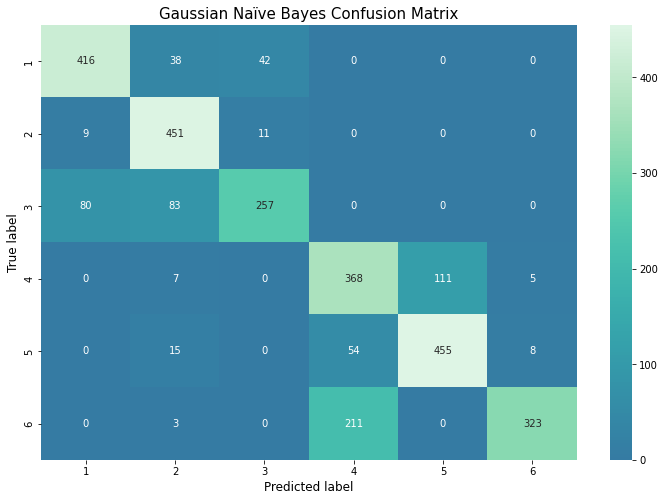

In [ ]:
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)
y_pred = gauss_nb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Gaussian Naïve Bayes'
cm_gauss_nb = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_gauss_nb, model)

Accuracy 0.8198167628096369
F1-score [0.83233533 0.84934087 0.70410959 0.66042781 0.79686275 0.99535747]
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       496
           2       0.76      0.96      0.85       471
           3       0.83      0.61      0.70       420
           4       0.96      0.50      0.66       491
           5       0.68      0.95      0.80       532
           6       0.99      1.00      1.00       537

    accuracy                           0.82      2947
   macro avg       0.84      0.81      0.81      2947
weighted avg       0.84      0.82      0.81      2947



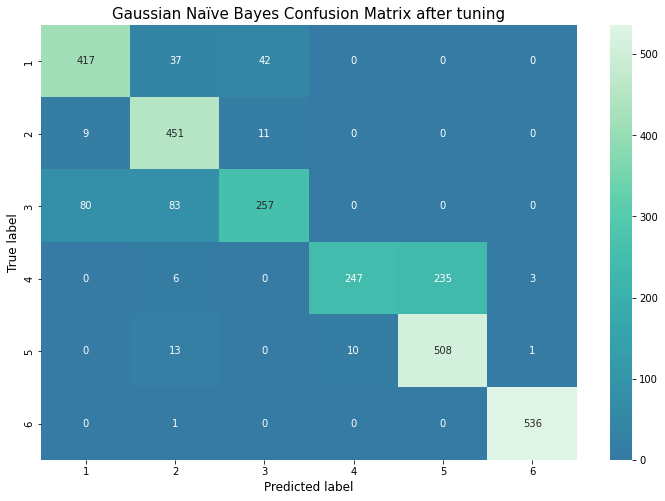

In [ ]:
gauss_nb = GaussianNB(var_smoothing=.0001)
gauss_nb.fit(X_train, y_train)
y_pred = gauss_nb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Gaussian Naïve Bayes'
cm_gauss_nb = confusion_matrix(y_test,y_pred)
draw_confusion_matrix_tuned(cm_gauss_nb, model)

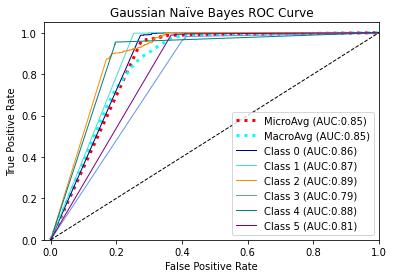

In [ ]:
# Inizializziamo il classifier
gauss_nb = OneVsRestClassifier(GaussianNB())
y_score = gauss_nb.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gaussian Naïve Bayes ROC Curve")
plt.legend(loc="lower right")
plt.show() 

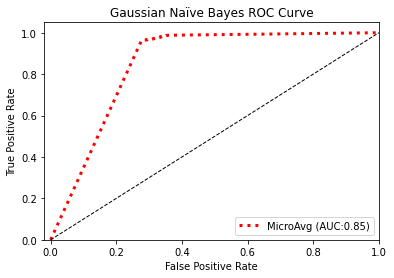

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gaussian Naïve Bayes ROC Curve")
plt.legend(loc="lower right")
plt.show() 

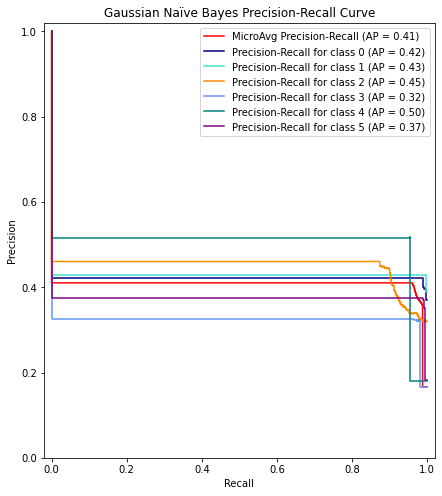

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Gaussian Naïve Bayes Precision-Recall Curve")

plt.show()

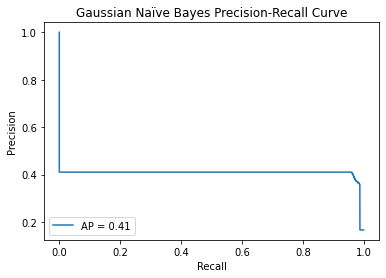

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Gaussian Naïve Bayes Precision-Recall Curve")

### **<font color="#34eb89">6.1.2 Bernoulli Naive Bayes</font>**

Accuracy 0.8500169664065151
F1-score [0.82309808 0.86065574 0.6994382  0.81318681 0.84880637 1.        ]
              precision    recall  f1-score   support

           1     0.7546    0.9052    0.8231       496
           2     0.8317    0.8917    0.8607       471
           3     0.8527    0.5929    0.6994       420
           4     0.8831    0.7536    0.8132       491
           5     0.8013    0.9023    0.8488       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.8500      2947
   macro avg     0.8539    0.8409    0.8409      2947
weighted avg     0.8555    0.8500    0.8467      2947



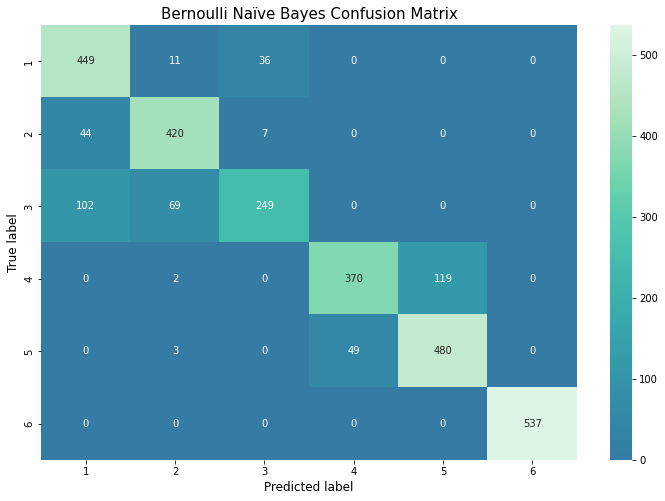

In [ ]:
bern_nb = BernoulliNB()
bern_nb.fit(X_train, y_train)
y_pred = bern_nb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Bernoulli Naïve Bayes'
cm_bern_nb = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_bern_nb, model)

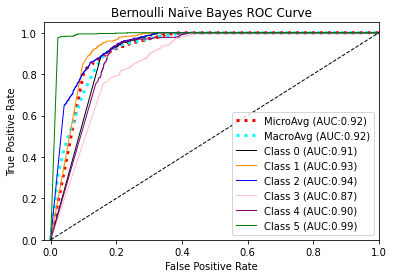

In [ ]:
# Inizializziamo il classifier
bern_nb = OneVsRestClassifier(BernoulliNB())
y_score = bern_nb.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bernoulli Naïve Bayes ROC Curve")
plt.legend(loc="lower right")
plt.show() 

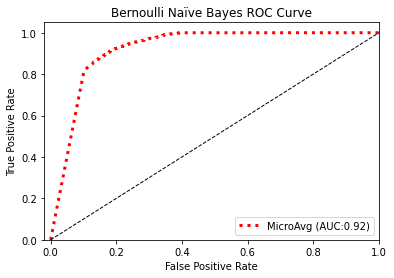

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bernoulli Naïve Bayes ROC Curve")
plt.legend(loc="lower right")
plt.show() 

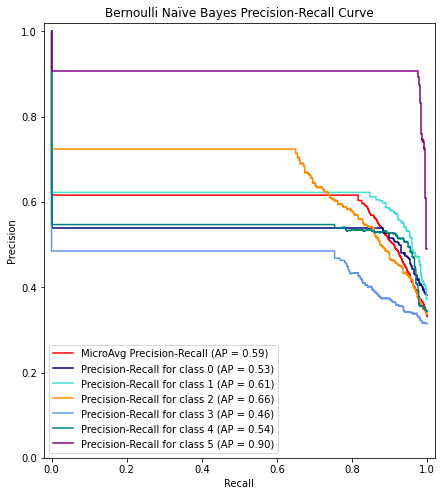

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Bernoulli Naïve Bayes Precision-Recall Curve")

plt.show()

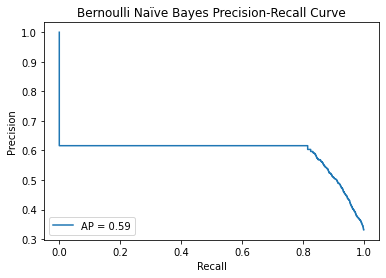

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Bernoulli Naïve Bayes Precision-Recall Curve")

## **<font color="#FBBF44">6.2 Logistic Regression</font>**

Accuracy 0.9582626399728538
F1-score [0.96850394 0.95391211 0.97342995 0.91897655 0.93393665 1.        ]
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.96      0.94      0.95       471
           3       0.99      0.96      0.97       420
           4       0.96      0.88      0.92       491
           5       0.90      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



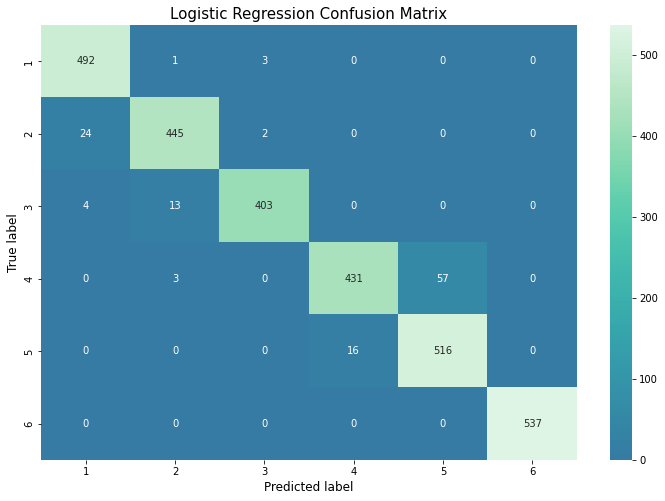

In [ ]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Logistic Regression'
cm_logreg = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_logreg, model)

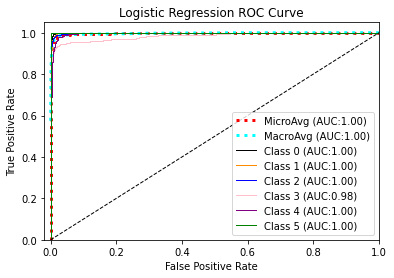

In [ ]:
# Inizializziamo il classifier
log_reg = OneVsRestClassifier(LogisticRegression())
y_score = log_reg.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show() 

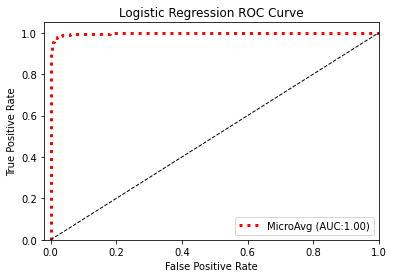

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show() 

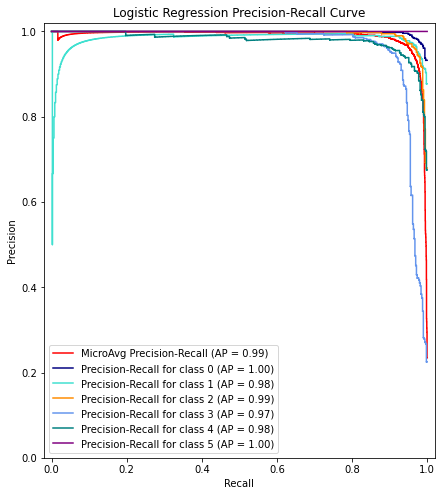

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Logistic Regression Precision-Recall Curve")

plt.show()

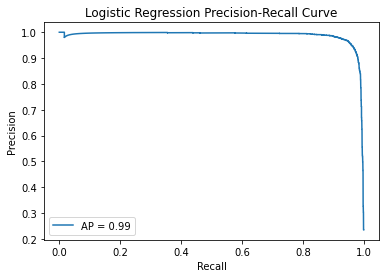

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Logistic Regression Precision-Recall Curve")

### **<font color="#34eb89">6.2.1 Logistic Function</font>**

In [ ]:
data_log = data.copy()
data_log['activity'] = y_label[0].values

# Seleziono le classi che voglio droppare. Lasciamo solo 2 e 3, 6 era troppo facile da predictare-->
classe1 = np.array(y_label[y_label[0]==1].index)
classe4 = np.array(y_label[y_label[0]==4].index)
classe5 = np.array(y_label[y_label[0]==5].index)
classe6 = np.array(y_label[ y_label[0]==6].index)
classes2remove = np.concatenate((classe1,classe4,classe5,classe6))

data_log.drop(data_log.index[classes2remove], inplace=True)

data_logtrans = data_log.copy()
data_logtrans['activity'] = data_log['activity'].replace(to_replace=[2,3], value=[0, 1])

X_train_log = data_log.iloc[:, 0:561].values
y_train_log = data_logtrans['activity'].values

In [ ]:
# Droppiamo le classi nel test per poi evaluare bene la performance del dataset ribilanciato
data_test_log = data_test.copy()
data_test_log['activity'] = y_label_test[0].values

classe1 = np.array(y_label_test[y_label_test[0]==1].index)
classe4 = np.array(y_label_test[y_label_test[0]==4].index)
classe5 = np.array(y_label_test[y_label_test[0]==5].index)
classe6 = np.array(y_label_test[ y_label_test[0]==6].index)
classes2remove = np.concatenate((classe1,classe4,classe5,classe6))

data_test_log.drop(data_test_log.index[classes2remove], inplace=True)

data_test_logtrans = data_test_log.copy()
data_test_logtrans['activity'] = data_test_log['activity'].replace(to_replace=[2,3], value=[0, 1])

X_test_log= data_test_log.iloc[:, 0:561].values
y_test_log = data_test_logtrans['activity'].values

In [ ]:
pca = PCA(n_components=1)
X_train_log_pca = pca.fit_transform(X_train_log)
X_test_log_pca = pca.transform(X_test_log)

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_log_pca.T[0].reshape(-1,1), y_train_log)
y_pred = clf.predict(X_test_log_pca.T[0].reshape(-1,1))

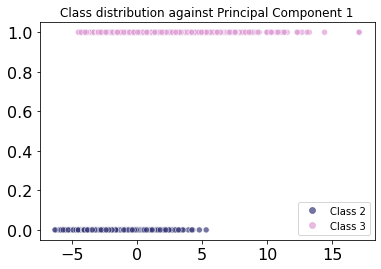

In [ ]:
classes = ['Class 2', 'Class 3']
scatter = plt.scatter(X_train_log_pca.T[0], y_train_log, c=y_train_log, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Class distribution against Principal Component 1")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-LogisticClass.png', dpi=600) 

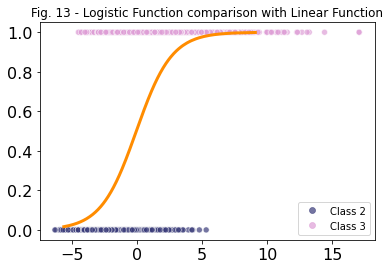

In [ ]:
from scipy.special import expit
loss = expit(sorted(X_test_log_pca.T[0].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()

classes = ['Class 2', 'Class 3']
scatter = plt.scatter(X_train_log_pca.T[0].reshape(-1,1), y_train_log, c=y_train_log, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(sorted(X_test_log_pca.T[0].reshape(-1,1)), loss, color='darkorange', linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Fig. 13 - Logistic Function comparison with Linear Function")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('FigXX-LogisticFuntion.png', dpi=600) 

In [ ]:
reg = LinearRegression()
reg.fit(X_train_log_pca.T[0].reshape(-1,1), y_train_log)

LinearRegression()

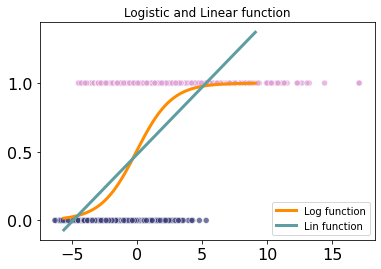

In [ ]:
loss = expit(sorted(X_test_log_pca.T[0].reshape(-1,1)) * clf.coef_ + clf.intercept_).ravel()

classes = ['Class 2', 'Class 3', 'Lin function', 'Lin function' ]
scatter = plt.scatter(X_train_log_pca.T[0].reshape(-1,1), y_train_log, c=y_train_log, cmap=plt.cm.tab20b, edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(sorted(X_test_log_pca.T[0].reshape(-1,1)), loss, color='darkorange', linewidth=3, label='Log function')
plt.plot(sorted(X_test_log_pca.T[0].reshape(-1,1)), reg.coef_ * sorted(X_test_log_pca.T[0].reshape(-1,1)) + reg.intercept_, color='cadetblue', linewidth=3, label='Lin function')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("Logistic and Linear function")
plt.legend(loc="lower right")
plt.savefig('FigXX-LogisticLinearFuntion.png', dpi=600) 

## **<font color="#FBBF44">6.3 Support Vector Machines</font>**

### **<font color="#34eb89">6.3.1 Linear SVM</font>**

Accuracy 0.9664065151001018
F1-score [0.98023715 0.97320472 0.99159664 0.92060086 0.9368231  0.99814126]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



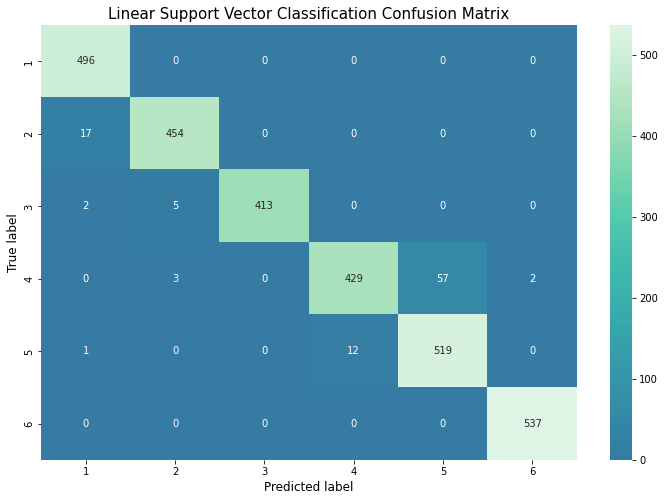

In [ ]:
lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)

y_pred = lin_svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Linear Support Vector Classification'
cm_lin_svc = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_lin_svc, model)

Accuracy 0.9657278588394977
F1-score [0.98023715 0.97106109 0.99040767 0.91926803 0.93693694 0.99814126]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.97      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



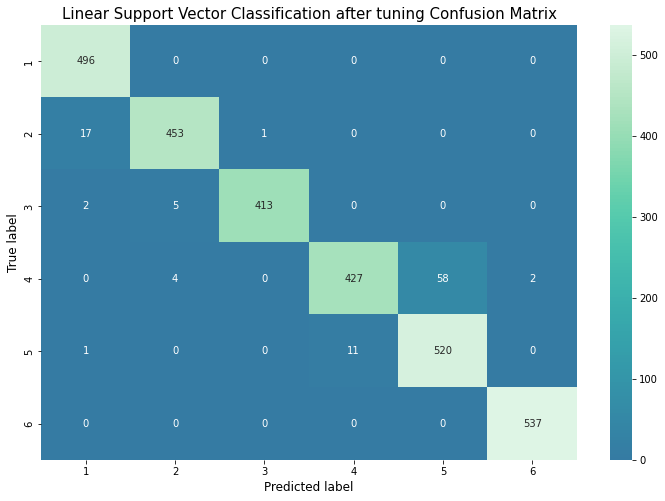

In [ ]:
lin_svc = LinearSVC(C=1, dual=False, fit_intercept=False, random_state=0)
lin_svc.fit(X_train, y_train)

y_pred = lin_svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Linear Support Vector Classification after tuning'
cm_lin_svc = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_lin_svc, model)

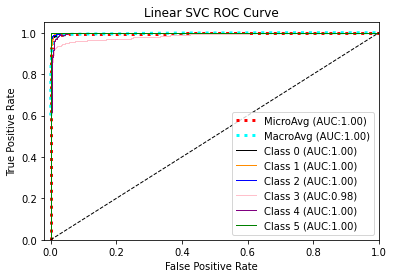

In [ ]:
# Inizializziamo il classifier
lin_svc = OneVsRestClassifier(LinearSVC())
y_score = lin_svc.fit(X_train, y_train_bin).decision_function(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Linear SVC ROC Curve")
plt.legend(loc="lower right")
plt.show() 

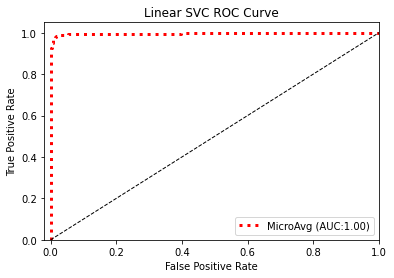

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Linear SVC ROC Curve")
plt.legend(loc="lower right")
plt.show() 

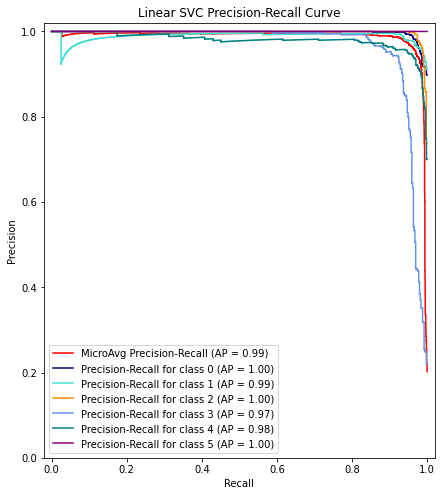

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Linear SVC Precision-Recall Curve")

plt.show()

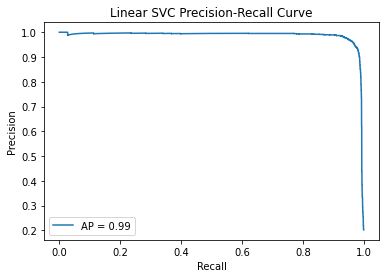

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Linear SVC Precision-Recall Curve")

### **<font color="#34eb89">6.3.2 Non-linear SVM</font>**

Accuracy 0.9443501866304717
F1-score [0.96442688 0.94276795 0.94146949 0.9        0.91328413 1.        ]
              precision    recall  f1-score   support

           1     0.9457    0.9839    0.9644       496
           2     0.9245    0.9618    0.9428       471
           3     0.9869    0.9000    0.9415       420
           4     0.9211    0.8798    0.9000       491
           5     0.8967    0.9305    0.9133       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.9444      2947
   macro avg     0.9458    0.9427    0.9437      2947
weighted avg     0.9452    0.9444    0.9442      2947



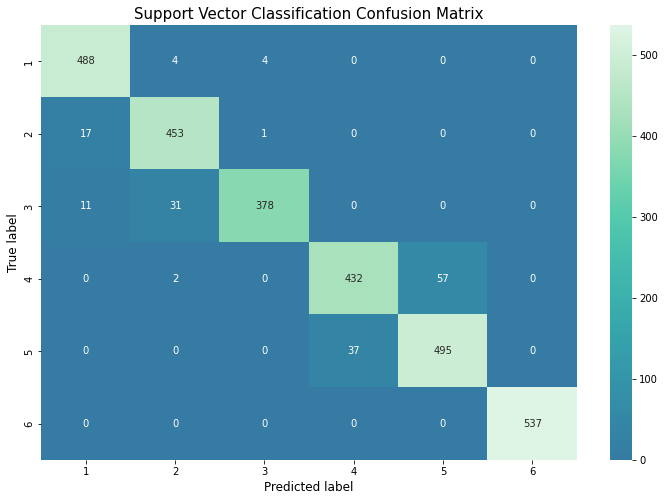

In [ ]:
svc = SVC(C=.5, random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
cm_svc = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_svc, model)

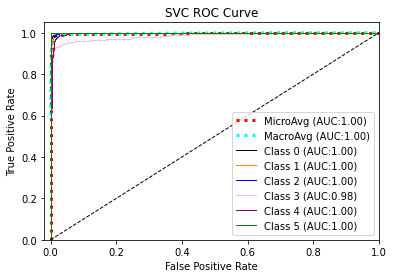

In [ ]:
# Inizializziamo il classifier
svc = OneVsRestClassifier(LinearSVC())
y_score = svc.fit(X_train, y_train_bin).decision_function(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVC ROC Curve")
plt.legend(loc="lower right")
plt.show() 

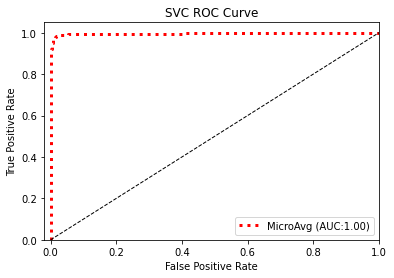

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVC ROC Curve")
plt.legend(loc="lower right")
plt.show() 

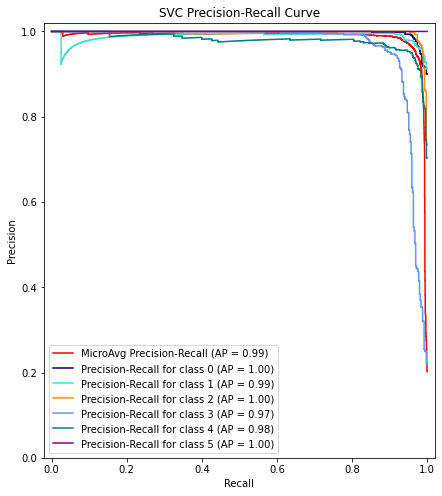

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("SVC Precision-Recall Curve")

plt.show()

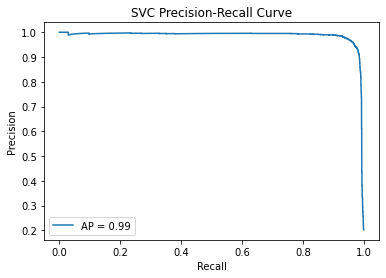

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("SVC Precision-Recall Curve")

## **<font color="#FBBF44">6.4 Neural Networks</font>**

In [ ]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

Accuracy 0.9436715303698676
F1-score [0.96660118 0.93572181 0.95308642 0.91179596 0.9125     0.98295455]
              precision    recall  f1-score   support

           1     0.9425    0.9919    0.9666       496
           2     0.9289    0.9427    0.9357       471
           3     0.9897    0.9190    0.9531       420
           4     0.9533    0.8737    0.9118       491
           5     0.8690    0.9605    0.9125       532
           6     1.0000    0.9665    0.9830       537

    accuracy                         0.9437      2947
   macro avg     0.9473    0.9424    0.9438      2947
weighted avg     0.9461    0.9437    0.9438      2947



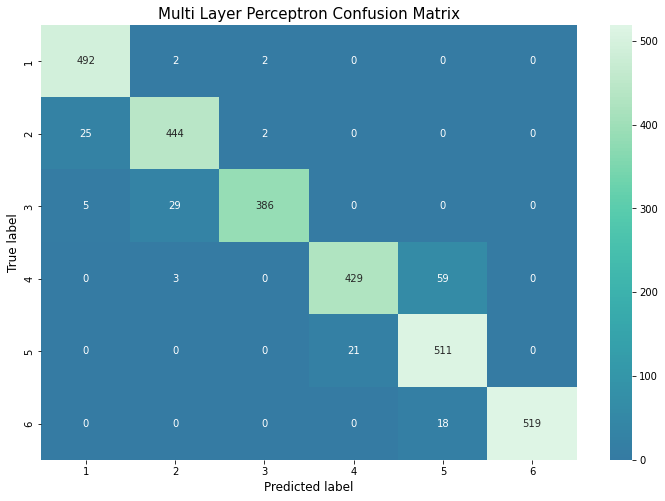

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Multi Layer Perceptron'
cm_mlp = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_mlp, model)

In [ ]:
mlp1 = MLPClassifier().fit(X_train2, y_train2)
mlp2 = MLPClassifier().fit(X_val, y_val)

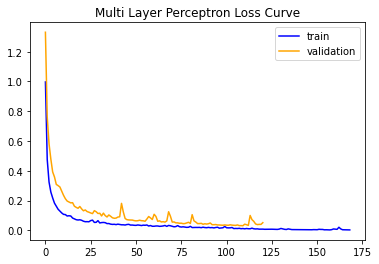

In [ ]:
plt.plot(mlp1.loss_curve_, color = 'blue', label = 'train')
plt.plot(mlp2.loss_curve_, color = 'orange', label = 'validation')
plt.title("Multi Layer Perceptron Loss Curve")
plt.legend(loc="upper right")
plt.savefig('FigXX-MLPLossCurve.png', dpi=600) 
plt.show()

Accuracy 0.9582626399728538
F1-score [0.96660118 0.94680851 0.96829268 0.92719486 0.93958521 0.99906803]
              precision    recall  f1-score   support

           1     0.9425    0.9919    0.9666       496
           2     0.9488    0.9448    0.9468       471
           3     0.9925    0.9452    0.9683       420
           4     0.9774    0.8819    0.9272       491
           5     0.9029    0.9793    0.9396       532
           6     1.0000    0.9981    0.9991       537

    accuracy                         0.9583      2947
   macro avg     0.9607    0.9569    0.9579      2947
weighted avg     0.9598    0.9583    0.9582      2947



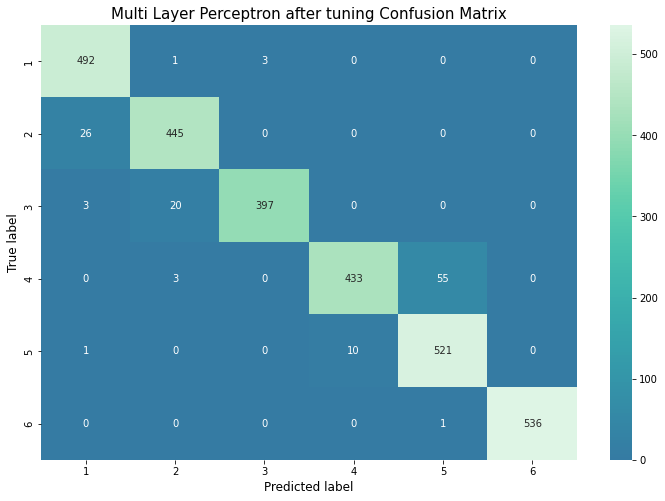

In [ ]:
mlp = MLPClassifier(alpha=0.05, hidden_layer_sizes=(555,), learning_rate='adaptive', max_iter=1000, solver='sgd')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Multi Layer Perceptron after tuning'
cm_mlp = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_mlp, model)

In [ ]:
mlp1 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(555,), learning_rate='adaptive', max_iter=1000, solver='sgd').fit(X_train2, y_train2)
mlp2 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(555,), learning_rate='adaptive', max_iter=1000, solver='sgd').fit(X_val, y_val)

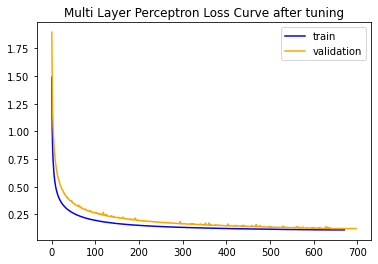

In [ ]:
plt.plot(mlp1.loss_curve_, color = 'blue', label = 'train')
plt.plot(mlp2.loss_curve_, color = 'orange', label = 'validation')
plt.title("Multi Layer Perceptron Loss Curve after tuning")
plt.legend(loc="upper right")
plt.savefig('FigXX-MLPTunedLossCurve.png', dpi=600) 
plt.show()

In [ ]:
mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(555,), learning_rate='adaptive', max_iter=1000, solver='sgd')
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

Accuracy 0.9524940617577197
F1-score [0.96361849 0.94355698 0.95980512 0.91914894 0.93044264 0.99626168]
              precision    recall  f1-score   support

           1     0.9405    0.9879    0.9636       496
           2     0.9466    0.9406    0.9436       471
           3     0.9825    0.9381    0.9598       420
           4     0.9621    0.8798    0.9191       491
           5     0.8957    0.9680    0.9304       532
           6     1.0000    0.9926    0.9963       537

    accuracy                         0.9525      2947
   macro avg     0.9546    0.9512    0.9521      2947
weighted avg     0.9538    0.9525    0.9524      2947



In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "navy", "linestyle": "-"},
    {"c": "orangered", "linestyle": "--"},
    {"c": "darkslategray", "linestyle": "-"},
    {"c": "purple", "linestyle": "--"},
    {"c": "limegreen", "linestyle": "-"},
    {"c": "turquoise", "linestyle": "--"},
    {"c": "gold", "linestyle": "-"},
]

In [ ]:
def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name, fontsize=16)

    X = MinMaxScaler().fit_transform(X)
    mlps = []

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=400, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(figsize=(15, 10))

# load / generate some toydatasets
data_sets = [(X_train, y_train)]

plot_on_dataset(X_train, y_train, axes, name="Multi-layer Perceptron Comparison on Learning Strategies")
plt.xlabel("Iteration")
fig.legend(axes.get_lines(), labels, ncol=3, loc="upper center", fontsize=12)
plt.savefig('FigXX-MLPLearningComparison.png', dpi=600)
plt.show()

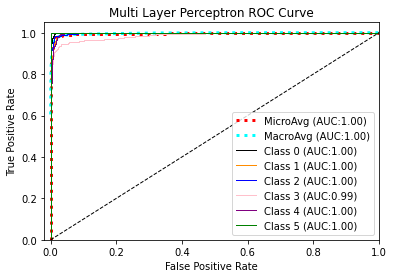

In [ ]:
# Inizializziamo il classifier
mlp = OneVsRestClassifier(MLPClassifier())
y_score = mlp.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi Layer Perceptron ROC Curve")
plt.legend(loc="lower right")
plt.show() 

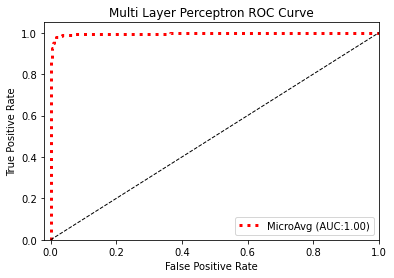

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi Layer Perceptron ROC Curve")
plt.legend(loc="lower right")
plt.show() 

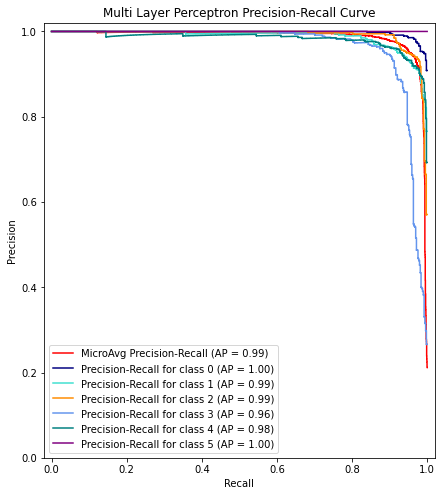

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Multi Layer Perceptron Precision-Recall Curve")

plt.show()

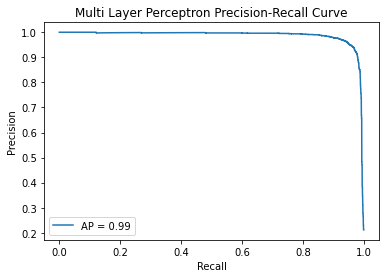

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Multi Layer Perceptron Precision-Recall Curve")

## **<font color="#FBBF44">6.5 Ensemble Methods</font>**

### **<font color="#34eb89">6.5.1 Random Forest</font>**

Accuracy 0.9284017645062775
F1-score [0.93076923 0.89596603 0.9040404  0.90946502 0.91806331 1.        ]
              precision    recall  f1-score   support

           1       0.89      0.98      0.93       496
           2       0.90      0.90      0.90       471
           3       0.96      0.85      0.90       420
           4       0.92      0.90      0.91       491
           5       0.91      0.93      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



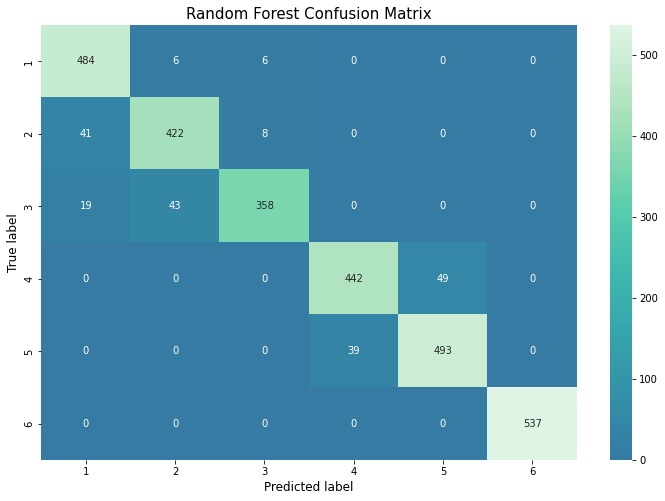

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Random Forest'
cm_rfc = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_rfc, model)

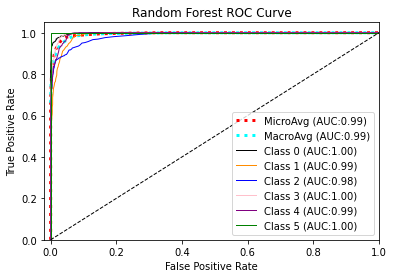

In [ ]:
# Inizializziamo il classifier
rfc = OneVsRestClassifier(RandomForestClassifier())
y_score = rfc.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show() 

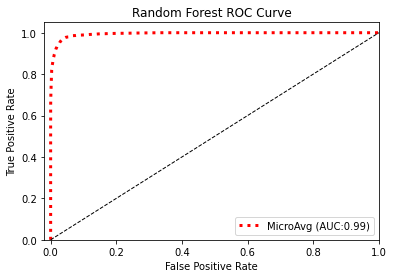

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show() 

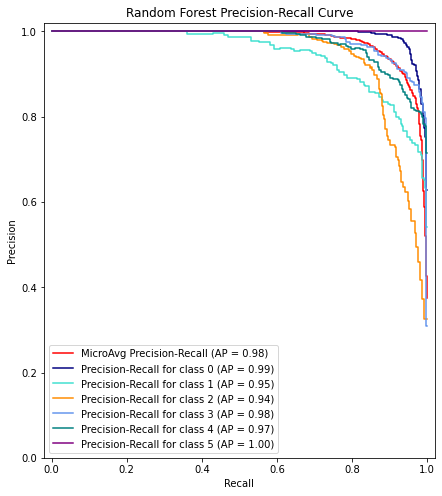

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Random Forest Precision-Recall Curve")

plt.show()

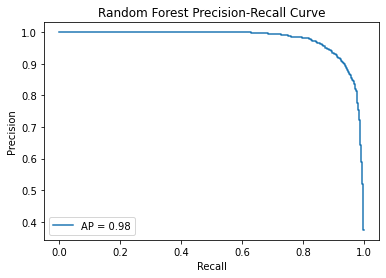

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Random Forest Precision-Recall Curve")

### **<font color="#34eb89">6.5.2 Extra Trees</font>**

Accuracy 0.9412962334577536
F1-score [0.93695441 0.9064143  0.90542245 0.93782929 0.94708029 1.        ]
              precision    recall  f1-score   support

           1       0.90      0.97      0.94       496
           2       0.90      0.92      0.91       471
           3       0.96      0.85      0.91       420
           4       0.97      0.91      0.94       491
           5       0.92      0.98      0.95       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



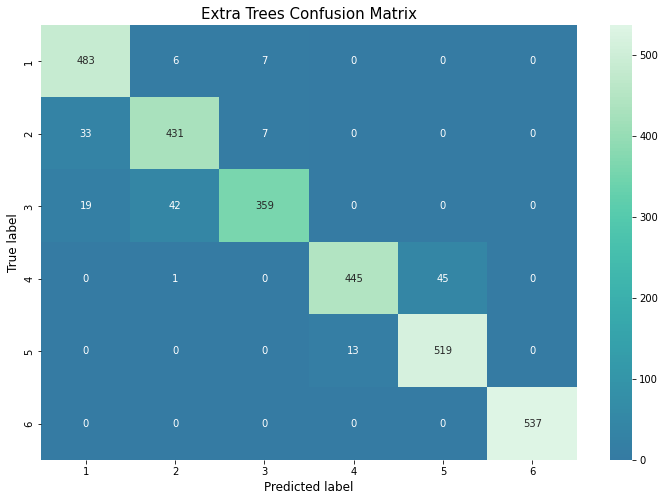

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred = etc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Extra Trees'
cm_etc = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_etc, model)

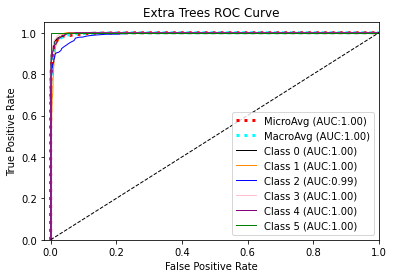

In [ ]:
# Inizializziamo il classifier
etc = OneVsRestClassifier(ExtraTreesClassifier())
y_score = etc.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extra Trees ROC Curve")
plt.legend(loc="lower right")
plt.show() 

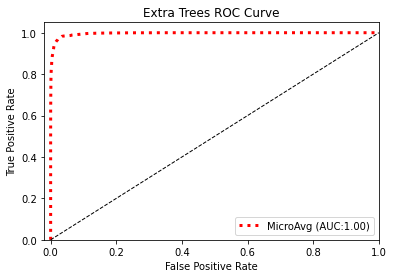

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extra Trees ROC Curve")
plt.legend(loc="lower right")
plt.show() 

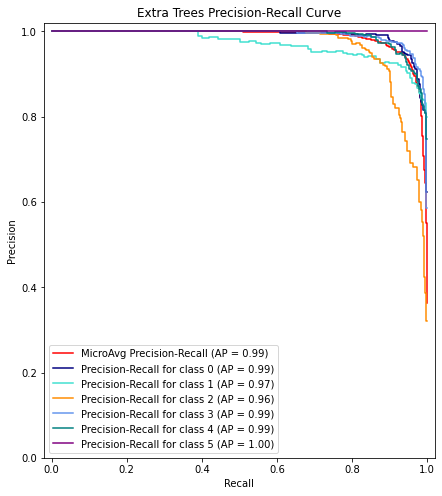

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extra Trees Precision-Recall Curve")

plt.show()

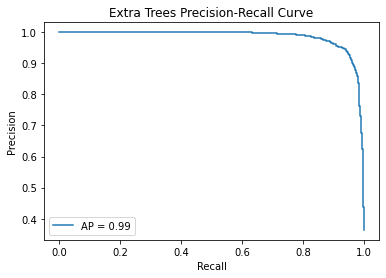

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Extra Trees Precision-Recall Curve")

### **<font color="#34eb89">6.5.4 Bagging</font>**

Accuracy 0.8883610451306413
F1-score [0.90122295 0.83351709 0.89552239 0.83454735 0.85345622 1.        ]
              precision    recall  f1-score   support

           1       0.84      0.97      0.90       496
           2       0.87      0.80      0.83       471
           3       0.94      0.86      0.90       420
           4       0.85      0.82      0.83       491
           5       0.84      0.87      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



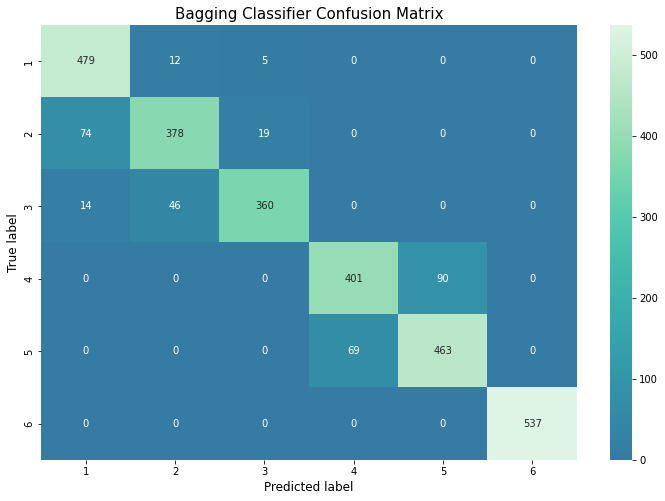

In [ ]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)

y_pred = bag.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Bagging Classifier'
cm_bag = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_bag, model)

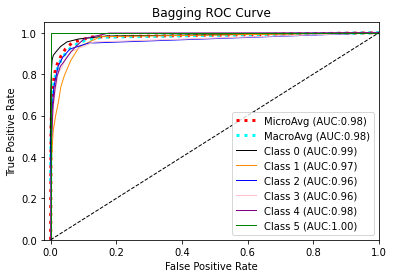

In [ ]:
# Inizializziamo il classifier
bag = OneVsRestClassifier(BaggingClassifier())
y_score = bag.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bagging ROC Curve")
plt.legend(loc="lower right")
plt.show() 

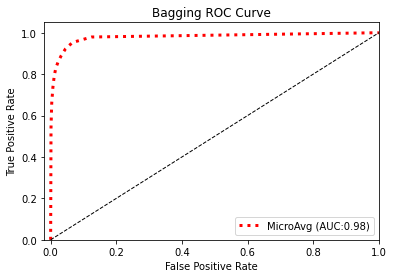

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bagging ROC Curve")
plt.legend(loc="lower right")
plt.show() 

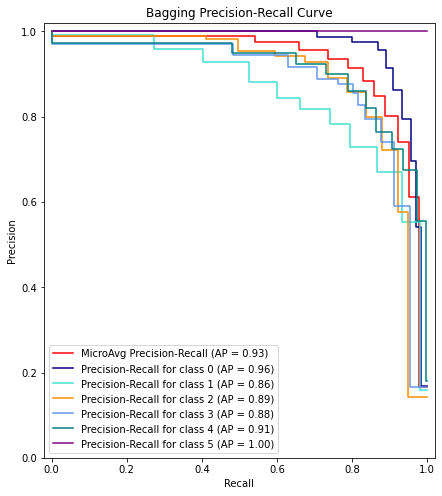

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Bagging Precision-Recall Curve")

plt.show()

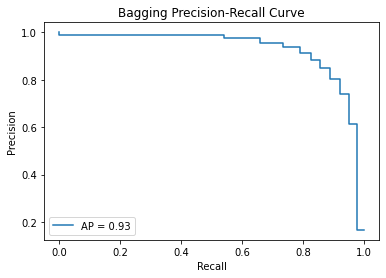

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Bagging Precision-Recall Curve")

### **<font color="#34eb89">6.5.5 GradientBoost</font>**

In [ ]:
# gbc = GradientBoostingClassifier()
# gbc.fit(X_train, y_train)

# y_pred = gbc.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred, digits=4))

# model = 'Gradient Boosting Classifier'
# cm_gbc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_gbc, model)

In [ ]:
# # Inizializziamo il classifier
# gbc = OneVsRestClassifier(GradientBoostingClassifier())
# y_score = gbc.fit(X_train, y_train_bin).predict_proba(X_test)

# # Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
# fpr = {}
# tpr = {}
# roc_auc = {}
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Calcoliamo microaverage
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Mettiamo tutti i FPR insieme 
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plottiamo i ROC curves
# plt.figure()

# # Micro
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
#     color="red",
#     linestyle=":",
#     linewidth=3,
# )

# # Macro
# plt.plot(
#     fpr["macro"],
#     tpr["macro"],
#     label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
#     color="aqua",
#     linestyle=":",
#     linewidth=3,
# )

# # Curve per ogni classe
# colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(
#         fpr[i],
#         tpr[i],
#         color=color,
#         lw=1,
#         label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
#     )

# plt.plot([0, 1], [0, 1], "k--", lw=1)
# plt.xlim([-.02, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("GradientBoosting ROC Curve")
# plt.legend(loc="lower right")
# plt.show() 

In [ ]:
# # Plottiamo i ROC curves
# plt.figure()

# # Micro
# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
#     color="red",
#     linestyle=":",
#     linewidth=3,
# )

# plt.plot([0, 1], [0, 1], "k--", lw=1)
# plt.xlim([-.02, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("GradientBoosting ROC Curve")
# plt.legend(loc="lower right")
# plt.show() 

In [ ]:
# # Precision-Recall Curve
# precision = dict()
# recall = dict()
# average_precision = dict()
# for i in range(n_classes):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
#     average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# # MicroAvg calcola score di tutte le classi
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
# average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

# colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

# _, ax = plt.subplots(figsize=(7, 8))

# display = PrecisionRecallDisplay(
#     recall=recall["micro"],
#     precision=precision["micro"],
#     average_precision=average_precision["micro"],
# )
# display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

# for i, color in zip(range(n_classes), colors):
#     display = PrecisionRecallDisplay(
#         recall=recall[i],
#         precision=precision[i],
#         average_precision=average_precision[i],
#     )
#     display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

# handles, labels = display.ax_.get_legend_handles_labels()
# ax.set_xlim([-.02, 1.02])
# ax.set_ylim([0.0, 1.02])
# ax.legend(handles=handles, labels=labels, loc="best")
# ax.set_title("GradientBoosting Precision-Recall Curve")

# plt.show()

In [ ]:
# # MicroAvg
# display = PrecisionRecallDisplay(
#     recall=recall["micro"],
#     precision=precision["micro"],
#     average_precision=average_precision["micro"],
# )
# display.plot()
# _ = display.ax_.set_title("GradientBoosting Precision-Recall Curve")

### **<font color="#34eb89">6.5.6 XGBoost</font>**

Accuracy 0.9395995928062436
F1-score [0.95968535 0.93107105 0.94117647 0.89194915 0.90909091 1.        ]
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.93      0.93      0.93       471
           3       0.97      0.91      0.94       420
           4       0.93      0.86      0.89       491
           5       0.88      0.94      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



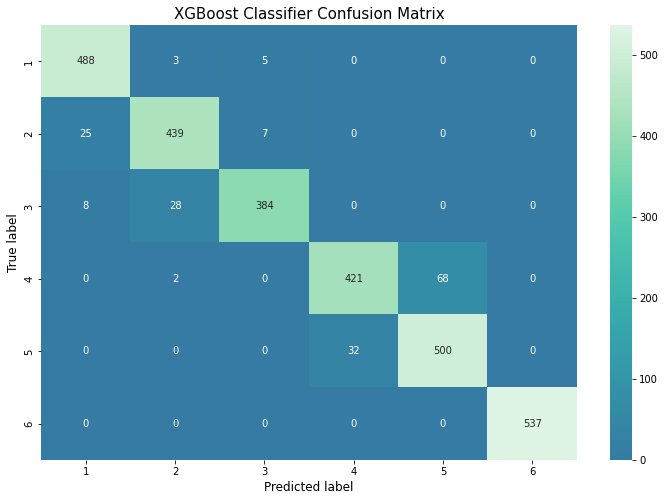

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'XGBoost Classifier'
cm_xgb = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_xgb, model)

Accuracy 0.9555480149304377
F1-score [0.96157635 0.94017094 0.96727273 0.9251844  0.9369863  1.        ]
              precision    recall  f1-score   support

           1     0.9403    0.9839    0.9616       496
           2     0.9462    0.9342    0.9402       471
           3     0.9852    0.9500    0.9673       420
           4     0.9585    0.8941    0.9252       491
           5     0.9112    0.9643    0.9370       532
           6     1.0000    1.0000    1.0000       537

    accuracy                         0.9555      2947
   macro avg     0.9569    0.9544    0.9552      2947
weighted avg     0.9563    0.9555    0.9555      2947



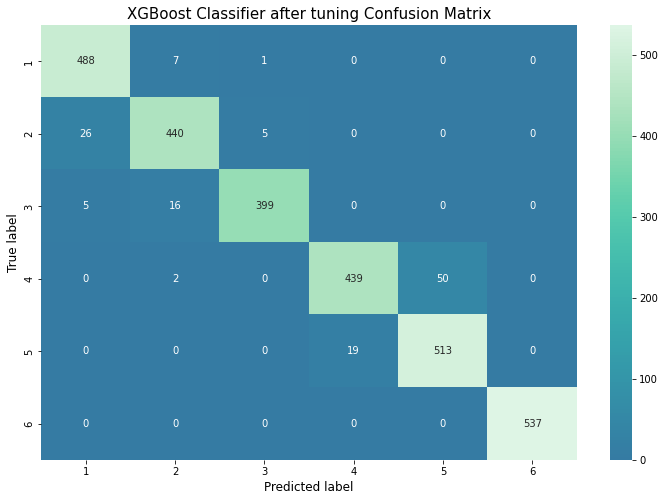

In [ ]:
xgb = XGBClassifier(base_score=0.5, learning_rate=0.25, max_depth=2,
              n_estimators=300, objective='multi:softprob',
              tree_method='exact', random_state=0)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'XGBoost Classifier after tuning'
cm_xgb = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_xgb, model)

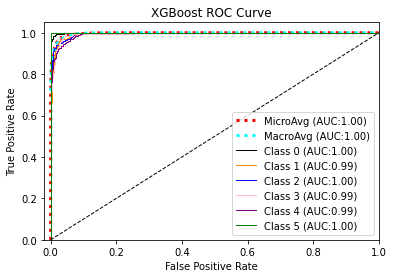

In [ ]:
# Inizializziamo il classifier
xgb = OneVsRestClassifier(XGBClassifier())
y_score = xgb.fit(X_train, y_train_bin).predict_proba(X_test)

# Calcoliamo FalsePositiveRate e TruePositiveRate per ogni classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcoliamo microaverage
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Mettiamo tutti i FPR insieme 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

# Macro
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="MacroAvg (AUC:{0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=3,
)

# Curve per ogni classe
colors = cycle(["black", "darkorange", "blue", "pink", "purple", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="Class {0} (AUC:{1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.show() 

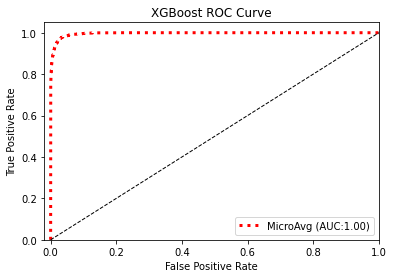

In [ ]:
# Plottiamo i ROC curves
plt.figure()

# Micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="MicroAvg (AUC:{0:0.2f})".format(roc_auc["micro"]),
    color="red",
    linestyle=":",
    linewidth=3,
)

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([-.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.show() 

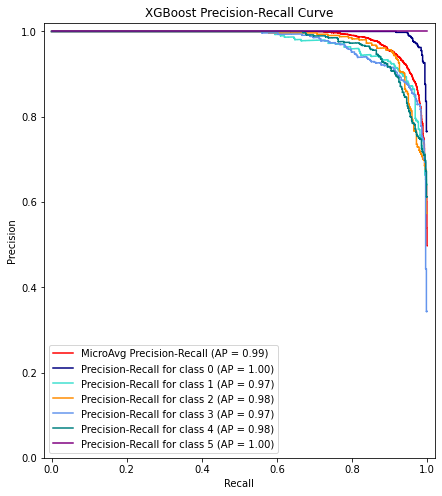

In [ ]:
# Precision-Recall Curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# MicroAvg calcola score di tutte le classi
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "purple"])

_, ax = plt.subplots(figsize=(7, 8))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="MicroAvg Precision-Recall", color="red")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-Recall for class {i}", color=color)

handles, labels = display.ax_.get_legend_handles_labels()
ax.set_xlim([-.02, 1.02])
ax.set_ylim([0.0, 1.02])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("XGBoost Precision-Recall Curve")

plt.show()

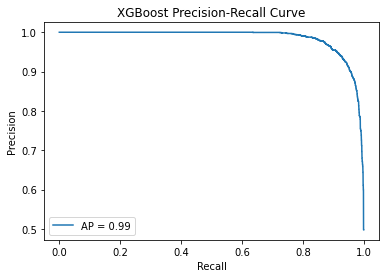

In [ ]:
# MicroAvg
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("XGBoost Precision-Recall Curve")

# **<font color="#42f5f5">7.0 REGRESSION TASK</font>**

## **<font color="#FBBF44">7.1 Simple Linear Regression</font>**

R2: 0.999
MSE: 0.001
MAE: 0.022


Actual value  Predicted value
0        -0.672172        -0.655415
1        -1.000000        -0.972981
2        -0.939120        -0.914007
3        -1.000000        -0.972981
4        -0.939120        -0.914007
...            ...              ...
2942      0.277066         0.264108
2943      0.394316         0.377686
2944      0.351133         0.335856
2945      0.182878         0.172868
2946      0.151049         0.142035

[2947 rows x 2 columns]

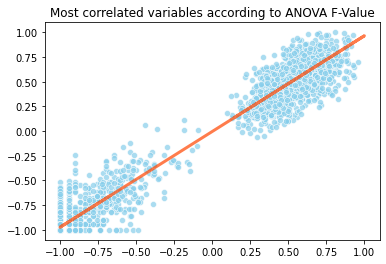

In [ ]:
reg = LinearRegression()
reg.fit(X_train[:,366].reshape(-1, 1), X_train[:,367].reshape(-1, 1))
y_pred = reg.predict(X_test[:,367].reshape(-1, 1)).reshape(1,-1)[0]

plt.scatter(X_test[:,366], X_test[:,367], color='skyblue',edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(X_test[:,367], y_pred, color='orangered', linewidth=3, alpha = .7)
plt.title('Most correlated variables according to ANOVA F-Value')
plt.savefig('FigXX-LinearRegression1.png', dpi=600) 

print('R2: %.3f' % r2_score(X_test[:,367], y_pred))
print('MSE: %.3f' % mean_squared_error(X_test[:,367], y_pred))
print('MAE: %.3f' % mean_absolute_error(X_test[:,367], y_pred))

reg_diff = pd.DataFrame({'Actual value': X_test[:,367], 'Predicted value': y_pred})
reg_diff

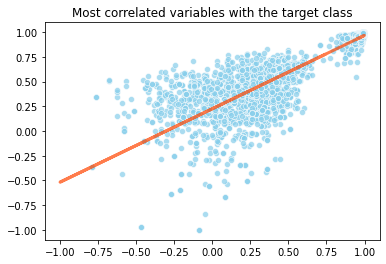

R2: 0.914
MSE: 0.011
MAE: 0.078


Actual value  Predicted value
0         0.950182         0.930607
1         0.967738         0.943640
2         0.976349         0.950032
3         0.976349         0.950032
4         0.980249         0.952928
...            ...              ...
2942      0.559913         0.640896
2943      0.310968         0.456094
2944      0.310968         0.456094
2945      0.617772         0.683847
2946      0.736858         0.772249

[2947 rows x 2 columns]

In [ ]:
reg = LinearRegression()
reg.fit(X_train[:,92].reshape(-1, 1), X_train[:,93].reshape(-1, 1))
y_pred = reg.predict(X_test[:,93].reshape(-1, 1)).reshape(1,-1)[0]

plt.scatter(X_test[:,92], X_test[:,93], color='skyblue',edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(X_test[:,93], y_pred, color='orangered', linewidth=3, alpha = .7)
plt.title('Most correlated variables with the target class')
plt.savefig('FigXX-LinearRegression2.png', dpi=600) 
plt.show()

print('R2: %.3f' % r2_score(X_test[:,93], y_pred))
print('MSE: %.3f' % mean_squared_error(X_test[:,93], y_pred))
print('MAE: %.3f' % mean_absolute_error(X_test[:,93], y_pred))

reg_diff = pd.DataFrame({'Actual value': X_test[:,93], 'Predicted value': y_pred})
reg_diff

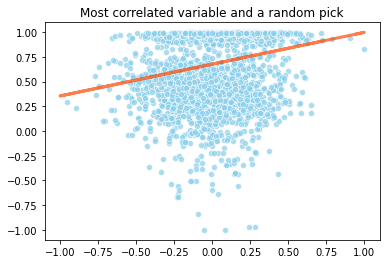

R2: 0.178
MSE: 0.108
MAE: 0.218


Actual value  Predicted value
0         0.950182         0.982209
1         0.967738         0.987860
2         0.976349         0.990631
3         0.976349         0.990631
4         0.980249         0.991886
...            ...              ...
2942      0.559913         0.856606
2943      0.310968         0.776486
2944      0.310968         0.776486
2945      0.617772         0.875227
2946      0.736858         0.913554

[2947 rows x 2 columns]

In [ ]:
reg = LinearRegression()
reg.fit(X_train[:,35].reshape(-1, 1), X_train[:,93].reshape(-1, 1))
y_pred = reg.predict(X_test[:,93].reshape(-1, 1)).reshape(1,-1)[0]

plt.scatter(X_test[:,35], X_test[:,93], color='skyblue',edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(X_test[:,93], y_pred, color='orangered', linewidth=3, alpha = .7)
plt.title('Most correlated variable and a random pick')
plt.savefig('FigXX-LinearRegression3.png', dpi=600) 
plt.show()

print('R2: %.3f' % r2_score(X_test[:,93], y_pred))
print('MSE: %.3f' % mean_squared_error(X_test[:,93], y_pred))
print('MAE: %.3f' % mean_absolute_error(X_test[:,93], y_pred))

reg_diff = pd.DataFrame({'Actual value': X_test[:,93], 'Predicted value': y_pred})
reg_diff

## **<font color="#FBBF44">7.2 Multiple Linear Regression</font>**


In [ ]:
normalized_df = (data-data.min())/(data.max()-data.min())
normalized_df_test = (data_test-data_test.min())/(data_test.max()-data_test.min())

X = normalized_df.iloc[:,0:561]
y = y_label

Xtest = normalized_df_test.iloc[:,0:561]
ytest = y_label_test

sel_uni = SelectKBest(score_func=chi2, k=35)
X_train_sel_uni = sel_uni.fit(X,y)

dfscores = pd.DataFrame(X_train_sel_uni.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

print(featureScores.nlargest(35,'Score')) 

X_test_sel_uni = sel_uni.fit_transform(Xtest,ytest)

                                  Feature        Score
366        367 fBodyAccJerk-entropy()-X\n  2769.376594
367        368 fBodyAccJerk-entropy()-Y\n  2615.230651
523   524 fBodyBodyAccJerkMag-entropy()\n  2381.916974
287            288 fBodyAcc-entropy()-X\n  2302.615261
368        369 fBodyAccJerk-entropy()-Z\n  2250.412677
234       235 tBodyAccJerkMag-entropy()\n  1975.810367
288            289 fBodyAcc-entropy()-Y\n  1952.410601
510           511 fBodyAccMag-entropy()\n  1944.189813
9                   10 tBodyAcc-max()-X\n  1912.439303
549  550 fBodyBodyGyroJerkMag-entropy()\n  1816.530082
271                272 fBodyAcc-mad()-X\n  1798.868827
57            58 tGravityAcc-energy()-Y\n  1792.692770
345           346 fBodyAccJerk-mean()-Y\n  1782.126191
268                269 fBodyAcc-std()-X\n  1770.779184
4                    5 tBodyAcc-std()-Y\n  1766.820082
272                273 fBodyAcc-mad()-Y\n  1761.365455
280                  281 fBodyAcc-sma()\n  1753.535868
558       

In [ ]:
bestk = featureScores.nlargest(34,'Score')

data.columns=feature_list
data_test.columns=feature_list 
data_reg = data.copy()
data_reg_test = data_test.copy()

data_reg = data_reg[bestk['Feature']]
data_reg_test = data_reg_test[bestk['Feature']]

X_train_reg = data_reg.values
X_test_reg = data_reg_test.values

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[list(data.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF                               Column
472       inf   473 fBodyGyro-bandsEnergy()-1,24\n
546       inf     547 fBodyBodyGyroJerkMag-sma()\n
216       inf           217 tGravityAccMag-max()\n
476       inf  477 fBodyGyro-bandsEnergy()-17,24\n
239       inf            240 tBodyGyroMag-mean()\n
..        ...                                  ...
158  1.918277    159 tBodyGyro-correlation()-X,Z\n
82   1.734037           83 tBodyAccJerk-mean()-Z\n
162  1.703100         163 tBodyGyroJerk-mean()-Z\n
81   1.666808           82 tBodyAccJerk-mean()-Y\n
161  1.651190         162 tBodyGyroJerk-mean()-Y\n

[559 rows x 2 columns]

In [ ]:
vif_infinito = vif_info.loc[vif_info['VIF'] != np.inf]
vif_cols = vif_infinito.loc[vif_infinito['VIF'] < 10 ]
print(len(vif_cols))
vif_cols.sort_values('VIF', ascending=False)

38


VIF                                      Column
55   9.766303                      56 tGravityAcc-sma()\n
144  8.094958                 145 tBodyGyro-entropy()-Z\n
294  8.094176                 295 fBodyAcc-meanFreq()-Y\n
369  8.061566                370 fBodyAccJerk-maxInds-X\n
121  7.571535                    122 tBodyGyro-mean()-Y\n
451  7.571183                452 fBodyGyro-meanFreq()-X\n
142  7.274691                 143 tBodyGyro-entropy()-X\n
453  7.071967                454 fBodyGyro-meanFreq()-Z\n
370  6.957710                371 fBodyAccJerk-maxInds-Y\n
122  6.373310                    123 tBodyGyro-mean()-Z\n
143  5.806054                 144 tBodyGyro-entropy()-Y\n
371  4.924805                372 fBodyAccJerk-maxInds-Z\n
38   3.884648             39 tBodyAcc-correlation()-X,Z\n
39   3.816913             40 tBodyAcc-correlation()-Y,Z\n
37   3.720211             38 tBodyAcc-correlation()-X,Y\n
1    3.671256                       2 tBodyAcc-mean()-Y\n
80   3.625589                  81 tBodyAccJerk-mean()-X\n
160  3.602318                161 tBodyGyroJerk-mean()-X\n
117  3.255533        118 tBodyAccJerk-correlation()-X,Y\n
159  2.944089           160 tBodyGyro-correlation()-Y,Z\n
199  2.884366       200 tBodyGyroJerk-correlation()-Y,Z\n
119  2.825601        120 tBodyAccJerk-correlation()-Y,Z\n
157  2.729603           158 tBodyGyro-correlation()-X,Y\n
556  2.722247      557 angle(tBodyGyroMean,gravityMean)\n
555  2.717447  556 angle(tBodyAccJerkMean),gravityMean)\n
118  2.708397        119 tBodyAccJerk-correlation()-X,Z\n
554  2.366659           555 angle(tBodyAccMean,gravity)\n
197  2.366039       198 tBodyGyroJerk-correlation()-X,Y\n
198  2.151142       199 tBodyGyroJerk-correlation()-X,Z\n
77   2.069740          78 tGravityAcc-correlation()-X,Y\n
79   2.059699          80 tGravityAcc-correlation()-Y,Z\n
78   2.058421          79 tGravityAcc-correlation()-X,Z\n
557  2.009631  558 angle(tBodyGyroJerkMean,gravityMean)\n
158  1.918277           159 tBodyGyro-correlation()-X,Z\n
82   1.734037                  83 tBodyAccJerk-mean()-Z\n
162  1.703100                163 tBodyGyroJerk-mean()-Z\n
81   1.666808                  82 tBodyAccJerk-mean()-Y\n
161  1.651190                162 tBodyGyroJerk-mean()-Y\n

In [ ]:
data.columns=feature_list
data_test.columns=feature_list 

data_reg_vif = data.copy()
data_reg_test_vif = data_test.copy()

data_reg_vif = data_reg_vif[vif_cols['Column']]
data_reg_test_vif = data_reg_test_vif[vif_cols['Column']]

X_train_reg2 = data_reg_vif.values
X_test_reg2 = data_reg_test_vif.values

**<font color="#34eb89">Regular</font>**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg2, y_train)
y_pred = lin_reg.predict(X_test_reg2)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.604
MSE: 1.198
MAE: 0.870


Actual value  Predicted value
0                5         4.417059
1                5         4.251375
2                5         4.977149
3                5         4.764957
4                5         5.486650
...            ...              ...
2942             2         2.043645
2943             2         2.064054
2944             2         2.259742
2945             2         2.862248
2946             2         3.279962

[2947 rows x 2 columns]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.947
MSE: 0.162
MAE: 0.285


Actual value  Predicted value
0                5         5.419831
1                5         4.723633
2                5         4.806443
3                5         4.889473
4                5         4.931322
...            ...              ...
2942             2         2.153118
2943             2         1.820638
2944             2         1.759262
2945             2         1.861569
2946             2         1.827409

[2947 rows x 2 columns]

**<font color="#34eb89">Ridge</font>**

In [ ]:
lin_reg_ridge = Ridge()
lin_reg_ridge.fit(X_train, y_train)
y_pred = lin_reg_ridge.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.948
MSE: 0.157
MAE: 0.286


Actual value  Predicted value
0                5         5.372734
1                5         4.800069
2                5         4.896048
3                5         4.937336
4                5         4.953474
...            ...              ...
2942             2         2.203611
2943             2         1.833961
2944             2         1.687400
2945             2         1.923598
2946             2         1.875794

[2947 rows x 2 columns]

**<font color="#34eb89">Lasso</font>**

In [ ]:
lin_reg_lasso = Lasso()
lin_reg_lasso.fit(X_train_pca, y_train)
y_pred = lin_reg_lasso.predict(X_test_pca)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.666
MSE: 1.011
MAE: 0.885


Actual value  Predicted value
0                5         4.216165
1                5         4.566768
2                5         4.706220
3                5         4.730635
4                5         4.714245
...            ...              ...
2942             2         2.695246
2943             2         2.572129
2944             2         2.672107
2945             2         2.840761
2946             2         2.792199

[2947 rows x 2 columns]

**<font color="#34eb89">GradientBoosting</font>**

Accuracy 0.9161859518154055
F1-score [0.97211155 0.94659686 0.94233129 0.85119667 0.90569395 0.88502415]
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       496
           2       0.93      0.96      0.95       471
           3       0.97      0.91      0.94       420
           4       0.87      0.83      0.85       491
           5       0.86      0.96      0.91       532
           6       0.92      0.85      0.89       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



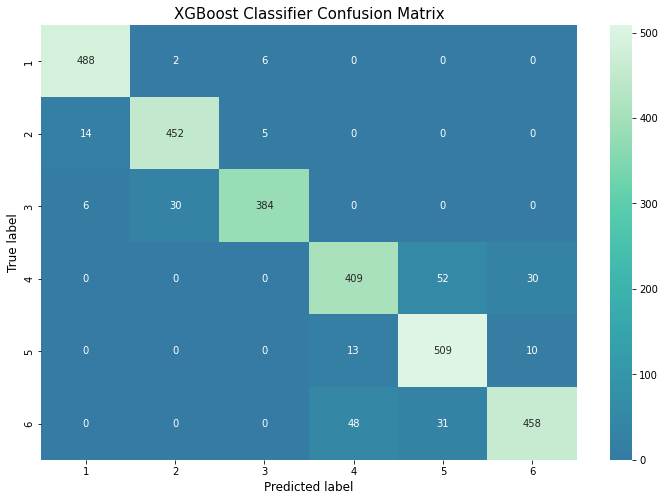

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_reg2, y_train)

y_pred = xgb.predict(X_test_reg2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'XGBoost Classifier'
cm_xgb = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_xgb, model)

**Gradient Boosting Regressor**

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_reg2, y_train)

y_pred = gbr.predict(X_test_reg2)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.817
MSE: 0.553
MAE: 0.571


# **<font color="#42f5f5">8.0 TIME SERIES ANALYSIS</font>**

## **<font color="#FBBF44">8.x Preprocessing</font>**

In [ ]:
data_ts0=pd.read_csv('/content/local_data/train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True) 
data_ts1=pd.read_csv('/content/local_data/train/Inertial Signals/body_acc_y_train.txt', header=None, delim_whitespace=True)
data_ts2=pd.read_csv('/content/local_data/train/Inertial Signals/body_acc_z_train.txt', header=None, delim_whitespace=True) 
data_ts3=pd.read_csv('/content/local_data/train/Inertial Signals/body_gyro_x_train.txt', header=None, delim_whitespace=True) 
data_ts4=pd.read_csv('/content/local_data/train/Inertial Signals/body_gyro_y_train.txt', header=None, delim_whitespace=True) 
data_ts5=pd.read_csv('/content/local_data/train/Inertial Signals/body_gyro_z_train.txt', header=None, delim_whitespace=True) 
data_ts6=pd.read_csv('/content/local_data/train/Inertial Signals/total_acc_x_train.txt', header=None, delim_whitespace=True) 
data_ts7=pd.read_csv('/content/local_data/train/Inertial Signals/total_acc_y_train.txt', header=None, delim_whitespace=True) 
data_ts8=pd.read_csv('/content/local_data/train/Inertial Signals/total_acc_z_train.txt', header=None, delim_whitespace=True) 

data_test_ts0=pd.read_csv('/content/local_data/test/Inertial Signals/body_acc_x_test.txt', header=None, delim_whitespace=True) 
data_test_ts1=pd.read_csv('/content/local_data/test/Inertial Signals/body_acc_y_test.txt', header=None, delim_whitespace=True)
data_test_ts2=pd.read_csv('/content/local_data/test/Inertial Signals/body_acc_z_test.txt', header=None, delim_whitespace=True) 
data_test_ts3=pd.read_csv('/content/local_data/test/Inertial Signals/body_gyro_x_test.txt', header=None, delim_whitespace=True) 
data_test_ts4=pd.read_csv('/content/local_data/test/Inertial Signals/body_gyro_y_test.txt', header=None, delim_whitespace=True) 
data_test_ts5=pd.read_csv('/content/local_data/test/Inertial Signals/body_gyro_z_test.txt', header=None, delim_whitespace=True) 
data_test_ts6=pd.read_csv('/content/local_data/test/Inertial Signals/total_acc_x_test.txt', header=None, delim_whitespace=True) 
data_test_ts7=pd.read_csv('/content/local_data/test/Inertial Signals/total_acc_y_test.txt', header=None, delim_whitespace=True) 
data_test_ts8=pd.read_csv('/content/local_data/test/Inertial Signals/total_acc_z_test.txt', header=None, delim_whitespace=True) 

In [ ]:
ts_dict=[data_ts0.std(), data_ts1.std(), data_ts2.std(), data_ts3.std(), data_ts4.std(), data_ts5.std(), data_ts6.std(), data_ts7.std(), data_ts8.std()]

In [ ]:
std_data_ts0=data_ts0.std()
std_data_ts1=data_ts1.std()
std_data_ts2=data_ts2.std()
std_data_ts3=data_ts3.std()
std_data_ts4=data_ts4.std()
std_data_ts5=data_ts5.std()
std_data_ts6=data_ts6.std()
std_data_ts7=data_ts7.std()
std_data_ts8=data_ts8.std()

In [ ]:
print("standard deviation of: data_ts: " ,std_data_ts0.mean())
print("standard deviation of: data_ts1: " ,std_data_ts1.mean())
print("standard deviation of: data_ts2: " ,std_data_ts2.mean())
print("standard deviation of: data_ts3: " ,std_data_ts3.mean())
print("standard deviation of: data_ts4: " ,std_data_ts4.mean())
print("standard deviation of: data_ts5: " ,std_data_ts5.mean())
print("standard deviation of: data_ts6: " ,std_data_ts6.mean())
print("standard deviation of: data_ts7: " ,std_data_ts7.mean())
print("standard deviation of: data_ts8: " ,std_data_ts8.mean())

standard deviation of: data_ts:  0.1948289266974915
standard deviation of: data_ts1:  0.12240050717841239
standard deviation of: data_ts2:  0.10680715788956446
standard deviation of: data_ts3:  0.4067296422795278
standard deviation of: data_ts4:  0.381758734170573
standard deviation of: data_ts5:  0.25570864936282
standard deviation of: data_ts6:  0.4141304702707869
standard deviation of: data_ts7:  0.39101528443124994
standard deviation of: data_ts8:  0.3577835591245765


In [ ]:
data_ts6

0         1         2         3         4         5         6    \
0     1.012817  1.022833  1.022028  1.017877  1.023680  1.016974  1.017746   
1     1.018851  1.022380  1.020781  1.020218  1.021344  1.020522  1.019790   
2     1.023127  1.021882  1.019178  1.015861  1.012893  1.016451  1.020331   
3     1.017682  1.018149  1.019854  1.019880  1.019121  1.020479  1.020595   
4     1.019952  1.019616  1.020933  1.023061  1.022242  1.020867  1.021939   
...        ...       ...       ...       ...       ...       ...       ...   
7347  1.374753  1.604501  1.759656  1.572037  1.202413  0.958087  0.814209   
7348  1.713028  1.709944  1.321608  0.970870  0.791258  0.806160  0.931817   
7349  0.754892  0.804314  0.831714  0.850725  0.914926  0.991363  1.080123   
7350  0.927927  0.912987  0.924660  0.954527  0.964228  1.011060  1.070035   
7351  0.798091  0.819242  0.865882  0.885339  0.872735  0.919963  0.991814   

           7         8         9    ...       118       119       120  \
0     1.019263  1.016417  1.020745  ...  1.020981  1.018065  1.019638   
1     1.019216  1.018307  1.017996  ...  1.019291  1.019258  1.020736   
2     1.020266  1.021759  1.018649  ...  1.020304  1.021516  1.019417   
3     1.016340  1.010611  1.009013  ...  1.021295  1.022934  1.022183   
4     1.022300  1.022302  1.022254  ...  1.022687  1.023670  1.019899   
...        ...       ...       ...  ...       ...       ...       ...   
7347  0.766668  0.848179  1.019196  ...  0.746457  0.728023  0.748200   
7348  0.955901  1.055893  1.104281  ...  0.674550  0.670934  0.713923   
7349  1.189563  1.425107  1.646699  ...  0.807177  0.736686  0.672145   
7350  1.245714  1.499556  1.575337  ...  0.743487  0.654212  0.589173   
7351  1.171704  1.510587  1.694786  ...  1.404655  1.277374  1.107002   

           121       122       123       124       125       126       127  
0     1.020017  1.018766  1.019815  1.019290  1.018445  1.019372  1.021171  
1     1.020950  1.020491  1.018685  1.015660  1.014788  1.016499  1.017849  
2     1.019312  1.019448  1.019434  1.019916  1.021041  1.022935  1.022019  
3     1.021637  1.020598  1.018887  1.019161  1.019916  1.019602  1.020735  
4     1.017381  1.020389  1.023884  1.021753  1.019425  1.018896  1.016787  
...        ...       ...       ...       ...       ...       ...       ...  
7347  0.765749  0.798177  0.836157  0.847159  0.825709  0.803503  0.769958  
7348  0.662663  0.610054  0.607774  0.619825  0.696206  0.788222  0.867896  
7349  0.619913  0.592795  0.641516  0.669835  0.695626  0.747910  0.776768  
7350  0.573030  0.608761  0.632124  0.671960  0.675347  0.660338  0.719353  
7351  0.977801  0.992174  0.991497  0.945067  0.898095  0.828372  0.800243  

[7352 rows x 128 columns]

In [ ]:
full_ts = pd.concat([data_ts0,data_ts1,data_ts2,data_ts3,data_ts4,data_ts5,data_ts6,data_ts7,data_ts8],axis=0)
full_ts

full_test_ts = pd.concat([data_test_ts0,data_test_ts1,data_test_ts2,data_test_ts3,data_test_ts4,data_test_ts5,data_test_ts6,data_test_ts7,data_test_ts8],axis=0)
full_test_ts

print(full_ts.shape)

print(full_test_ts.shape)

full_ts

(66168, 128)
(26523, 128)


0         1         2         3         4         5         6    \
0     0.000181  0.010139  0.009276  0.005066  0.010810  0.004045  0.004757   
1     0.001094  0.004550  0.002879  0.002247  0.003305  0.002416  0.001619   
2     0.003531  0.002285 -0.000420 -0.003738 -0.006706 -0.003148  0.000733   
3    -0.001772 -0.001311  0.000388  0.000408 -0.000355  0.000998  0.001109   
4     0.000087 -0.000272  0.001022  0.003126  0.002284  0.000885  0.001933   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.309481  0.221350  0.164826  0.159053  0.112532  0.029263  0.074362   
7348  0.209530  0.202381  0.223397  0.211685  0.205776  0.162612 -0.014738   
7349  0.174587  0.232424  0.257607  0.294643  0.351963  0.385571  0.401494   
7350  0.262814  0.295415  0.337610  0.381587  0.422382  0.461329  0.472818   
7351  0.209387  0.231071  0.334191  0.352314  0.345633  0.387375  0.359598   

           7         8         9    ...       118       119       120  \
0     0.006214  0.003307  0.007572  ...  0.001412 -0.001509  0.000060   
1     0.000981  0.000009 -0.000363  ... -0.000104 -0.000141  0.001333   
2     0.000668  0.002162 -0.000946  ...  0.000661  0.001853 -0.000268   
3    -0.003149 -0.008882 -0.010483  ...  0.000458  0.002103  0.001358   
4     0.002270  0.002247  0.002175  ...  0.002529  0.003518 -0.000248   
...        ...       ...       ...  ...       ...       ...       ...   
7347  0.109313 -0.013274 -0.125855  ... -0.115192 -0.086700 -0.101805   
7348 -0.197076 -0.218078 -0.173084  ...  0.028204  0.045156  0.058035   
7349  0.352319  0.277078  0.241403  ... -0.117974 -0.080109 -0.015432   
7350  0.415633  0.353679  0.340979  ... -0.032441 -0.001154  0.028541   
7351  0.300082  0.237625  0.200746  ... -0.429072 -0.392275 -0.344507   

           121       122       123       124       125       126       127  
0     0.000435 -0.000819  0.000228 -0.000300 -0.001147 -0.000222  0.001576  
1     0.001541  0.001077 -0.000736 -0.003767 -0.004646 -0.002941 -0.001599  
2    -0.000394 -0.000279 -0.000316  0.000144  0.001246  0.003117  0.002178  
3     0.000820 -0.000212 -0.001915 -0.001631 -0.000867 -0.001172 -0.000028  
4    -0.002761  0.000252  0.003752  0.001626 -0.000698 -0.001223 -0.003328  
...        ...       ...       ...       ...       ...       ...       ...  
7347 -0.095273 -0.029541  0.026907  0.069472  0.086288  0.099188  0.129060  
7348  0.064945  0.089264  0.108987  0.150238  0.199324  0.236369  0.253029  
7349  0.031859  0.072452  0.065696  0.079038  0.111295  0.126302  0.188621  
7350  0.052355  0.040251  0.060450  0.108725  0.128925  0.172251  0.210071  
7351 -0.281695 -0.223023 -0.205803 -0.180733 -0.156105 -0.122798 -0.083572  

[66168 rows x 128 columns]

In [ ]:
y1 = y2 = y3 = y4 = y5 = y6 = y7 = y8 = y9 = y_train 
yt1 = yt2 = yt3 = yt4 = yt5 = yt6 = yt7 = yt8 = yt9 = y_test 

y_fulltrain = np.concatenate((y1, y2, y3, y4, y5, y6, y7, y8, y9))
y_fulltest = np.concatenate((yt1, yt2, yt3, yt4, yt5, yt6, yt7, yt8, yt9))

print(y_fulltrain.shape)
print(y_fulltest.shape)

(66168,)
(26523,)


In [ ]:
# Calcoliamo i features

def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    return features

In [ ]:
data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())

data_ts.shape
data_ts

0         1         2         3         4         5         6    \
0     0.565120  0.575051  0.573779  0.584145  0.568561  0.577796  0.563050   
1     0.567524  0.574868  0.573278  0.585105  0.567632  0.579235  0.563857   
2     0.569228  0.574667  0.572635  0.583319  0.564273  0.577584  0.564070   
3     0.567059  0.573158  0.572906  0.584966  0.566749  0.579218  0.564175   
4     0.567963  0.573751  0.573339  0.586270  0.567989  0.579375  0.564705   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.709315  0.810156  0.869885  0.811270  0.639604  0.553916  0.482739   
7348  0.844083  0.852775  0.694039  0.564879  0.476178  0.492306  0.529145   
7349  0.462363  0.486728  0.497381  0.515638  0.525333  0.567411  0.587663   
7350  0.531300  0.530653  0.534692  0.558181  0.544930  0.575398  0.583682   
7351  0.479574  0.492762  0.511097  0.529824  0.508563  0.538456  0.552818   

           7         8         9    ...       118       119       120  \
0     0.585543  0.574747  0.585848  ...  0.582583  0.585588  0.556841   
1     0.585524  0.575508  0.584740  ...  0.581898  0.586075  0.557268   
2     0.585952  0.576897  0.585003  ...  0.582309  0.586998  0.556755   
3     0.584349  0.572411  0.581121  ...  0.582711  0.587577  0.557832   
4     0.586783  0.577115  0.586456  ...  0.583275  0.587878  0.556942   
...        ...       ...       ...  ...       ...       ...       ...   
7347  0.482398  0.507047  0.585224  ...  0.471248  0.467085  0.451122   
7348  0.559669  0.590632  0.619503  ...  0.442085  0.443760  0.437772   
7349  0.655083  0.739207  0.838036  ...  0.495873  0.470625  0.421501   
7350  0.678012  0.769166  0.809286  ...  0.470043  0.436928  0.389185   
7351  0.647791  0.773605  0.857410  ...  0.738186  0.691534  0.590867   

           121       122       123       124       125       126       127  
0     0.564441  0.578893  0.564990  0.577524  0.560966  0.565942  0.579558  
1     0.564810  0.579588  0.564546  0.576067  0.559543  0.564809  0.578214  
2     0.564162  0.579168  0.564840  0.577775  0.561976  0.567348  0.579901  
3     0.565082  0.579631  0.564626  0.577472  0.561539  0.566033  0.579381  
4     0.563398  0.579547  0.566586  0.578512  0.561347  0.565754  0.577785  
...        ...       ...       ...       ...       ...       ...       ...  
7347  0.463812  0.490033  0.492940  0.508444  0.485948  0.480778  0.477970  
7348  0.423016  0.414251  0.403345  0.417211  0.435543  0.474750  0.517575  
7349  0.406097  0.407299  0.416582  0.437281  0.435317  0.458846  0.480724  
7350  0.387543  0.413731  0.412897  0.438134  0.427424  0.424297  0.457506  
7351  0.547734  0.568181  0.553881  0.547736  0.514123  0.490590  0.490217  

[7352 rows x 128 columns]

In [ ]:
X_train_ts = data_ts.values
X_test_ts = data_test_ts.values

X_fulltrain_ts = full_ts.values
X_fulltest_ts = full_test_ts.values

## **<font color="#FBBF44">8.x Understanding</font>**

In [ ]:
# from tslearn.generators import random_walks
# Xtoy = random_walks(n_ts=30, sz=20, d=1)
# print(Xtoy.shape)

In [ ]:
# X_train_ts, y_train_ts, X_test_ts, y_test_ts = CachedDatasets().load_dataset("Trace")

# print(X_train_ts.shape)
# X_train_ts

In [ ]:
data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())

In [ ]:
data_ts.shape

(7352, 128)

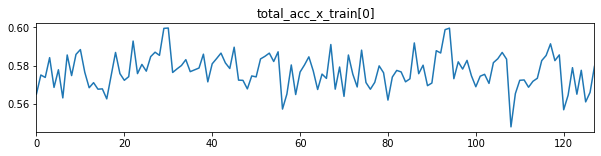

In [ ]:
ts1 = data_ts.iloc[0,:]

plt.figure(figsize=(10,2))
plt.plot(ts1)
plt.xlim([0, 127])
plt.title('total_acc_x_train[0]')
plt.savefig('FigXX-RawTS.png', dpi=600) 
plt.show()

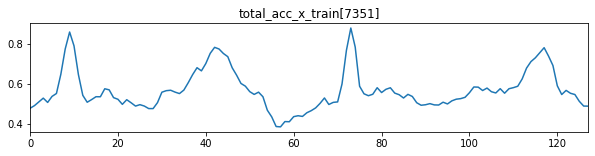

In [ ]:
ts1 = data_ts.iloc[7351,:]

plt.figure(figsize=(10,2))
plt.plot(ts1)
plt.xlim([0, 127])
plt.title('total_acc_x_train[7351]')
plt.savefig('FigXX-RawTS2.png', dpi=600) 
plt.show()

In [ ]:
# pca = PCA(n_components=3)
# data_pca = pca.fit_transform(data_ts)

# ts_pca = data_pca
# plt.plot(ts_pca)
# plt.show()

In [ ]:
ts1 = data_ts.iloc[0,:]
features = calculate_features(ts1)
features

{'10p': 0.5652396295010881,
 '25p': 0.5713949963573189,
 '50p': 0.5766330994653819,
 '75p': 0.5834956932972342,
 '90p': 0.5870612329412092,
 'avg': 0.5770558417656897,
 'cov': 63.79432398044432,
 'iqr': 0.012100696939915223,
 'kur': 0.3818828728613095,
 'med': 0.5766330994653819,
 'skw': -0.012438069008933829,
 'std': 0.00904556715645395,
 'var': 8.182228518191838e-05}

## **<font color="#FBBF44">8.x Transformations</font>**

In [ ]:
# data_ts = data_ts6
# data_test = data_test_ts6

# X_train_ts = data_ts.values
# X_test_ts = data_test_ts.values

In [ ]:
data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())

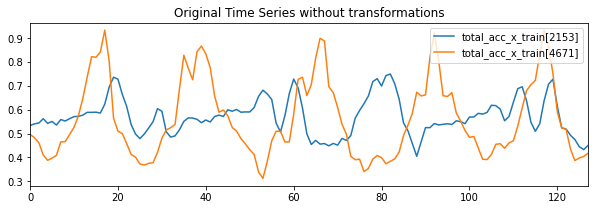

2.1232020280097013
20.000605794243917


In [ ]:
# Timeseries originali
ts1 = data_ts.iloc[2153,:]
ts2 = data_ts.iloc[4671,:]

plt.figure(figsize=(10,3))
plt.plot(ts1, label = 'total_acc_x_train[2153]')
plt.plot(ts2, label = 'total_acc_x_train[4671]')
plt.title('Original Time Series without transformations')
plt.xlim([0, 127])
plt.legend(loc="upper right")
plt.savefig('FigXX-TSbeforeTransform.png', dpi=600) 
plt.show()

dist_euc = euclidean(ts1, ts2)
dist_man = cityblock(ts1, ts2)
print(dist_euc)
print(dist_man)

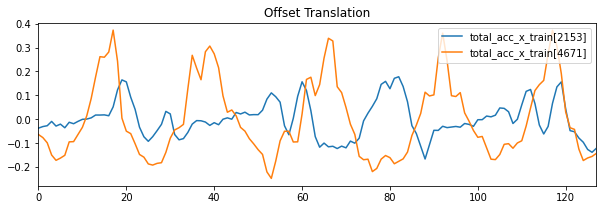

2.119320039744563
19.838924414742092


In [ ]:
# Offset Translation
ts1 = data_ts.iloc[2153,:]
ts2 = data_ts.iloc[4671,:]
ts1 = ts1 - ts1.mean()
ts2 = ts2 - ts2.mean()

plt.figure(figsize=(10,3))
plt.plot(ts1, label = 'total_acc_x_train[2153]')
plt.plot(ts2, label = 'total_acc_x_train[4671]')
plt.title('Offset Translation')
plt.xlim([0, 127])
plt.legend(loc="upper right")
plt.savefig('FigXX-TransformOffset.png', dpi=600) 
plt.show()

dist_euc = euclidean(ts1, ts2)
dist_man = cityblock(ts1, ts2)
print(dist_euc)
print(dist_man)

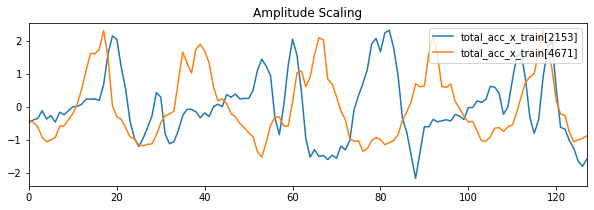

16.98957061471319
154.58262288437933


In [ ]:
# Amplitude Scaling
ts1 = data_ts.iloc[2153,:]
ts2 = data_ts.iloc[4671,:]
ts1 = (ts1 - ts1.mean())/ts1.std()
ts2 = (ts2 - ts2.mean())/ts2.std()

plt.figure(figsize=(10,3))
plt.plot(ts1, label = 'total_acc_x_train[2153]')
plt.plot(ts2, label = 'total_acc_x_train[4671]')
plt.title('Amplitude Scaling')
plt.xlim([0, 127])
plt.legend(loc="upper right")
plt.savefig('FigXX-TransformAmplitude.png', dpi=600) 
plt.show()

dist_euc = euclidean(ts1, ts2)
dist_man = cityblock(ts1, ts2)
print(dist_euc)
print(dist_man)

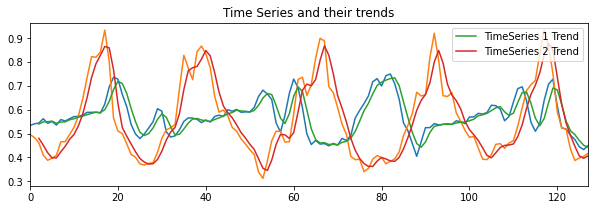

In [ ]:
# Trend Removal
w = 3
ts1 = data_ts.iloc[2153,:]
ts2 = data_ts.iloc[4671,:]

plt.figure(figsize=(10,3))
plt.plot(ts1)
plt.plot(ts2)
plt.plot(ts1.rolling(window=w).mean(), label = 'TimeSeries 1 Trend')
plt.plot(ts2.rolling(window=w).mean(), label = 'TimeSeries 2 Trend')
plt.title('Time Series and their trends')
plt.xlim([0, 127])
plt.legend(loc="upper right")
plt.savefig('FigXX-TransformTrends.png', dpi=600) 
plt.show()

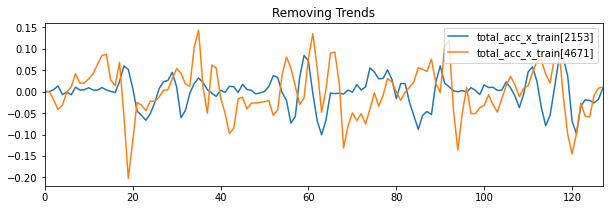

0.770794317906546
6.880586739408954


In [ ]:
ts1 = data_ts.iloc[2153,:]
ts2 = data_ts.iloc[4671,:]
ts1 = ts1 - ts1.rolling(window=w).mean()
ts2 = ts2 - ts2.rolling(window=w).mean()

ts1[np.isnan(ts1)] = 0
ts2[np.isnan(ts2)] = 0

plt.figure(figsize=(10,3))
plt.plot(ts1, label = 'total_acc_x_train[2153]')
plt.plot(ts2, label = 'total_acc_x_train[4671]')
plt.title('Removing Trends')
plt.xlim([0, 127])
plt.legend(loc="upper right")
plt.savefig('FigXX-TransformTrendsRemoved.png', dpi=600) 
plt.show()

dist_euc = euclidean(ts1, ts2)
dist_man = cityblock(ts1, ts2)
print(dist_euc)
print(dist_man)

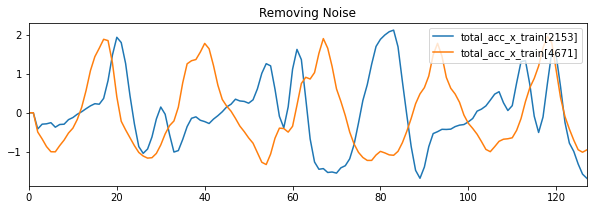

16.014935518009533
145.5634676104704


In [ ]:
# Removing Noise
ts1 = data_ts.iloc[2153,:]
ts2 = data_ts.iloc[4671,:]
ts1 = ((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean()
ts2 = ((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean()

ts1[np.isnan(ts1)] = 0
ts2[np.isnan(ts2)] = 0

plt.figure(figsize=(10,3))
plt.plot(ts1, label = 'total_acc_x_train[2153]')
plt.plot(ts2, label = 'total_acc_x_train[4671]')
plt.title('Removing Noise')
plt.xlim([0, 127])
plt.legend(loc="upper right")
plt.savefig('FigXX-TransformNoise.png', dpi=600) 
plt.show()

dist_euc = euclidean(ts1, ts2)
dist_man = cityblock(ts1, ts2)
print(dist_euc)
print(dist_man)

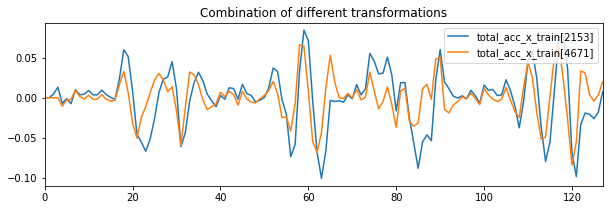

0.3192494953320715
2.6059653872497255


In [ ]:
# Combinando transformazioni
ts1 = data_ts.iloc[2153,:]
ts2 = data_ts.iloc[4671,:]

ts1x = ts1 - ts1.mean()
ts2x = ts2 - ts2.mean()

# ts1x = (ts1x - ts1x.mean())/ts1x.std()
# ts2x = (ts2x - ts2x.mean())/ts2x.std()

ts1x = ts1x - (ts1x.rolling(window=w).mean())
ts2x = ts1x - (ts1x.rolling(window=w).mean())

# ts1x = ((ts1x - ts1x.mean())/ts1x.std()).rolling(window=w).mean()
# ts2x = ((ts2x - ts2x.mean())/ts2x.std()).rolling(window=w).mean()

ts1x[np.isnan(ts1x)] = 0
ts2x[np.isnan(ts2x)] = 0

plt.figure(figsize=(10,3))
plt.plot(ts1x, label = 'total_acc_x_train[2153]')
plt.plot(ts2x, label = 'total_acc_x_train[4671]')
plt.title('Combination of different transformations')
plt.xlim([0, 127])
plt.legend(loc="upper right")
plt.savefig('FigXX-TransformCombination.png', dpi=600) 
plt.show()

dist_euc = euclidean(ts1x, ts2x)
dist_man = cityblock(ts1x, ts2x)
print(dist_euc)
print(dist_man)

## **<font color="#FBBF44">8.x Dynamic Time Warping</font>**

In [ ]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

def dtw(x, y, dist):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    
    # D0 = D1 = matrix of point-to-point costs
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view (hide first column and first row)
    
    # Fill the point-to-point costs matrix
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
            
    # C = matrix of optimal paths costs
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    
    # Infer the path from matrix C
    if len(x)==1:
        path = zeros(len(y)), range(len(y))  # special case 1
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))  # special case 2
    else:
        path = _traceback(D0)  # general case
        
    return D1[-1, -1], C, D1, path

# Function for inferring the optimal path (general case)
# Starts from last cell and goes backward...
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

def distance(x,y):
    return abs(x-y)

def nice_table(cost_matrix, title, first_timeseries, second_timeseries):
    df = pd.DataFrame(cost_matrix.transpose().astype(int))[::-1]
    df.columns = first_timeseries
    df.index = second_timeseries[::-1]
    mask = np.zeros_like(df)
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            if(np.array(df)[i][j] == -1):
                mask[i][j] = True
    sns.set_context('notebook', font_scale=2.5)
    ax = sns.heatmap(df, annot=True, fmt="d", cbar=False, mask=mask)
    ax.set_title(title)

def dtw_band(x, y, dist, band=inf):
    """
    Computes Dynamic Time Warping (DTW) of two sequences with Sakoe-Chiba band.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param int band: size of Sakow-Chiba band (default=inf)

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    
    # D0 = D1 = matrix of point-to-point costs
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view (hide first column and first row)
    
    # Fill the point-to-point costs matrix
    # Effect of bands: cells farther than "band" from diagonal have "inf" cost
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j]) if abs(i-j)<band else inf
            
    # C = matrix of optimal paths costs
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    
    # Infer the path from matrix C
    if len(x)==1:
        path = zeros(len(y)), range(len(y))  # special case 1
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))  # special case 2
    else:
        path = _traceback(D0)  # general case
        
    return D1[-1, -1], C, D1, path

# Function for inferring the optima path (general case)
# Starts from last cell and goes backward...
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

def dtw_parallel(x, y, dist, coeff=inf):
    """
    Computes Dynamic Time Warping (DTW) of two sequences with Itakura Parallelogram constraints

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param float coeff: angular coefficient of parallelogram (default=inf)

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j]) if abs(j-i) < (min(i,j,r-i,c-j)+1)*coeff else inf
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    if len(x)==1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    return D1[-1, -1], C, D1, path

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data_ts = data_ts6
data_test = data_test_ts6

X_train_ts = data_ts.values
X_test_ts = data_test_ts.values

In [ ]:
# data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
# data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())

In [ ]:
ts1 = data_ts.iloc[7345,:]
ts2 = data_ts.iloc[3574,:]

ts1 = ts1[:10]
ts2 = ts2[:10]

path, dist = dtw_path(ts1, ts2)
print(dist)
print(path)

0.8481533065511389
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


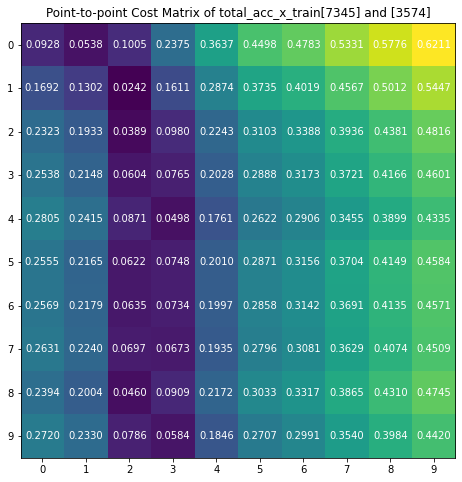

In [ ]:
mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

plt.figure(figsize=(8,8))
plt.imshow(mat)
plt.yticks(range(10))
plt.xticks(range(10))
plt.title('Point-to-point Cost Matrix of total_acc_x_train[7345] and [3574]')
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.4f' % mat[i, j], ha="center", va="center", color="w")
plt.savefig('FigXX-CostMatrix.png', dpi=600) 
plt.show()

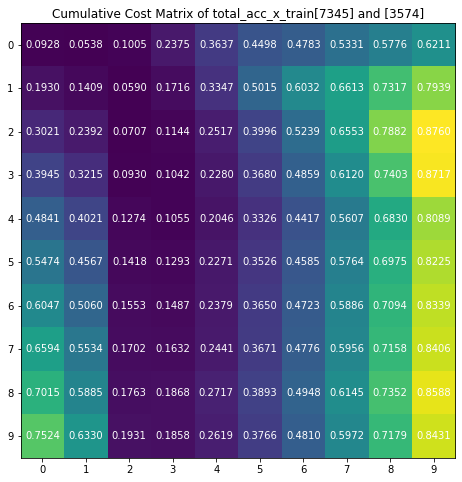

In [ ]:
acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

plt.figure(figsize=(8,8))
plt.imshow(acc)
plt.yticks(range(10))
plt.xticks(range(10))
plt.title('Cumulative Cost Matrix of total_acc_x_train[7345] and [3574]')
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.4f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
plt.savefig('FigXX-AccCostMatrix.png', dpi=600) 
plt.show()

0.8481533065511389
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


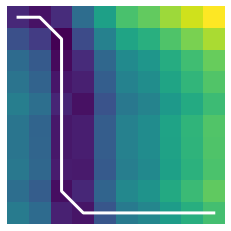

In [ ]:
path, dist = dtw_path(ts1, ts2)
print(dist)
print(path)

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.savefig('FigXX-matpath.png', dpi=600) 
plt.show()

0.8481533065511389
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


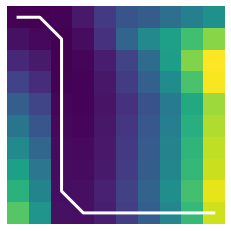

In [ ]:
path, dist = dtw_path(ts1, ts2)
print(dist)
print(path)

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.savefig('FigXX-accpath.png', dpi=600) 
plt.show()

0.8560618129852132
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 3), (5, 3), (6, 4), (7, 5), (8, 6), (9, 7), (9, 8), (9, 9)]


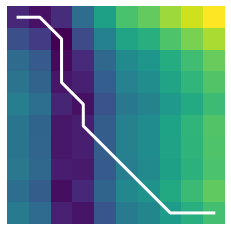

In [ ]:
path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
print(dist)
print(path)

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

0.8705954832960254
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


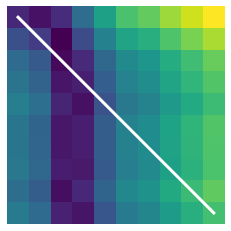

In [ ]:
path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
print(dist)
print(path)

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [ ]:
ts1 = data_ts.iloc[7345,:]
ts2 = data_ts.iloc[3574,:]

mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))
acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

1.5917095695980348
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 3), (10, 3), (11, 3), (12, 4), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (13, 13), (14, 13), (15, 14), (16, 14), (17, 14), (18, 14), (19, 14), (20, 14), (21, 14), (22, 14), (23, 15), (24, 15), (25, 16), (26, 17), (26, 18), (27, 19), (28, 19), (29, 20), (30, 21), (31, 21), (32, 21), (33, 22), (33, 23), (34, 24), (34, 25), (35, 26), (36, 26), (37, 27), (37, 28), (38, 29), (39, 30), (40, 30), (41, 31), (42, 31), (43, 31), (44, 31), (45, 31), (46, 32), (46, 33), (47, 34), (48, 34), (49, 35), (50, 36), (50, 37), (50, 38), (51, 39), (52, 40), (53, 41), (54, 42), (55, 43), (56, 44), (56, 45), (57, 46), (58, 47), (59, 48), (59, 49), (59, 50), (60, 51), (60, 52), (60, 53), (60, 54), (60, 55), (60, 56), (60, 57), (60, 58), (61, 59), (61, 60), (61, 61), (61, 62), (61, 63), (61, 64), (61, 65), (61, 66), (61, 67), (62, 68), (63, 69), (64, 70), (65, 71), (65, 72), 

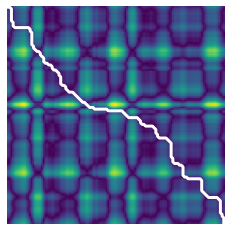

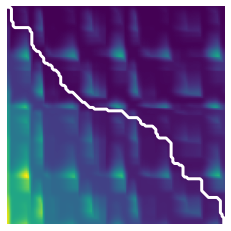

In [ ]:
path, dist = dtw_path(ts1, ts2)
print(dist)
print(path)

# Optimal Path w.r.t point-to-point costs
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.savefig('FigXX-CostMatrixPath.png', dpi=600) 
plt.show()

# Optimal Path w.r.t cumulative costs
plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.show()

4.062553063375789
[(0, 0), (0, 1), (1, 2), (2, 2), (3, 2), (4, 3), (5, 3), (6, 4), (7, 5), (8, 6), (9, 7), (10, 8), (11, 9), (12, 10), (12, 11), (12, 12), (13, 13), (14, 13), (15, 14), (16, 14), (17, 15), (18, 16), (19, 17), (20, 18), (21, 19), (21, 20), (21, 21), (21, 22), (21, 23), (22, 24), (23, 25), (24, 26), (25, 26), (26, 26), (27, 26), (28, 26), (29, 27), (30, 28), (31, 29), (32, 30), (33, 31), (34, 32), (35, 33), (36, 34), (37, 35), (38, 36), (39, 37), (40, 38), (41, 39), (42, 40), (43, 41), (44, 42), (45, 43), (46, 44), (47, 45), (48, 46), (49, 47), (50, 48), (51, 49), (52, 50), (53, 51), (54, 52), (55, 53), (56, 54), (57, 55), (58, 56), (59, 57), (60, 58), (61, 59), (61, 60), (61, 61), (61, 62), (61, 63), (62, 64), (63, 65), (64, 66), (65, 67), (66, 68), (67, 69), (68, 70), (69, 71), (70, 72), (71, 73), (72, 74), (73, 75), (74, 76), (75, 77), (76, 78), (77, 79), (78, 80), (79, 80), (80, 81), (80, 82), (81, 83), (82, 84), (83, 84), (84, 85), (85, 85), (86, 85), (87, 86), (87, 

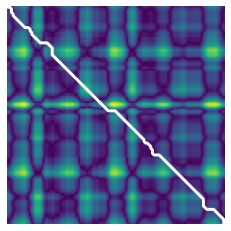

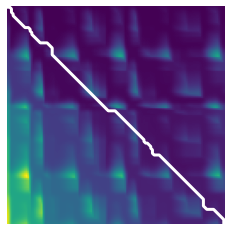

In [ ]:
path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
print(dist)
print(path)

# Optimal Path w.r.t point-to-point costs
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.savefig('FigXX-CostMatrixPathSakoe.png', dpi=600) 
plt.show()

# Optimal Path w.r.t cumulative costs
plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.show()

1.7965085161624257
[(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (5, 3), (6, 3), (7, 4), (8, 4), (9, 5), (10, 6), (11, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (13, 13), (14, 13), (15, 14), (16, 14), (17, 14), (18, 14), (19, 14), (20, 14), (21, 14), (22, 14), (23, 15), (24, 15), (25, 16), (26, 17), (26, 18), (27, 19), (28, 19), (29, 20), (30, 21), (31, 21), (32, 21), (33, 22), (33, 23), (34, 24), (34, 25), (35, 26), (36, 26), (37, 27), (37, 28), (38, 29), (39, 30), (40, 30), (41, 31), (42, 31), (43, 31), (44, 31), (45, 31), (46, 32), (46, 33), (47, 34), (48, 34), (49, 35), (50, 36), (50, 37), (50, 38), (51, 39), (52, 40), (53, 41), (54, 42), (55, 43), (56, 44), (56, 45), (57, 46), (58, 47), (59, 48), (59, 49), (59, 50), (60, 51), (60, 52), (60, 53), (60, 54), (60, 55), (60, 56), (60, 57), (60, 58), (61, 59), (61, 60), (61, 61), (61, 62), (61, 63), (61, 64), (61, 65), (61, 66), (61, 67), (62, 68), (63, 69), (64, 70), (65, 71), (65, 72), (65, 73), (65, 74), (65, 75), (65, 76), (66,

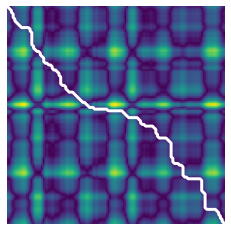

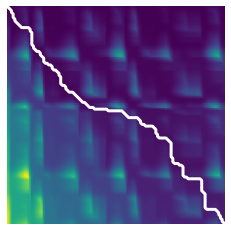

In [ ]:
path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
print(dist)
print(path)

# Optimal Path w.r.t point-to-point costs
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.savefig('FigXX-CostMatrixItakura.png', dpi=600) 
plt.show()

# Optimal Path w.r.t cumulative costs
plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w", linewidth=3.)
plt.show()

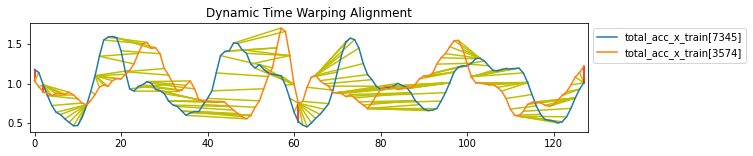

In [ ]:
(dist, cost, acc, path) = dtw(ts1, ts2, distance)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift, label = 'total_acc_x_train[7345]')
plt.plot(ts1, label = 'total_acc_x_train[3574]')
plt.title('Dynamic Time Warping Alignment')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.savefig('FigXX-DTWAlignment.png', dpi=600, bbox_inches = 'tight') 
plt.show()

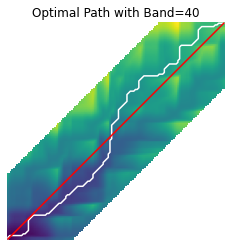

In [ ]:
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=40)

plt.imshow(mat.T)
plt.axis("off")
plt.plot(path[0], path[1], 'w')
plt.plot(path[0], path[0], 'r-')
plt.title('Optimal Path with Band=40')
plt.xlim(-0.5,mat.shape[0]-0.5)
plt.ylim(-0.5,mat.shape[1]-0.5)
plt.savefig('FigXX-PathBand40.png', dpi=600) 
plt.show()

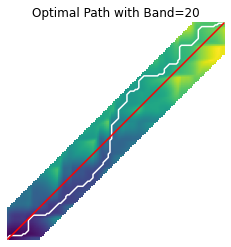

In [ ]:
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=20)

plt.imshow(mat.T)
plt.axis("off")
plt.plot(path[0], path[1], 'w')
plt.plot(path[0], path[0], 'r-')
plt.title('Optimal Path with Band=20')
plt.xlim(-0.5,mat.shape[0]-0.5)
plt.ylim(-0.5,mat.shape[1]-0.5)
plt.savefig('FigXX-PathBand20.png', dpi=600) 
plt.show()

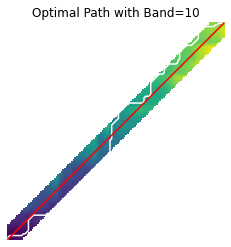

In [ ]:
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=10)

plt.imshow(mat.T)
plt.axis("off")
plt.plot(path[0], path[1], 'w')
plt.plot(path[0], path[0], 'r-')
plt.title('Optimal Path with Band=10')
plt.xlim(-0.5,mat.shape[0]-0.5)
plt.ylim(-0.5,mat.shape[1]-0.5)
plt.savefig('FigXX-PathBand10.png', dpi=600) 
plt.show()

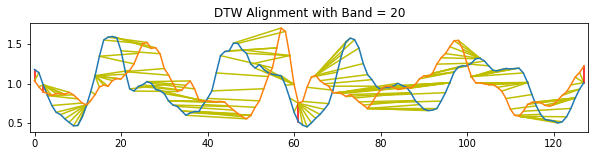

In [ ]:
b = 20
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=b)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment with Band = {}'.format(b))
plt.savefig('FigXX-DTWAlignment20.png', dpi=600, bbox_inches = 'tight') 
plt.show()

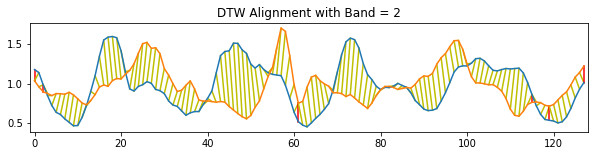

In [ ]:
b = 2
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=b)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment with Band = {}'.format(b))
plt.savefig('FigXX-DTWAlignment2.png', dpi=600, bbox_inches = 'tight') 
plt.show()

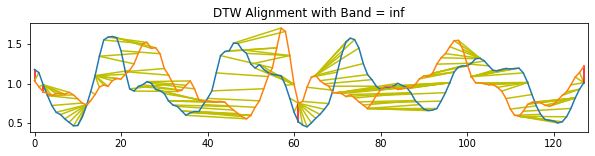

In [ ]:
b = np.inf
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=b)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment with Band = {}'.format(b))
plt.savefig('FigXX-DTWAlignmentinf.png', dpi=600, bbox_inches = 'tight') 
plt.show()

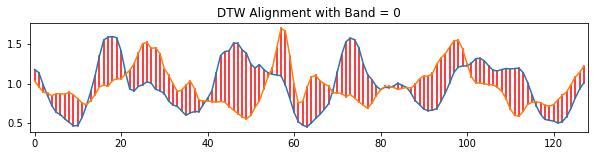

In [ ]:
b = 0
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=b)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment with Band = {}'.format(b))
plt.savefig('FigXX-DTWAlignment0.png', dpi=600, bbox_inches = 'tight') 
plt.show()

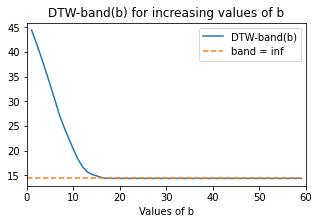

In [ ]:
bvals = range(0,60)
plt.figure(figsize=(5,3))
d_list = [ dtw_band(ts1,ts2,distance,band=b)[0] for b in bvals ]
best_d = dtw_band(ts1,ts2,distance,band=np.inf)[0]
plt.plot(bvals, d_list, label = 'DTW-band(b)' )
plt.plot([bvals[0],bvals[-1]],[best_d, best_d], '--', label = 'band = inf')
plt.legend(loc='upper right')
plt.xlabel('Values of b')
plt.xlim(0, 60)
plt.title('DTW-band(b) for increasing values of b')
plt.savefig('FigXX-DTWAlignmentGraph.png', dpi=600,bbox_inches = 'tight') 
plt.show()

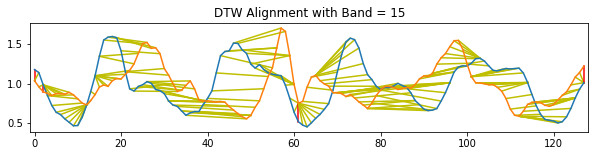

In [ ]:
b = 15
d, aa, mat, path = dtw_band(ts1,ts2,distance,band=b)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment with Band = {}'.format(b))
plt.show()

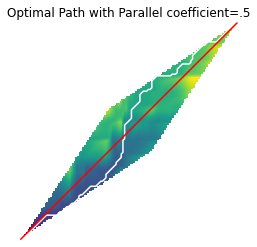

In [ ]:
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=.5)

plt.imshow(mat.T)
plt.axis("off")
plt.plot(path[0], path[1], 'w')
plt.plot(path[0], path[0], 'r-')
plt.title('Optimal Path with Parallel coefficient=.5')
plt.xlim(-0.5,mat.shape[0]-0.5)
plt.ylim(-0.5,mat.shape[1]-0.5)
plt.savefig('FigXX-ParallelpathCoeff05.png', dpi=600) 
plt.show()

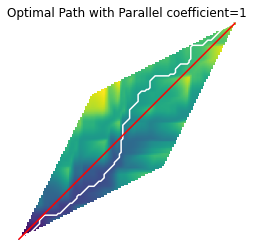

In [ ]:
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=1.0)

plt.imshow(mat.T)
plt.axis("off")
plt.plot(path[0], path[1], 'w')
plt.plot(path[0], path[0], 'r-')
plt.xlim(-0.5,mat.shape[0]-0.5)
plt.ylim(-0.5,mat.shape[1]-0.5)
plt.title('Optimal Path with Parallel coefficient=1')
plt.savefig('FigXX-ParallelpathCoeff1.png', dpi=600) 
plt.show()

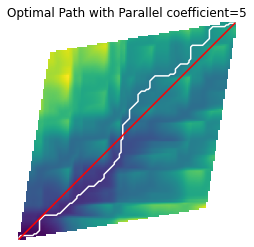

In [ ]:
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=5.0)

plt.imshow(mat.T)
plt.axis("off")
plt.plot(path[0], path[1], 'w')
plt.plot(path[0], path[0], 'r-')
plt.xlim(-0.5,mat.shape[0]-0.5)
plt.ylim(-0.5,mat.shape[1]-0.5)
plt.title('Optimal Path with Parallel coefficient=5')
plt.savefig('FigXX-ParallelpathCoeff5.png', dpi=600) 
plt.show()

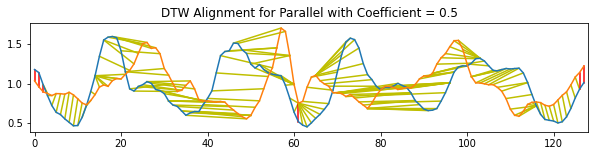

In [ ]:
c = .5
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=c)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment for Parallel with Coefficient = {}'.format(c))
plt.savefig('FigXX-ParallelCoeff05.png', dpi=600) 
plt.show()

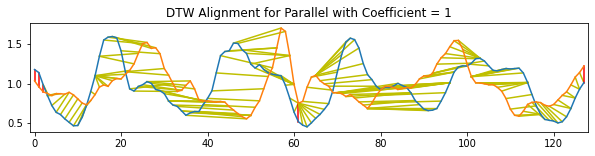

In [ ]:
c = 1
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=c)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment for Parallel with Coefficient = {}'.format(c))
plt.savefig('FigXX-ParallelCoeff1.png', dpi=600) 
plt.show()

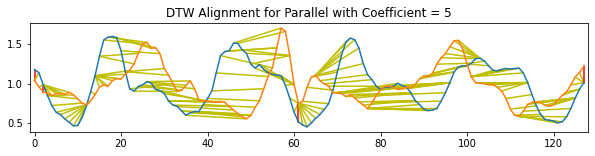

In [ ]:
c = 5
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=c)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment for Parallel with Coefficient = {}'.format(c))
plt.savefig('FigXX-ParallelCoeff5.png', dpi=600) 
plt.show()

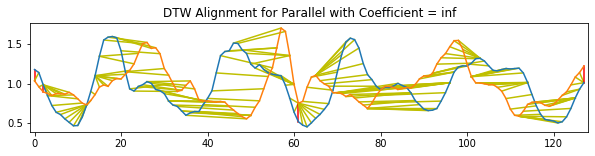

In [ ]:
c = np.inf
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=c)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment for Parallel with Coefficient = {}'.format(c))
plt.savefig('FigXX-ParallelCoeffing.png', dpi=600) 
plt.show()

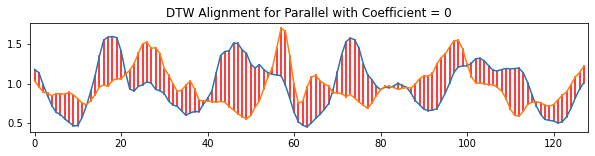

In [ ]:
c = 0
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=c)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment for Parallel with Coefficient = {}'.format(c))
plt.savefig('FigXX-ParallelCoeff0.png', dpi=600) 
plt.show()

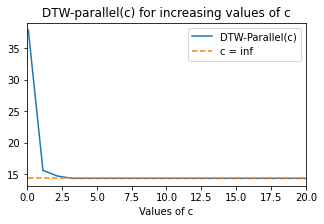

In [ ]:
cvals = np.linspace(0.1,20.0,20)
plt.figure(figsize=(5,3))
d_list = [ dtw_parallel(ts1,ts2,distance,coeff=c)[0] for c in cvals ]
best_d = dtw_parallel(ts1,ts2,distance)[0]
plt.plot(cvals,d_list, label = 'DTW-Parallel(c)')
plt.plot([cvals[0],cvals[-1]],[best_d, best_d], '--', label='c = inf')
plt.legend(loc='upper right')
plt.xlabel('Values of c')
plt.xlim(0, 20)
plt.title('DTW-parallel(c) for increasing values of c')
plt.savefig('FigXX-DTWAlignmentParallelGraph.png', dpi=600,bbox_inches = 'tight') 
plt.show()

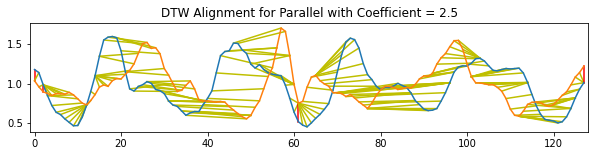

In [ ]:
c = 2.5
d, aa, mat, path = dtw_parallel(ts1,ts2,distance,coeff=c)

yshift = .05 
plt.figure(figsize=(10,2))
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plt.plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
plt.xlim(-1,max(len(ts1),len(ts2)))
plt.plot(ts2+yshift)
plt.plot(ts1)
plt.title('DTW Alignment for Parallel with Coefficient = {}'.format(c))
# plt.savefig('FigXX-ParallelCoeff15.png', dpi=600) 
plt.show()

## **<font color="#FBBF44">8.x TS Approximation</font>**

In [ ]:
data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())

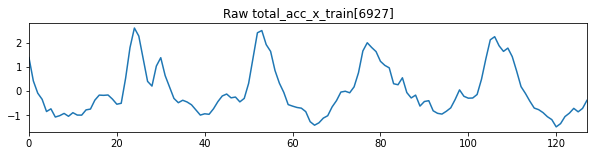

In [ ]:
ts = data_ts.iloc[6927,:]

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts.values.reshape(1,-1))

plt.figure(figsize=(10,2))
plt.title("Raw total_acc_x_train[6927]")
plt.xlim([0, 127])
plt.plot(ts[0].ravel())
plt.savefig('FigXX-ApproxRaw.png', dpi=600) 
plt.show()

In [ ]:
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

In [ ]:
from pyts.approximation import DiscreteFourierTransform
ts = data_ts.iloc[6927,:]
n_coefs = 16

dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts_dft = dft.fit_transform(ts.values.reshape(1, -1))
ts_dft.shape

(1, 16)

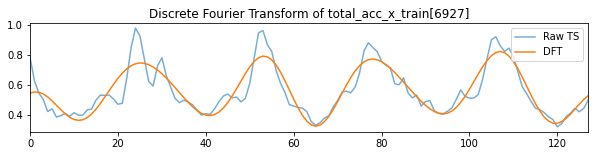

In [ ]:
ts_dft_inv = dft_inverse_trasform(ts_dft, n_coefs=n_coefs, n_timestamps=len(ts.values))

plt.figure(figsize=(10,2))
plt.title("Discrete Fourier Transform of total_acc_x_train[6927]")
plt.xlim([0, 127])
plt.plot(ts.ravel(), alpha=0.6, label = 'Raw TS')
plt.plot(ts_dft_inv.ravel(),label = 'DFT')
plt.legend(loc='upper right')
plt.savefig('FigXX-ApproxDFT.png', dpi=600) 
plt.show()

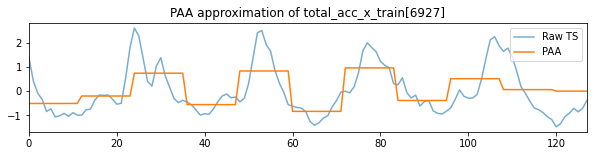

In [ ]:
ts = data_ts.iloc[6927,:]
ts = scaler.fit_transform(ts.values.reshape(1,-1))

# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

plt.figure(figsize=(10,2))
plt.plot(ts[0].ravel(), alpha=0.6, label="Raw TS")
plt.plot(paa_dataset_inv[0].ravel(), label="PAA")
plt.legend(loc='upper right')
plt.title("PAA approximation of total_acc_x_train[6927]")
plt.xlim([0, 127])
plt.savefig('FigXX-ApproxPAA.png', dpi=600) 
plt.show()

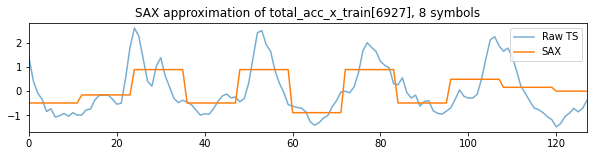

In [ ]:
# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

plt.figure(figsize=(10,2))
plt.plot(ts[0].ravel(), alpha=0.6, label="Raw TS")
plt.plot(sax_dataset_inv[0].ravel(), label="SAX")
plt.legend(loc='upper right')
plt.title("SAX approximation of total_acc_x_train[6927], %d symbols" % n_sax_symbols)
plt.xlim([0, 127])
plt.savefig('FigXX-ApproxSAX.png', dpi=600) 
plt.show()

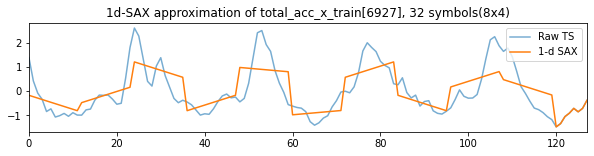

In [ ]:
# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure(figsize=(10,2))
plt.plot(ts[0].ravel(), alpha=0.6, label="Raw TS")
plt.plot(one_d_sax_dataset_inv[0].ravel(), label="1-d SAX")
plt.legend(loc='upper right')
plt.title("1d-SAX approximation of total_acc_x_train[6927], %d symbols" "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope, n_sax_symbols_avg, n_sax_symbols_slope))
plt.xlim([0, 127])
plt.savefig('FigXX-Approx1dSAX.png', dpi=600) 
plt.show()

## **<font color="#FBBF44">8.x TS Clustering</font>**

In [ ]:
# from tslearn.generators import random_walks
# Xtoy = random_walks(n_ts=50, sz=32, d=1)
# print(Xtoy.shape)

# plt.plot(np.squeeze(Xtoy).T)
# plt.show()

# km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
# km.fit(Xtoy)

# print(km.cluster_centers_.shape)
# plt.plot(np.squeeze(km.cluster_centers_).T)
# plt.show()

# for i in range(3):
#     plt.plot(np.mean(Xtoy[np.where(km.labels_ == i)[0]], axis=0))
# plt.show()

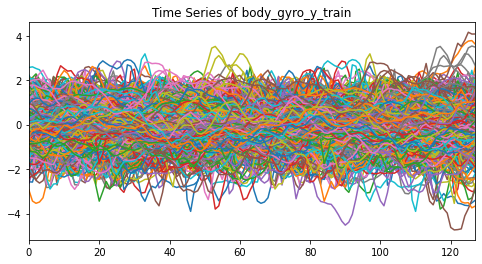

(7352, 128)

In [ ]:
data_ts = data_ts3
data_test = data_test_ts3

ts = data_ts

plt.figure(figsize=(8,4))
plt.plot(ts.T)
plt.title("Time Series of body_gyro_y_train")
plt.xlim([0, 127])
plt.savefig('FigXX-ClusterTS.png', dpi=600) 
plt.show()

data_ts.shape

### **<font color="#34eb89">8.x.x Shape-Based Clustering</font>**

(3, 128, 1)


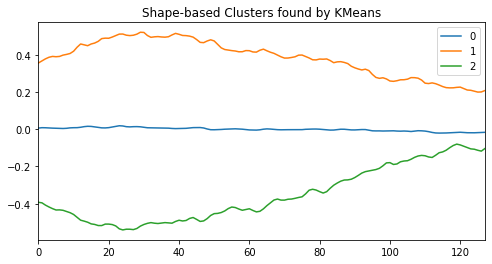

In [ ]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=100, random_state=0)
km.fit(ts)

print(km.cluster_centers_.shape)
plt.figure(figsize=(8,4))
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.title("Shape-based Clusters found by KMeans")
plt.xlim([0, 127])
plt.savefig('FigXX-ClusterShape.png', dpi=600) 
plt.show()

In [ ]:
# km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
# km_dtw.fit(ts)

# plt.plot(np.squeeze(km_dtw.cluster_centers_).T)
# plt.show()

In [ ]:
# km = TimeSeriesKMeans(n_clusters=3, metric="softdtw", max_iter=5, random_state=0)
# km.fit(ts.T)

# plt.plot(np.squeeze(km.cluster_centers_).T)
# plt.show()

### **<font color="#34eb89">8.x.x Feature-Based Clustering</font>**

In [ ]:
ts = data_ts.T
F = []
for i in ts:
  F.append(list(calculate_features(ts[i]).values()))

np.shape(F)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(F)
kmeans.labels_

In [ ]:
plt.figure(figsize=(10,3))
for i in range(3):
    plt.plot(np.mean(ts[np.where(kmeans.labels_ == i)[0]].T),label=i)
plt.title("Feature-based Clusters found by KMeans")
plt.legend(loc="best")
plt.xlim([0, 127])
plt.savefig('FigXX-ClusterFeature.png', dpi=600) 
plt.show()

### **<font color="#34eb89">8.x.x Compression-Based Clustering</font>**

In [ ]:
# import zlib
# import string

In [ ]:
# def cdm_dist(x, y):
#     x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
#     y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
#     return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [ ]:
# M = pairwise_distances(ts, metric=cdm_dist)
# plt.plot(sorted(M.ravel()))
# plt.show()

### **<font color="#34eb89">8.x.x Approximate Clustering</font>**

In [ ]:
data_ts.shape

(7352, 128)

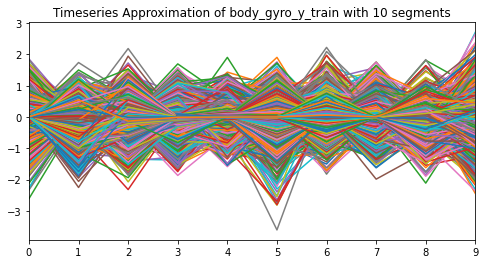

(7352, 10, 1)

In [ ]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)

plt.figure(figsize=(8,4))
plt.plot(ts_paa.reshape(ts_paa.shape[1], ts_paa.shape[0]))
plt.xlim([0, 9])
plt.title("Timeseries Approximation of body_gyro_y_train with {} segments".format(n_paa_segments))
plt.savefig('FigXX-ClusterApproxTS.png', dpi=600) 
plt.show()

ts_paa.shape

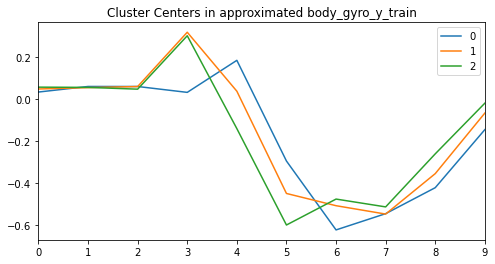

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(ts_paa)

clusters = ['0', '1', '2']
plt.figure(figsize=(8,4))
plt.plot(km.cluster_centers_.reshape(ts_paa.shape[1], 3))
plt.title("Cluster Centers in approximated body_gyro_y_train")
plt.legend(labels=clusters, loc='best')
plt.xlim([0, 9])
plt.show()

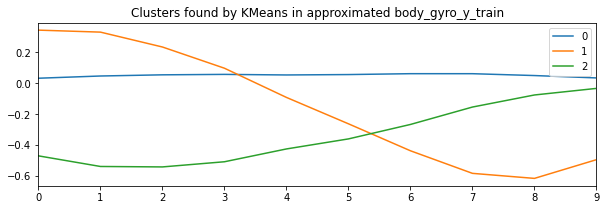

In [ ]:
plt.figure(figsize=(10,3))
for i in range(3):
    plt.plot(np.mean(ts_paa[np.where(km.labels_ == i)[0]] , axis=0), label = i)
plt.title("Clusters found by KMeans in approximated body_gyro_y_train")
plt.xlim([0, 9])
plt.legend(loc="best")
plt.savefig('FigXX-ClusterApprox.png', dpi=600) 
plt.show()

## **<font color="#FBBF44">8.x Shapelet Discovery</font>**

In [ ]:
data_ts = data_ts3
data_test = data_test_ts3

In [ ]:
n_ts, ts_sz = data_ts.shape
n_classes = len(set(y_train))

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts, ts_sz=ts_sz, n_classes=n_classes, l=0.1, r=1)

print('Number of time series:', n_ts)
print('Time series size:', ts_sz)
print('n_classes:', n_classes)
print('shapelet_sizes:', shapelet_sizes)

Number of time series: 7352
Time series size: 128
n_classes: 6
shapelet_sizes: {12: 6}


In [ ]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=0,
                        random_state=0)

shp_clf.fit(data_ts, y_train)

LearningShapelets(max_iter=200, n_shapelets_per_size={12: 6}, random_state=0,
                  weight_regularizer=0.01)

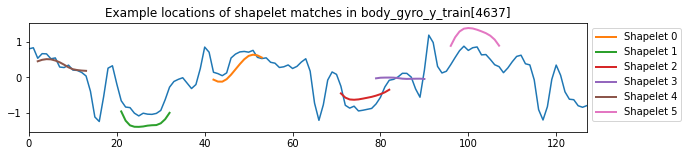

In [ ]:
predicted_locations = shp_clf.locate(data_ts)

ts_id = 4637
plt.figure(figsize=(10,2))
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches in body_gyro_y_train[4637]") 
plt.plot(data_ts.iloc[ts_id,:])
plt.xlim([0,127])
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2, label = 'Shapelet {}'.format(idx_shp))
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.savefig('FigXX-Shapelets.png', dpi=600,bbox_inches = 'tight') 
plt.show()

In [ ]:
pred_labels = shp_clf.predict(X_test_ts)
print("Correct classification rate:", accuracy_score(y_test, pred_labels))

shapelets = ['Shapelet 0', 'Shapelet 1', 'Shapelet 2', 'Shapelet 3', 'Shapelet 4', 'Shapelet 5']
plt.figure(figsize=(10,3))
for i, sz in enumerate(shapelet_sizes.keys()):
  plt.title("%d shapelets of size %d" % (shapelet_sizes[sz], sz))
  for shp in shp_clf.shapelets_:
    if ts_size(shp) == sz:
      plt.plot(shp.ravel())
  plt.xlim([0, max(shapelet_sizes.keys()) - 1])
  plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5, labels=shapelets)
  plt.show()

  plt.figure(figsize=(8,4))
  plt.plot(np.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
  plt.title("Evolution of cross-entropy loss during training")
  plt.xlabel("Epochs")
  plt.xlim([0,200])
  plt.show()

## **<font color="#FBBF44">8.x Motif Discovery</font>**

In [ ]:
!pip install matrixprofile-ts
from matrixprofile import *

In [ ]:
# data_ts = data_ts6
# data_test = data_test_ts6

# X_train_ts = data_ts.values
# X_test_ts = data_test_ts.values

In [ ]:
data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())

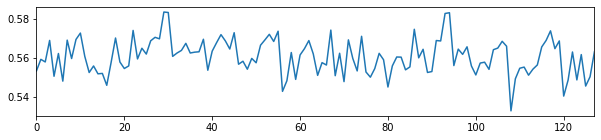

In [ ]:
ts = data_ts.iloc[3245,:]

plt.figure(figsize=(10,2))
plt.plot(ts)
plt.xlim([0,127])
plt.show()

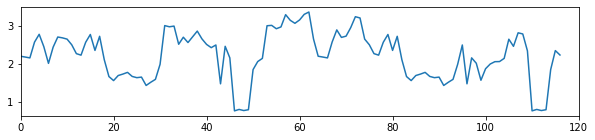

In [ ]:
w =12
mp, mpi= matrixProfile.stomp(ts.values, w)

plt.figure(figsize=(10,2))
plt.plot(mp)
plt.xlim([0,120])
plt.show()

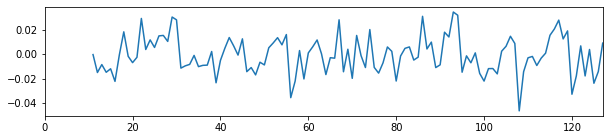

In [ ]:
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(w, center=False).mean(), index=ts.index)

plt.figure(figsize=(10,2))
plt.plot(ts_log_mov_diff)
plt.xlim([0,127])
plt.show()

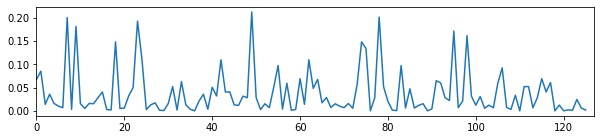

In [ ]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.figure(figsize=(10,2))
plt.plot(mp)
plt.xlim([0,127])
plt.show()

In [ ]:
ts = data_ts6.iloc[3245,:]
w = 3

mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

print(mo)
print(mod)

[[110, 118], [36, 89], [76, 120], [29, 82], [58, 122]]
[0.0004459300725032279, 0.0004808567207925704, 0.0005771920417543945, 0.001050919433700452, 0.0017108704693335572]


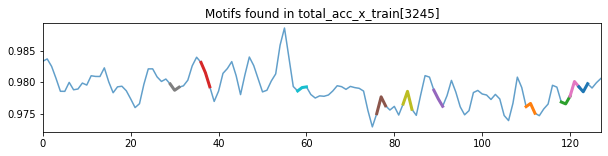

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(ts, alpha=.7)
plt.xlim([0,127])
colors = ['seagreen', 'darkorange', 'blueviolet', 'orchid', 'maroon'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    plt.title('Motifs found in total_acc_x_train[3245]') 
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, lw=3)
plt.savefig('FigXX-Motifs.png', dpi=600) 
plt.show()

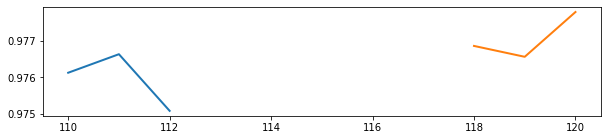

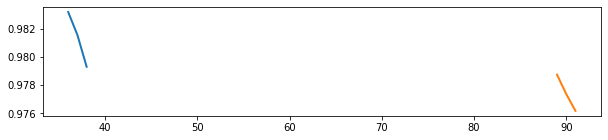

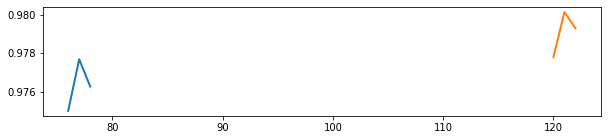

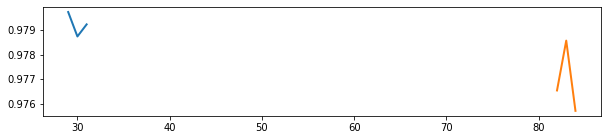

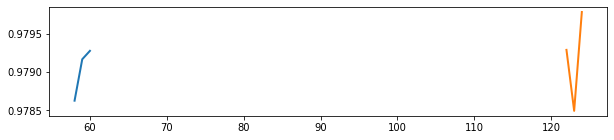

In [ ]:
for m, d, c in zip(mo, mod, colors):
    plt.figure(figsize=(10,2))
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, lw=2)
    plt.savefig('FigXX-'+str(i)+'Motif.png', dpi=600)
    plt.show()

## **<font color="#FBBF44">8.x Anomaly Discovery</font>**

In [ ]:
from matrixprofile.discords import discords

In [ ]:
anoms = discords(mp, ex_zone=3, k=5)
anoms

array([49, 78,  7, 23, 95])

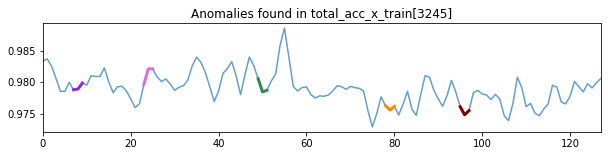

In [ ]:
plt.figure(figsize=(10,2))
plt.plot(ts, alpha=.7)
plt.xlim([0,127])
plt.title('Anomalies found in total_acc_x_train[3245]') 
colors = ['seagreen', 'darkorange', 'blueviolet', 'orchid', 'maroon'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)
plt.savefig('FigXX-TSAnomalies.png', dpi=600) 
plt.show()

## **<font color="#FBBF44">8.x TS Classification</font>**

In [ ]:
data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())

X_train_ts = data_ts.values
X_test_ts = data_test_ts.values

### **<font color="#34eb89">8.x.x TimeSeries Classification</font>**

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_ts, y_train)

y_pred = clf.predict(X_test_ts)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7488971835765185
F1-score [0.89906542 0.76487805 0.73105498 0.61550889 0.41769042 1.        ]
              precision    recall  f1-score   support

           1       0.84      0.97      0.90       496
           2       0.71      0.83      0.76       471
           3       0.97      0.59      0.73       420
           4       0.51      0.78      0.62       491
           5       0.60      0.32      0.42       532
           6       1.00      1.00      1.00       537

    accuracy                           0.75      2947
   macro avg       0.77      0.75      0.74      2947
weighted avg       0.77      0.75      0.74      2947



In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train_ts, y_train)

y_pred = clf.predict(X_test_ts)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5805904309467255
F1-score [0.43554261 0.57760314 0.61964736 0.54746137 0.23901099 0.99906977]
              precision    recall  f1-score   support

           1       0.34      0.60      0.44       496
           2       0.54      0.62      0.58       471
           3       0.66      0.59      0.62       420
           4       0.60      0.51      0.55       491
           5       0.44      0.16      0.24       532
           6       1.00      1.00      1.00       537

    accuracy                           0.58      2947
   macro avg       0.60      0.58      0.57      2947
weighted avg       0.60      0.58      0.57      2947



In [ ]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw_sakoechiba')
clf.fit(X_train_ts, y_train)

y_pred = clf.predict(X_test_ts)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7835086528673227
F1-score [0.89846154 0.8120155  0.85788787 0.57114818 0.5744888  1.        ]
              precision    recall  f1-score   support

           1       0.91      0.88      0.90       496
           2       0.75      0.89      0.81       471
           3       0.95      0.78      0.86       420
           4       0.55      0.59      0.57       491
           5       0.60      0.55      0.57       532
           6       1.00      1.00      1.00       537

    accuracy                           0.78      2947
   macro avg       0.79      0.78      0.79      2947
weighted avg       0.79      0.78      0.78      2947



### **<font color="#34eb89">8.x.x Shapelet-Based Classification</font>**

In [ ]:
# st = ShapeletTransform(window_sizes=[4, 12], random_state=42, sort=True)

# X_new = st.fit_transform(X_train_ts, y_train)
# X_test_new = st.transform(X_test_ts)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(max_depth=8, random_state=42)
# clf.fit(X_new, y_train)

# y_pred = clf.predict(X_test_new)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

In [ ]:
n_ts, ts_sz = data_ts.shape
n_classes = len(set(y_train))

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts, ts_sz=ts_sz, n_classes=n_classes, l=0.1, r=1)

print('Number of time series:', n_ts)
print('Time series size:', ts_sz)
print('n_classes:', n_classes)
print('shapelet_sizes:', shapelet_sizes)

Number of time series: 7352
Time series size: 128
n_classes: 6
shapelet_sizes: {12: 6}


In [ ]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=0,
                        random_state=0)

In [ ]:
shp_clf.fit(X_train_ts, y_train)
y_pred = shp_clf.predict(X_test_ts)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3627417712928402
F1-score [0.         0.         0.         0.         0.36931621 0.96756757]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.00      0.00      0.00       471
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.23      1.00      0.37       532
           6       0.94      1.00      0.97       537

    accuracy                           0.36      2947
   macro avg       0.19      0.33      0.22      2947
weighted avg       0.21      0.36      0.24      2947



In [ ]:
X_train2_ts = shp_clf.transform(X_train_ts)
X_test2_ts = shp_clf.transform(X_test_ts)

X_train2_ts.shape

(7352, 6)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train2_ts, y_train)

y_pred = clf.predict(X_test2_ts)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.66949440108585
F1-score [0.61211477 0.57979226 0.66839378 0.62157534 0.5        1.        ]
              precision    recall  f1-score   support

           1       0.65      0.58      0.61       496
           2       0.52      0.65      0.58       471
           3       0.73      0.61      0.67       420
           4       0.54      0.74      0.62       491
           5       0.63      0.41      0.50       532
           6       1.00      1.00      1.00       537

    accuracy                           0.67      2947
   macro avg       0.68      0.67      0.66      2947
weighted avg       0.68      0.67      0.67      2947



In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_train2_ts, y_train)

y_pred = clf.predict(X_test2_ts)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6501526976586359
F1-score [0.63157895 0.62808511 0.69470828 0.60888565 0.19411765 1.        ]
              precision    recall  f1-score   support

           1       0.75      0.54      0.63       496
           2       0.52      0.78      0.63       471
           3       0.81      0.61      0.69       420
           4       0.47      0.85      0.61       491
           5       0.45      0.12      0.19       532
           6       1.00      1.00      1.00       537

    accuracy                           0.65      2947
   macro avg       0.67      0.65      0.63      2947
weighted avg       0.67      0.65      0.62      2947



### **<font color="#34eb89">8.x.x Feature-Based Classification</font>**

In [ ]:
train = data_ts.T
test = data_test_ts.T

X_trainF = []
for i in train:
  X_trainF.append(list(calculate_features(train[i]).values()))

X_testF = []
for i in test:
  X_testF.append(list(calculate_features(test[i]).values()))

np.shape(X_trainF)

(7352, 13)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_trainF, y_train)

y_pred = clf.predict(X_testF)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6396335256192739
F1-score [0.5771028  0.55587949 0.76094276 0.56582175 0.37259615 0.96331138]
              precision    recall  f1-score   support

           1       0.69      0.50      0.58       496
           2       0.51      0.61      0.56       471
           3       0.72      0.81      0.76       420
           4       0.47      0.70      0.57       491
           5       0.52      0.29      0.37       532
           6       0.97      0.95      0.96       537

    accuracy                           0.64      2947
   macro avg       0.65      0.64      0.63      2947
weighted avg       0.65      0.64      0.63      2947



In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42)
clf.fit(X_trainF, y_train)

y_pred = clf.predict(X_testF)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.6382762130980658
F1-score [0.46852123 0.62343405 0.72282609 0.61794501 0.20543807 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.32      0.47       496
           2       0.48      0.90      0.62       471
           3       0.84      0.63      0.72       420
           4       0.48      0.87      0.62       491
           5       0.52      0.13      0.21       532
           6       1.00      1.00      1.00       537

    accuracy                           0.64      2947
   macro avg       0.70      0.64      0.61      2947
weighted avg       0.70      0.64      0.60      2947



### **<font color="#34eb89">8.x.x CNN Classification</font>**

In [ ]:
def build_simple_cnn(n_timesteps, n_outputs):
    model = Sequential()
    
    model.add(Conv1D(filters=16, kernel_size=8, activation='relu', input_shape=(n_timesteps, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(GlobalAveragePooling1D())
    
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
X_train_cnn = X_train_ts.reshape((X_train_ts.shape[0], X_train_ts.shape[1], 1))
X_test_cnn = X_test_ts.reshape((X_test_ts.shape[0], X_test_ts.shape[1], 1))

X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(X_train_cnn, y_train, test_size=0.2, stratify=y_train)

n_timesteps, n_outputs, n_features = X_train_cnn.shape[1], len(np.unique(y_train_cnn)), 1 
print("TIMESTEPS: ", n_timesteps)
print("N. LABELS: ", n_outputs)

TIMESTEPS:  128
N. LABELS:  6


In [ ]:
cnn = build_simple_cnn(n_timesteps, n_outputs)
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121, 16)           144       
                                                                 
 batch_normalization (BatchN  (None, 121, 16)          64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 121, 16)           0         
                                                                 
 dropout (Dropout)           (None, 121, 16)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 117, 32)           2592      
                                                                 
 batch_normalization_1 (Batc  (None, 117, 32)          128       
 hNormalization)                                        

In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

history_cnn = cnn.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=mini_batch_size, callbacks=callbacks,
                      validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/5
368/368 [==============================] - 10s 15ms/step - loss: nan - accuracy: 1.7004e-04 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/5
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/5
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/5
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/5
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010


In [ ]:
y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

cnn.evaluate(X_test_cnn, y_test)

Accuracy 0.0
F1-score [0. 0. 0. 0. 0. 0. 0.]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     496.0
           2       0.00      0.00      0.00     471.0
           3       0.00      0.00      0.00     420.0
           4       0.00      0.00      0.00     491.0
           5       0.00      0.00      0.00     532.0
           6       0.00      0.00      0.00     537.0

    accuracy                           0.00    2947.0
   macro avg       0.00      0.00      0.00    2947.0
weighted avg       0.00      0.00      0.00    2947.0

93/93 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0000e+00


[nan, 0.0]

### **<font color="#34eb89">8.x.x LSTM Classification</font>**

In [ ]:
def build_lstm(n_timesteps, n_outputs):
    model = Sequential()
    model.add(LSTM(256, input_shape=(n_timesteps, 1)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
lstm = build_lstm(n_timesteps, n_outputs)
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 281,030
Trainable params: 281,030
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_lr=0)
mc = ModelCheckpoint('best_model_cnn.h5', monitor='val_loss', save_best_only=True)

callbacks = [rlr, mc]

batch_size = 16
mini_batch_size = int(min(X_train_cnn.shape[0]/10, batch_size))

history_lstm = cnn.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=mini_batch_size, callbacks=callbacks,
                       validation_data=(X_val_cnn, y_val_cnn)).history

Epoch 1/100
368/368 [==============================] - 5s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
368/368 [==============================] - 5s 12ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/100
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/100
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/100
368/368 [==============================] - 5s 13ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/100
368/368 [=========================

In [ ]:
y_pred = np.argmax(lstm.predict(X_test_cnn), axis=1)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

lstm.evaluate(X_test_cnn, y_test)

Accuracy 0.15744825246012895
F1-score [0.00738007 0.27402135 0.         0.         0.         0.        ]
              precision    recall  f1-score   support

           1       0.04      0.00      0.01       496
           2       0.16      0.98      0.27       471
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.00      0.00      0.00       532
           6       0.00      0.00      0.00       537

    accuracy                           0.16      2947
   macro avg       0.03      0.16      0.05      2947
weighted avg       0.03      0.16      0.05      2947

93/93 [==============================] - 2s 15ms/step - loss: nan - accuracy: 0.1574


[nan, 0.15744824707508087]

### **<font color="#34eb89">8.x.x Advanced Classification - Crossvalidation</font>**

In [ ]:
# Lista dei modeli a utilizzare 
model_knn = KNeighborsClassifier()
model_gaussnb = GaussianNB()
model_svc = SVC()
model_etc = ExtraTreesClassifier()
model_bag = BaggingClassifier()
model_xgb = XGBClassifier()

# Dizionario a percorrere per chiamare ogni modello
models = {
    'K Neighbors': model_knn,
    'Gaussian Naive Bayes': model_gaussnb,
    'SVM': model_svc,
    'ExtraTrees': model_etc,
    'Bagging': model_bag,
    'XGBoost': model_xgb
    }

# Lista vuota dove mettere i valori accuracy di ogni metodo con cross-validation
validation_scores = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Prima "vista" del performance di ogni modello, inizializzandoli senza alcun parametri, 
for name, model in models.items():
    print(f"{name}'s KFold starting")
    score = cross_val_score(model, X_train_ts, y_train, scoring='accuracy', cv=kf, n_jobs=-1, verbose=0).mean()
    print(f"{name}'s cross validation score: {score:.6f}\n")
    validation_scores[name] = score

K Neighbors's KFold starting
K Neighbors's cross validation score: 0.794886

Gaussian Naive Bayes's KFold starting
Gaussian Naive Bayes's cross validation score: 0.712186

SVM's KFold starting
SVM's cross validation score: 0.806586

ExtraTrees's KFold starting
ExtraTrees's cross validation score: 0.845079

Bagging's KFold starting
Bagging's cross validation score: 0.784549

XGBoost's KFold starting
XGBoost's cross validation score: 0.807131



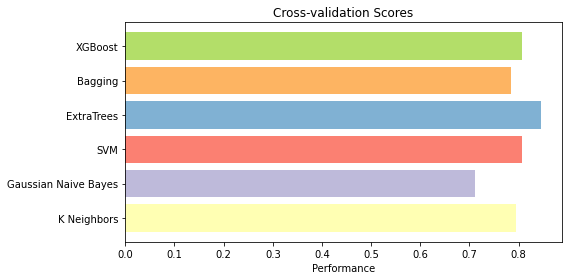

In [ ]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('Set3')

plt.barh(list(validation_scores.keys()), list(validation_scores.values()), color=colors[1:16])
plt.title("Cross-validation Scores")
plt.xlabel('Performance')
# plt.savefig('FigXXCrossValidationScore.png', dpi=600) 
plt.show()

In [ ]:
# # Lista dei modeli a utilizzare con hypertuning
# model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
#                        min_samples_leaf=2, random_state=0)
# model_knn = KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance')
# model_gaussnb = GaussianNB(var_smoothing=0.0001)
# model_bernb = BernoulliNB(alpha=0)
# model_logreg = LogisticRegression(penalty='l1',  random_state=0, solver='liblinear')
# model_linsvc = LinearSVC(C=1, dual=False, fit_intercept=False, random_state=0)
# model_svc = SVC(C=5, random_state=0)
# model_mlp = MLPClassifier(alpha=0.05, hidden_layer_sizes=(555,), learning_rate='adaptive',
#               max_iter=10000, solver='sgd')
# model_rfc = RandomForestClassifier(criterion='entropy', n_estimators=300, oob_score=True, random_state=0)
# model_etc = ExtraTreesClassifier(n_estimators=300, random_state=0)
# model_bag = BaggingClassifier(max_samples=0.5, n_estimators=300, random_state=0)
# model_gbc = GradientBoostingClassifier(n_estimators=300, random_state=0)
# model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#               gamma=0, gpu_id=-1, importance_type=None, predictor='auto',
#               interaction_constraints='', learning_rate=0.25, max_delta_step=0,
#               max_depth=2, min_child_weight=1, monotone_constraints='()', 
#               n_estimators=300, n_jobs=8, num_parallel_tree=1, objective='multi:softprob', 
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
#               seed=0, subsample=1, tree_method='exact', validate_parameters=1,
#               verbosity=None)

# # Dizionario a percorrere per chiamare ogni modello
# models = {
#     'Gaussian Naive Bayes': model_gaussnb,
#     'Bernoulli Naive Bayes': model_bernb,
#     'MLP': model_mlp,
#     'Random Forest': model_rfc,
#     'ExtraTrees': model_etc,
#     'Bagging': model_bag,
#     'GradientBoost': model_gbc,
#     'XGBoost': model_xgb,
#     'SVC': model_svc,
#     'Linear SVC': model_linsvc,
#     'Logistic Regression': model_logreg,
#     'Decision Tree': model_dt,
#     'K Neighbors': model_knn
#     }

# # Lista vuota dove mettere i valori accuracy di ogni metodo con cross-validation
# tuned_validation_scores = {}

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# # Crossvalidation con parametri tunnati
# import math
# for name, model in models.items():
#     print(f"{name}'s KFold starting")
#     score = cross_val_score(model, X_train_ts, y_train, scoring='accuracy', cv=kf, n_jobs=-1, verbose=0).mean()
#     prev_score = round(validation_scores[name],6)
#     print(f"{name}'s cross validation score before tunning: ", prev_score)
#     print(f"{name}'s cross validation score after tunning: {score:.6f}")
#     tuned_validation_scores[name] = score
#     print("Improvement over base model: ", round(((score-prev_score)/prev_score)*100,4), "%\n")

In [ ]:
# plt.figure(figsize=(8,4), tight_layout=True)
# colors = sns.color_palette('Set3')

# plt.barh(list(tuned_validation_scores.keys()), list(tuned_validation_scores.values()), color=colors)
# plt.title("Cross-validation Scores after tuning")
# plt.xlabel('Performance')
# plt.savefig('FigXX-TunedCrossValidationScore.png', dpi=600) 
# plt.show()

### **<font color="#34eb89">8.x.x Advanced Classification - RandomSearch</font>**

In [ ]:
knn_param_grid = {
    #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23], #default: 5
    'weights': ['uniform', 'distance'], #default = ‘uniform’
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

gaussnb_param_grid = {
    'priors': [None], 
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
    }

svc_param_grid = {
    #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [.1,.5,1], #default=1.0
    'gamma': [.25, .5, 1.0], #edfault: auto
    'decision_function_shape': ['ovo', 'ovr'], #default:ovr
    'random_state': [0]
    }

etc_param_grid = {
    #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
    'n_estimators': [10, 50, 100, 300], #default=10
    'criterion': ['gini', 'entropy'], #default=”gini”
    'max_depth': [2, 4, 6, 8, 10, None], #default=None
    'random_state': [0]
    }

bag_param_grid = {
    #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
    'n_estimators': [10, 50, 100, 300], #default=10
    'max_samples': [.5, 1], #default=1.0
    'random_state': [0]
    }

xgb_param_grid = {
    #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
    'learning_rate': [.01, .03, .05, .1, .25], #default: .3
    'max_depth': [2,4,6,8,10], #default 2
    'n_estimators': [10, 50, 100, 300], 
    'seed': [0]  
    }

models_params = {
    'K Neighbors': [model_knn, knn_param_grid],
    'Gaussian Naive Bayes': [model_gaussnb, gaussnb_param_grid],
    'SVM': [model_svc, svc_param_grid],
    'ExtraTrees': [model_etc, etc_param_grid],
    'Bagging': [model_bag, bag_param_grid],
    'XGBoost': [model_xgb, xgb_param_grid]
    }

In [ ]:
# random_models = {}
# random_validation_scores = {}

# for name, [model, param] in models_params.items():
#     print(f'{name} Random search starting')
#     search = RandomizedSearchCV(estimator = model, 
#                                 param_distributions = param, 
#                                 n_iter = 10, 
#                                 cv = kf, 
#                                 verbose=2, 
#                                 random_state=42, 
#                                 n_jobs = -1).fit(X_train_ts, y_train)
#     random_models[name] = search.best_estimator_
#     random_validation_scores[name] = search.best_score_
#     print(f'Best score: {search.best_score_}')
#     print("Best parameters: ", random_models[name], '\n')

In [ ]:
# final_models = {}
# final_validation_scores = {}

# for name, [model, param] in models_params.items():
#     print(f'{name} Grid search starting')
#     search = GridSearchCV(model, 
#                           param, 
#                           cv=kf, 
#                           n_jobs=-1, 
#                           verbose=1,
#                           scoring='accuracy').fit(X_train_ts, y_train)
#     final_models[name] = search.best_estimator_
#     final_validation_scores[name] = search.best_score_
#     print(f'Best score: {search.best_score_}')
#     print("Best parameters: ", final_models[name], '\n')

### **<font color="#34eb89">8.x.x Advanced Classification - ROC</font>**

In [ ]:
# # Lista dei modeli a utilizzare 
# gauss_nb = OneVsRestClassifier(GaussianNB(var_smoothing=0.0001))
# etc = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=300, random_state=0))
# bag = OneVsRestClassifier(BaggingClassifier(max_samples=0.5, n_estimators=300, random_state=0))
# xgb = OneVsRestClassifier(XGBClassifier(XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.25))
# svc = OneVsRestClassifier(SVC(C=5, random_state=0))
# knn = OneVsRestClassifier(KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance'))

# # Dizionario a percorrere per chiamare ogni modello
# models = {
#     'Gaussian Naive Bayes': gauss_nb,
#     'ExtraTrees': etc,
#     'Bagging': bag,
#     'XGBoost': xgb,
#     'SVC': svc,
#     'K Nearest Neighbor': knn
#     }

In [ ]:
# # FARE ATTENZIONE A NON ESEGUIRLA DUE VOLTE SE NON SI VUOLE PERDERE UN SACCO DI TEMPO
# for name, model in models.items():
#     model.fit(X_train_ts, y_train_bin)
#     print(f"{name} fitted")

In [ ]:
# y_score1 = gauss_nb.predict_proba(X_test)
# y_score5 = etc.predict_proba(X_test)
# y_score6 = bag.predict_proba(X_test)
# y_score7 = xgb.predict_proba(X_test)
# y_score9 = svc.decision_function(X_test)
# y_score12 = knn.predict_proba(X_test)

In [ ]:
# plt.figure(figsize=(10,7))
# lw = 2

# #################### GAUSSIAN NAIVE BAYES ####################
# fpr1 = {}
# tpr1 = {}
# roc_auc1 = {}
# for i in range(n_classes):
#     fpr1[i], tpr1[i], _ = roc_curve(y_test_bin[:, i], y_score1[:, i])
#     roc_auc1[i] = auc(fpr1[i], tpr1[i])

# fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test_bin.ravel(), y_score1.ravel())
# roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])

# plt.plot(
#     fpr1["micro"],
#     tpr1["micro"],
#     label="Gaussian Naïve Bayes (AUC:{0:0.2f})".format(roc_auc1["micro"]),
#     color="navy",
#     linestyle=":",
#     linewidth=lw,
# )

# #################### EXTRA TREES ####################
# fpr5 = {}
# tpr5 = {}
# roc_auc5 = {}
# for i in range(n_classes):
#     fpr5[i], tpr5[i], _ = roc_curve(y_test_bin[:, i], y_score5[:, i])
#     roc_auc5[i] = auc(fpr5[i], tpr5[i])
    
# fpr5["micro"], tpr5["micro"], _ = roc_curve(y_test_bin.ravel(), y_score5.ravel())
# roc_auc5["micro"] = auc(fpr5["micro"], tpr5["micro"])

# plt.plot(
#     fpr5["micro"],
#     tpr5["micro"],
#     label="Extra Trees (AUC:{0:0.2f})".format(roc_auc5["micro"]),
#     color="darkred",
#     linestyle=":",
#     linewidth=lw,
# )

# #################### BAGGING ####################
# fpr6 = {}
# tpr6 = {}
# roc_auc6 = {}
# for i in range(n_classes):
#     fpr6[i], tpr6[i], _ = roc_curve(y_test_bin[:, i], y_score6[:, i])
#     roc_auc6[i] = auc(fpr6[i], tpr6[i])
    
# fpr6["micro"], tpr6["micro"], _ = roc_curve(y_test_bin.ravel(), y_score6.ravel())
# roc_auc6["micro"] = auc(fpr6["micro"], tpr6["micro"])

# plt.plot(
#     fpr6["micro"],
#     tpr6["micro"],
#     label="Bagging (AUC:{0:0.2f})".format(roc_auc6["micro"]),
#     color="purple",
#     linestyle=":",
#     linewidth=lw,
# )

# #################### XGBOOST ####################
# fpr7 = {}
# tpr7 = {}
# roc_auc7 = {}
# for i in range(n_classes):
#     fpr7[i], tpr7[i], _ = roc_curve(y_test_bin[:, i], y_score7[:, i])
#     roc_auc7[i] = auc(fpr7[i], tpr7[i])
    
# fpr7["micro"], tpr7["micro"], _ = roc_curve(y_test_bin.ravel(), y_score7.ravel())
# roc_auc7["micro"] = auc(fpr7["micro"], tpr7["micro"])

# plt.plot(
#     fpr7["micro"],
#     tpr7["micro"],
#     label="XGBoost (AUC:{0:0.2f})".format(roc_auc7["micro"]),
#     color="olivedrab",
#     linestyle=":",
#     linewidth=lw,
# )

# #################### SVC ####################
# fpr9 = {}
# tpr9 = {}
# roc_auc9 = {}
# for i in range(n_classes):
#     fpr9[i], tpr9[i], _ = roc_curve(y_test_bin[:, i], y_score9[:, i])
#     roc_auc9[i] = auc(fpr9[i], tpr9[i])
    
# fpr9["micro"], tpr9["micro"], _ = roc_curve(y_test_bin.ravel(), y_score9.ravel())
# roc_auc9["micro"] = auc(fpr9["micro"], tpr9["micro"])

# plt.plot(
#     fpr9["micro"],
#     tpr9["micro"],
#     label="SVC (AUC:{0:0.2f})".format(roc_auc9["micro"]),
#     color="lime",
#     linestyle=":",
#     linewidth=lw,
# )

# #################### K NEAREST NEIGHBOR ####################
# fpr12 = {}
# tpr12 = {}
# roc_auc12 = {}
# for i in range(n_classes):
#     fpr12[i], tpr12[i], _ = roc_curve(y_test_bin[:, i], y_score12[:, i])
#     roc_auc12[i] = auc(fpr12[i], tpr12[i])
    
# fpr12["micro"], tpr12["micro"], _ = roc_curve(y_test_bin.ravel(), y_score12.ravel())
# roc_auc12["micro"] = auc(fpr12["micro"], tpr12["micro"])

# plt.plot(
#     fpr12["micro"],
#     tpr12["micro"],
#     label="K Nearest Neighbor (AUC:{0:0.2f})".format(roc_auc12["micro"]),
#     color="pink",
#     linestyle=":",
#     linewidth=lw,
# )

# ###############################################################

# plt.plot([0, 1], [0, 1], "k--")
# plt.xlim([-.02, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve Comparison")
# plt.legend(loc="lower right")
# plt.savefig('FigXX-ROCcomparison.png', dpi=600)
# plt.show() 

# **<font color="#42f5f5">9.0 SEQUENTIAL PATTERN MINING</font>**

https://pypi.org/project/prefixspan/

In [ ]:
!pip install prefixspan
from prefixspan import PrefixSpan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11239 sha256=b965605d9f3e80c36a65281138a97126c6b200df33d526d1ec3fb01eef16733a
  Stored in directory: /root/.cache/pip/wheels/99/6a/87/7170158a87b97a642d620ea1767f6519d2cf7db33cac1098ac
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28885 sha256=2573d2bf6d9c3309a8f4ea52a000708faf056d0656fad62810ff1b5900a62e1a
  Stored in directory: /root/.cache/pip/wheels/78/c4/9d/581ca1511b5a7731bf2406c840dd445a6a8b8e494d29aa1c68
Successfully built prefixspan extratools


In [ ]:
data_ts0=pd.read_csv('/content/local_data/train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True) 
data_ts1=pd.read_csv('/content/local_data/train/Inertial Signals/body_acc_y_train.txt', header=None, delim_whitespace=True)
data_ts2=pd.read_csv('/content/local_data/train/Inertial Signals/body_acc_z_train.txt', header=None, delim_whitespace=True) 
data_ts3=pd.read_csv('/content/local_data/train/Inertial Signals/body_gyro_x_train.txt', header=None, delim_whitespace=True) 
data_ts4=pd.read_csv('/content/local_data/train/Inertial Signals/body_gyro_y_train.txt', header=None, delim_whitespace=True) 
data_ts5=pd.read_csv('/content/local_data/train/Inertial Signals/body_gyro_z_train.txt', header=None, delim_whitespace=True) 
data_ts6=pd.read_csv('/content/local_data/train/Inertial Signals/total_acc_x_train.txt', header=None, delim_whitespace=True) 
data_ts7=pd.read_csv('/content/local_data/train/Inertial Signals/total_acc_y_train.txt', header=None, delim_whitespace=True) 
data_ts8=pd.read_csv('/content/local_data/train/Inertial Signals/total_acc_z_train.txt', header=None, delim_whitespace=True) 

data_test_ts0=pd.read_csv('/content/local_data/test/Inertial Signals/body_acc_x_test.txt', header=None, delim_whitespace=True) 
data_test_ts1=pd.read_csv('/content/local_data/test/Inertial Signals/body_acc_y_test.txt', header=None, delim_whitespace=True)
data_test_ts2=pd.read_csv('/content/local_data/test/Inertial Signals/body_acc_z_test.txt', header=None, delim_whitespace=True) 
data_test_ts3=pd.read_csv('/content/local_data/test/Inertial Signals/body_gyro_x_test.txt', header=None, delim_whitespace=True) 
data_test_ts4=pd.read_csv('/content/local_data/test/Inertial Signals/body_gyro_y_test.txt', header=None, delim_whitespace=True) 
data_test_ts5=pd.read_csv('/content/local_data/test/Inertial Signals/body_gyro_z_test.txt', header=None, delim_whitespace=True) 
data_test_ts6=pd.read_csv('/content/local_data/test/Inertial Signals/total_acc_x_test.txt', header=None, delim_whitespace=True) 
data_test_ts7=pd.read_csv('/content/local_data/test/Inertial Signals/total_acc_y_test.txt', header=None, delim_whitespace=True) 
data_test_ts8=pd.read_csv('/content/local_data/test/Inertial Signals/total_acc_z_test.txt', header=None, delim_whitespace=True) 

In [ ]:
data_ts = (data_ts6-data_ts6.min())/(data_ts6.max()-data_ts6.min())
data_test_ts = (data_test_ts6-data_test_ts6.min())/(data_test_ts6.max()-data_test_ts6.min())
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series

In [ ]:
n_paa_segments = 12
n_sax_symbols = 12
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)


In [ ]:
list_sax=[]
for i in range(0,7352):
  ts=data_ts.iloc[i,:].values
  ts=scaler.fit_transform(ts.reshape(1,-1))
  ts=sax.fit_transform(ts).ravel()
  list_sax.append(ts)

In [ ]:
len(list_sax)

7352

In [ ]:
list_sax[7351]

array([ 8, 13, 13, 26, 42, 40, 14, 14, 19, 18, 11, 12,  9,  8,  9, 20, 20,
       20, 31, 36, 40, 42, 41, 35, 26, 18, 17,  4,  1,  2,  3,  4,  7, 12,
       10, 19, 42, 38, 17, 20, 20, 21, 16])

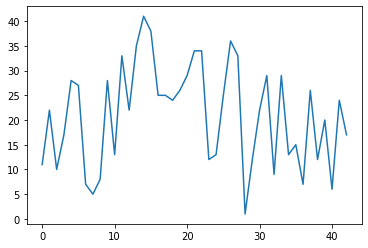

In [ ]:
plt.plot(list_sax[2])
plt.show()

In [ ]:
ps1 = PrefixSpan(list_sax)
ps1.minlen = 10

In [ ]:
psx1 = ps1.frequent(10)
psx1

In [ ]:
res_list1 = [x[0] for x in psx1]
print(sum(res_list1))

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 47 kB/s 
     |████████████████████████████████| 199 kB 55.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=9a74888514980506c9b04178830ee522043e4e58e421d61e3b76cb0888e4c2f8
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from pyspark.ml.fpm import PrefixSpan

In [ ]:
from pyspark import SparkContext
sc =SparkContext()

In [ ]:
from pyspark.sql import Row
df = sc.parallelize([Row(sequence=[db])]).toDF()

RuntimeError: ignored

In [ ]:
prefixspan = PrefixSpan()

In [ ]:
prefixspan.findFrequentSequentialPatterns(db).sort("sequence").show(truncate=False)

In [ ]:
!pip install spmf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
spmf = Spmf("GSP", spmf_bin_location_dir='/content/local_data/train/',  
            input_direct=db,
            output_filename="output.txt",
            arguments=[0.5])

sp.run()
output = spmf.to_pandas_dataframe(pickle=True)
output

NameError: ignored

# **<font color="#42f5f5">10.0 ADVANCED CLUSTERING</font>**

In [ ]:
!pip install pyclustering

from pyclustering.cluster.silhouette import silhouette
from sklearn.metrics import silhouette_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 18.4 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=cfe192e1353f6f81e9389c88e322f03cec75476269f067966d2cf94662cbafb3
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

i = 0
j = 1

In [ ]:
data_cluster = data.copy()
data_cluster['activity'] = y_label[0].values

# Seleziono le classi che voglio droppare. Lasciamo solo 2 e 3, 6 era troppo facile da predictare-->
classe2 = np.array(y_label[y_label[0]==2].index)
classe3 = np.array(y_label[y_label[0]==3].index)
classe4 = np.array(y_label[y_label[0]==4].index)
classe5 = np.array(y_label[y_label[0]==5].index)
classes2remove = np.concatenate((classe2,classe3,classe4,classe5))

data_cluster.drop(data_cluster.index[classes2remove], inplace=True)

X_train_cluster = data_cluster.iloc[:, 0:561].values
y_train_cluster = data_cluster['activity'].values
print(data_cluster['activity'].value_counts(), "\n")

print(X_train_cluster.shape)
print(X_train_cluster.shape)

6    1407
1    1226
Name: activity, dtype: int64 

(2633, 561)
(2633, 561)


## **<font color="#FBBF44">10.x Gaussian Mixture Model</font>**

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train_pca) for n in n_components]

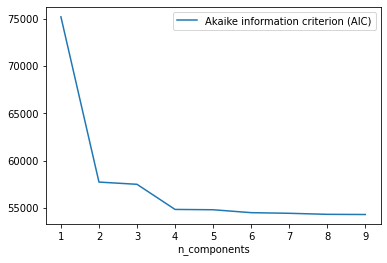

In [ ]:
plt.plot(n_components, [m.aic(X_train_pca) for m in models], label='Akaike information criterion (AIC)')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
gmm = GaussianMixture(n_components=6)
gmm.fit(X_train_pca)

GaussianMixture(n_components=6)

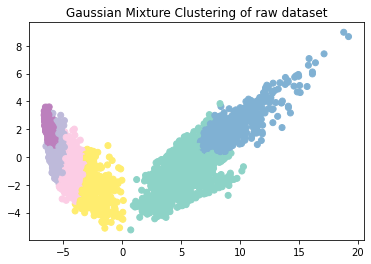

In [ ]:
labels = gmm.predict(X_train_pca)
plt.scatter(X_train_pca[:, i], X_train_pca[:, j], c=labels, cmap=plt.cm.Set3);
plt.title('Gaussian Mixture Clustering of raw dataset')
plt.savefig('FigXX-ClusterGMM1.png', dpi=600)
plt.show()

In [ ]:
silhouette_score(X_train_pca, labels)

0.3787508401167867

## **<font color="#FBBF44">10.x X-Means</font>**

In [ ]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.elbow import elbow

https://pyclustering.github.io/docs/0.9.0/html/dd/db4/classpyclustering_1_1cluster_1_1xmeans_1_1xmeans.html


In [ ]:
kmin, kmax = 1, 10
elbow_instance = elbow(X_train_pca, kmin, kmax)
elbow_instance.process()
#amount_clusters = elbow_instance.get_amount()  
#amount_clusters

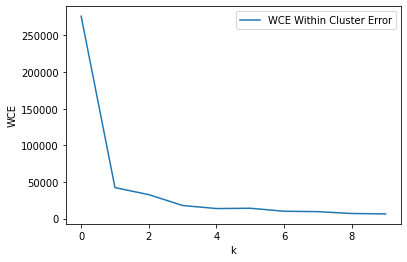

In [ ]:
wce = elbow_instance.get_wce()

plt.plot(wce, label='WCE Within Cluster Error')
plt.legend(loc='best')
plt.xlabel('k');
plt.ylabel('WCE');

In [ ]:
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X_train_pca, amount_initial_centers).initialize()
xm = xmeans(X_train_pca, initial_centers=initial_centers, kmax=6)
xm.process()

clusters = xm.get_clusters()
centers = xm.get_centers()

len(clusters)

6

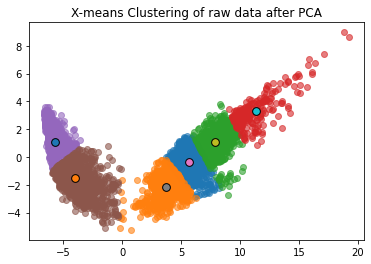

In [ ]:
for clust in clusters:
    plt.scatter(X_train_pca[clust,i], X_train_pca[clust,j], alpha=0.6)
for cent in centers:
    plt.scatter(cent[i], cent[j], s=60, edgecolors='k', marker='o')
plt.title('X-means Clustering of raw data after PCA')
plt.savefig('FigXX-ClusterXmeans2.png', dpi=600)
plt.show()

In [ ]:
score = silhouette(X_train_pca, clusters).process().get_score()
np.mean(score)

0.6420663680532953

## **<font color="#FBBF44">10.x OPTICS</font>**

In [ ]:
from sklearn.cluster import OPTICS

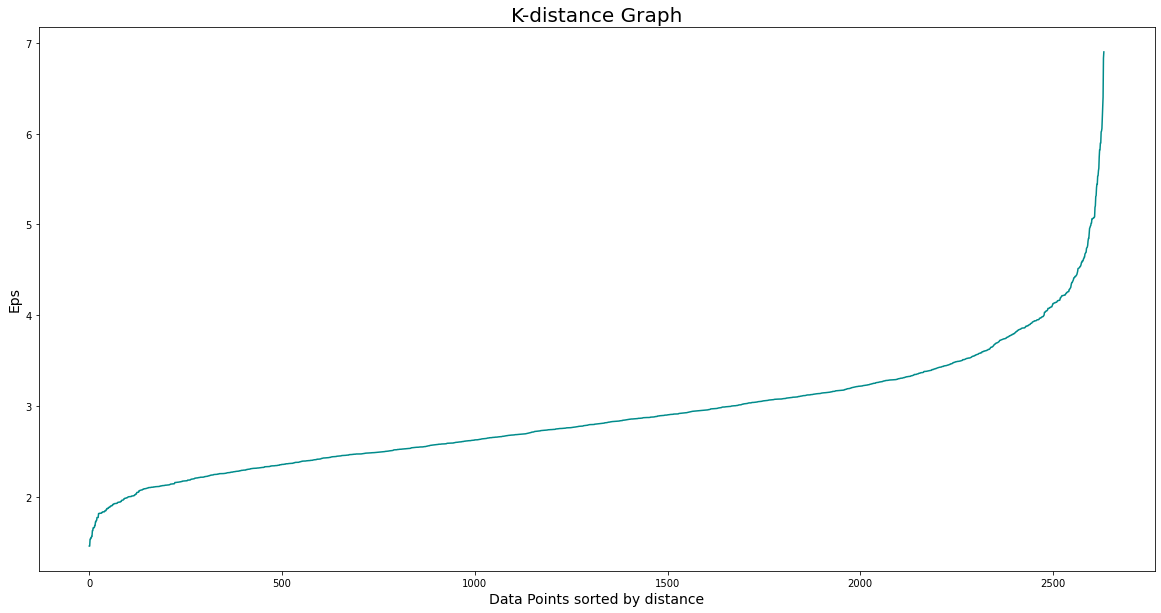

In [ ]:
# Calcoliamo i valori di distanza tra ogni record e il suo nearest neighbor
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

# Plottiamo la distanza dentro i valori del df e cerchiamo il "gomito" per vedere il punto di massima curvatura e quindi il valore ottimo di Eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances, color = 'darkcyan')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Eps',fontsize=14)
plt.savefig('FigXX-ElbowMethodDBSCAN.png', dpi=600)
plt.show()

In [ ]:
optics = OPTICS(min_samples=5, eps=3)
optics.fit(X_train)

OPTICS(eps=3, min_samples=30)

In [ ]:
silhouette_score(X_train[optics.labels_ != -1], optics.labels_[optics.labels_ != -1])

ValueError: ignored

In [ ]:
for cluster_id in np.unique(optics.labels_)[:10]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X_train[indexes,i], X_train[indexes,j], alpha=0.8)

## **<font color="#FBBF44">10.x K-Mode</font>**

## **<font color="#FBBF44">10.x ROCK</font>**

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.rock import rock

rock_instance = rock(X_train, 1.0, 7)
# Run cluster analysis.
rock_instance.process()
# Obtain results of clustering.
clusters = rock_instance.get_clusters()

## **<font color="#FBBF44">10.x Transactional Clustering</font>**

# **<font color="#42f5f5">10.0 ADVANCED CLUSTERING'</font>**

In [ ]:
!pip install pyclustering

from pyclustering.cluster.silhouette import silhouette
from sklearn.metrics import silhouette_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 5.5 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=503b6866361f133f96da64e7c61edc6e7f6e52cbc695627d1b177606f518a0d9
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
data_cluster = data.copy()
data_cluster['activity'] = y_label[0].values

# Seleziono le classi che voglio droppare. Lasciamo solo 2 e 3, 6 era troppo facile da predictare-->
classe1 = np.array(y_label[y_label[0]==1].index)
classe2 = np.array(y_label[y_label[0]==2].index)
classe3 = np.array(y_label[y_label[0]==3].index)
classe4 = np.array(y_label[y_label[0]==4].index)
classe5 = np.array(y_label[y_label[0]==5].index)
classe6 = np.array(y_label[y_label[0]==6].index)
classes2remove = np.concatenate((classe2, classe3, classe4, classe5))

data_cluster.drop(data_cluster.index[classes2remove], inplace=True)

X_train_cluster = data_cluster.iloc[:, 0:561].values
y_train_cluster = data_cluster['activity'].values
print(data_cluster['activity'].value_counts(), "\n")

print(X_train_cluster.shape)
print(X_train_cluster.shape)

6    1407
1    1226
Name: activity, dtype: int64 

(2633, 561)
(2633, 561)


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_cluster)

i = 0
j = 1

## **<font color="#FBBF44">10.x Gaussian Mixture Model</font>**

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train_pca) for n in n_components]

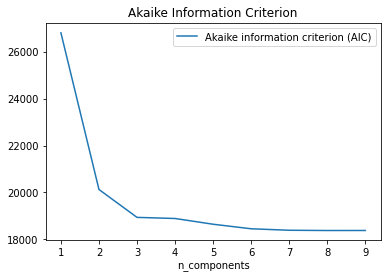

In [ ]:
plt.plot(n_components, [m.aic(X_train_pca) for m in models], label='Akaike information criterion (AIC)')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.title('Akaike Information Criterion')
plt.savefig('FigXX-AICGauss.png', dpi=600)
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train_pca)

GaussianMixture(n_components=2)

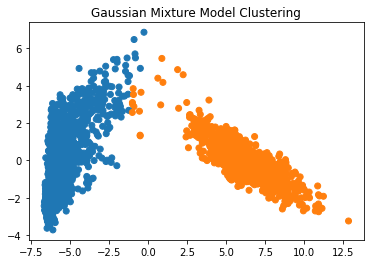

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

# make the color map:
cmp = ListedColormap(['tab:blue', 'tab:orange'])

labels = gmm.predict(X_train_pca)
plt.scatter(X_train_pca[:, i], X_train_pca[:, j], c=labels, cmap=cmp);
plt.title('Gaussian Mixture Model Clustering')
plt.savefig('FigXX-ClusterGMM.png', dpi=600)
plt.show()

In [ ]:
silhouette_score(X_train_pca, labels)

0.777612454204624

## **<font color="#FBBF44">10.x X-Means</font>**

In [ ]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.elbow import elbow

https://pyclustering.github.io/docs/0.9.0/html/dd/db4/classpyclustering_1_1cluster_1_1xmeans_1_1xmeans.html


In [ ]:
kmin, kmax = 1, 10
elbow_instance = elbow(X_train_pca, kmin, kmax)
elbow_instance.process()
#amount_clusters = elbow_instance.get_amount()  
#amount_clusters

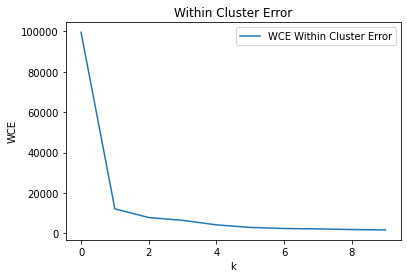

In [ ]:
wce = elbow_instance.get_wce()

plt.plot(wce, label='WCE Within Cluster Error')
plt.legend(loc='best')
plt.xlabel('k');
plt.ylabel('WCE');
plt.title('Within Cluster Error')
plt.savefig('FigXX-ClusterWCE.png', dpi=600)
plt.show()

In [ ]:
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X_train_pca, amount_initial_centers).initialize()
xm = xmeans(X_train_pca, initial_centers=initial_centers, kmax=2)
xm.process()

clusters = xm.get_clusters()
centers = xm.get_centers()

len(clusters)

2

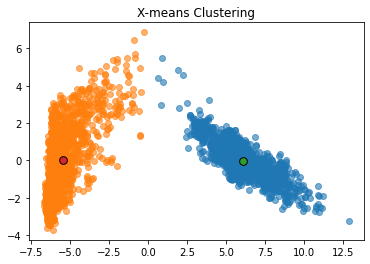

In [ ]:
for clust in clusters:
    plt.scatter(X_train_pca[clust,i], X_train_pca[clust,j], alpha=0.6)
for cent in centers:
    plt.scatter(cent[i], cent[j], s=60, edgecolors='k', marker='o')
plt.title('X-means Clustering')
plt.savefig('FigXX-ClusterXmeans.png', dpi=600)
plt.show()

In [ ]:
score = silhouette(X_train_pca, clusters).process().get_score()
np.mean(score)

0.927416435525532

## **<font color="#FBBF44">10.x OPTICS</font>**

In [ ]:
from sklearn.cluster import OPTICS

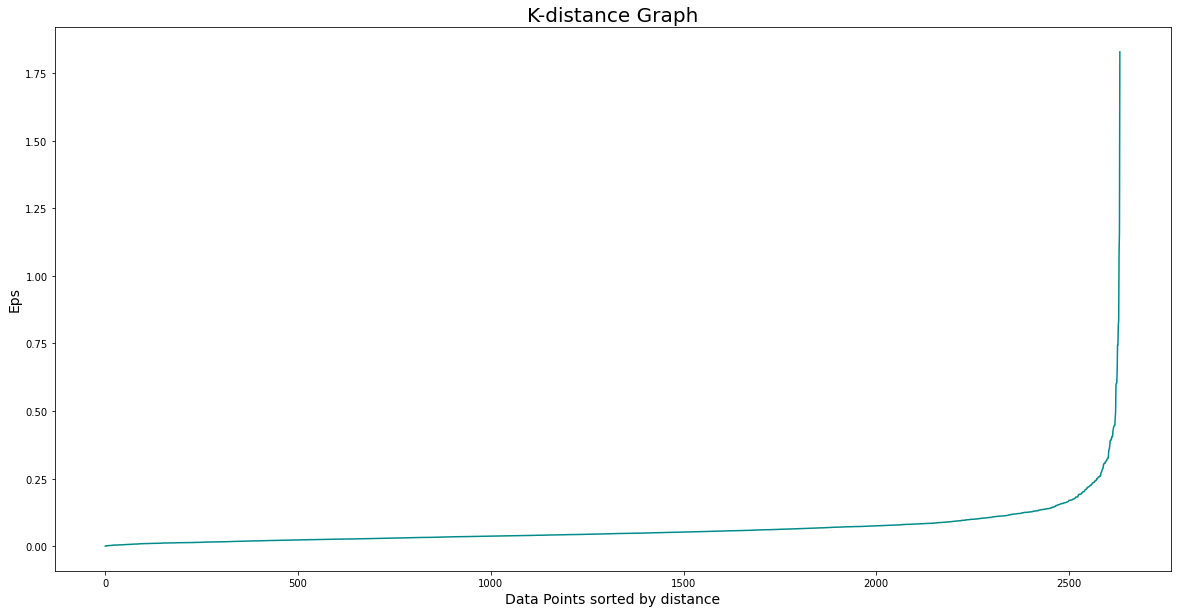

In [ ]:
# Calcoliamo i valori di distanza tra ogni record e il suo nearest neighbor
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(X_train_pca)
distances, indices = nbrs.kneighbors(X_train_pca)

# Plottiamo la distanza dentro i valori del df e cerchiamo il "gomito" per vedere il punto di massima curvatura e quindi il valore ottimo di Eps
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances, color = 'darkcyan')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Eps',fontsize=14)
plt.savefig('FigXX-ElbowMethodDBSCAN.png', dpi=600)
plt.show()

In [ ]:
optics = OPTICS(min_samples=30, eps=.2)
optics.fit(X_train_pca)

OPTICS(eps=0.2, min_samples=30)

In [ ]:
silhouette_score(X_train_pca[optics.labels_ != -1], optics.labels_[optics.labels_ != -1])

0.7799839303763922

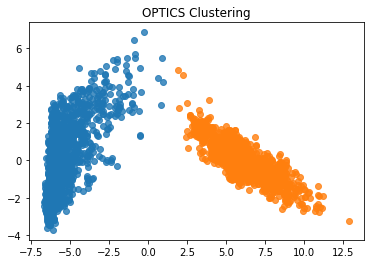

In [ ]:
for cluster_id in np.unique(optics.labels_)[:10]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X_train_pca[indexes,i], X_train_pca[indexes,j], alpha=0.8)
plt.title('OPTICS Clustering')
plt.savefig('FigXX-ClusterOptics.png', dpi=600)
plt.show()

## **<font color="#FBBF44">10.x K-Mode</font>**

## **<font color="#FBBF44">10.x ROCK</font>**

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.rock import rock

rock_instance = rock(X_train, 1.0, 7)
# Run cluster analysis.
rock_instance.process()
# Obtain results of clustering.
clusters = rock_instance.get_clusters()

## **<font color="#FBBF44">10.x Transactional Clustering</font>**

In [ ]:
import os, sys, importlib
from os.path import expanduser
from pathlib import Path

!cp -r /content/drive/MyDrive/"TX-Means-master" /content/local_data

home = str(Path.home())
home

Folder_Cloned_In = '/content/local_data/TX-Means-master'
path_to_lib = home + Folder_Cloned_In

if os.path.isdir(path_to_lib + 'TXMeans'):
    print(f'My Home is: {home}')
    print(f'I cloned in: {path_to_lib}')
    # Add dirs to Python Path 
    sys.path.insert(0, path_to_lib + 'TXMeans/code')
    sys.path.insert(0, path_to_lib + 'TXMeans/code/algorithms')
else:
    print("Can't find Directory.")
    print('For example: you are in')
    print(str(os.getcwd()))

Can't find Directory.
For example: you are in
/content


In [ ]:
# sys.path.append('/local_data/TX-Means-master/code/algorithms')
# # sys.path.append('/content/local_data/TX-Means-master/code/generators')
# # sys.path.append('/content/local_data/TX-Means-master/code/validators')
# # sys.path.append('/content/local_data/TX-Means-master/code/validators/algorithms/util.py')

# import algorithms.txmeans

In [ ]:
# import algorithms.txmeans

# **<font color="#42f5f5">11.0 EXPLAINABILITY</font>**

In [ ]:
import sys

sys.path.append('/content/drive/MyDrive/Colab Notebooks/DM2/lore')

In [ ]:
import pydotplus
from sklearn import tree
from IPython.display import Image

from util import record2str, neuclidean
from datamanager import prepare_adult_dataset, prepare_dataset, one_hot_encoding

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=feature_list,
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

## **<font color="#FBBF44">11.x Skater</font>**

In [ ]:
# !pip install skater

# from skater.model import InMemoryModel
# from skater.core.explanations import Interpretation

# from skater.core.global_interpretation.partial_dependence import PartialDependence

In [ ]:
# interpreter = Interpretation()
# interpreter.load_data(X_train, feature_names=feature_list)

## **<font color="#FBBF44">11.x Local</font>**

In [ ]:
numeric_columns = list(data._get_numeric_data().columns)

In [ ]:
bb = DecisionTreeClassifier(random_state=0)
bb.fit(X_train, y_train)

def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [ ]:
i2e = 235
x = X_test[i2e]

record2str(x, feature_list, numeric_columns)

bb_outcome = bb_predict(x.reshape(1, -1))[0]
bb_outcome_str = y_train[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { 5 }



## **<font color="#FBBF44">11.x Lime</font>**

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 31.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=43063a0b68dd4e69bf3107c8b9068abb4750f32c3f4b65164a5492c597ec763a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.8595181540549711
F1-score [0.86071085 0.80837004 0.85090909 0.79446219 0.82565492 1.        ]


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict_proba(X_test)

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_list,
    class_names=['1', '2','3','4','5','6'],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test[1,:], 
    predict_fn=rfc.predict_proba
)

# Su jupyter va bene questo
exp.show_in_notebook(show_table=True)